In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.decomposition import PCA



EDA


In [ ]:
# Charger les fichiers CSV
file1_path = "c:/Users/ARMAND/Downloads/data_project/Indicateurs.csv"
file2_path = "c:/Users/ARMAND/Downloads/data_project/Spectre.csv"
file3_path = "c:/Users/ARMAND/Downloads/data_project/Caracteristiques_Echantillons_Projet.Bioindicateur.2.csv"

df_indicateurs = pd.read_csv(file1_path, sep=";", encoding="ISO-8859-1")
df_spectre = pd.read_csv(file2_path, sep=";", encoding="ISO-8859-1")

# Remplacement des virgules par des points dans les valeurs numériques
df_indicateurs = df_indicateurs.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)
df_spectre = df_spectre.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)

# Conversion des colonnes numériques
df_indicateurs = df_indicateurs.apply(pd.to_numeric, errors='ignore')
df_spectre.iloc[:, 1:] = df_spectre.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/dataset/Indicateurs.csv'

In [ ]:
df_indicateurs.head()


Année           Projet  Echantillon.Date  Echantillon  date prélèvement   \
0    NaN  Bioindicateur.2               NaN  B10-Th-TS-1                NaN   
1    NaN  Bioindicateur.2               NaN  B10-Th-TS-2                NaN   
2    NaN  Bioindicateur.2               NaN  B10-Th-TS-3                NaN   
3    NaN  Bioindicateur.2               NaN  B10-Th-TS-4                NaN   
4    NaN  Bioindicateur.2               NaN  B10-Th-TR-1                NaN   

   Humidité  Argile.g.kg  Limons.g.kg  Sables.g.kg  Argile.%  ...  \
0      9.89          174          280          546      17.4  ...   
1      6.20          104          154          742      10.4  ...   
2      6.83          112          204          684      11.2  ...   
3      8.89          178          273          549      17.8  ...   
4      6.62          121          217          662      12.1  ...   

   PLFA_GRAM-_TOT  PLFA_BACT_TOT  PLFA_FONG_TOT  PLFA_FONG_BACT  PLFA_19_TOT  \
0        0.348754       0.429866       0.028295        0.065823     0.027108   
1        0.337573       0.425729       0.031805        0.074708     0.025965   
2        0.313646       0.405760       0.036035        0.088809     0.028248   
3        0.324311       0.401446       0.044270        0.110275     0.026482   
4        0.389359       0.500581       0.007753        0.015487     0.033663   

   PLFA_ISO_ANTEISO  PLFA_SAT_MONOINSAT  PLFA_TOT    PP     AWCD   
0          0.963827            0.912323  110.6943  13.0  0.249679  
1          0.993379            0.919276  114.4433  11.0  0.228625  
2          0.957929            1.133033  100.2492  15.0  0.286527  
3          0.999973            1.043140  108.0727  10.0  0.202984  
4          1.003794            0.728861  183.1503  14.0  0.262107  

[5 rows x 57 columns]

In [ ]:
df_spectre.head()

Echantillon 3999,640137 4000,60437 4001,568603 4002,532837 4003,49707  \
0    Yv-SIV-4    0.646757   0.646578    0.646578    0.646459    0.64633   
1       F08-1    0.872804   0.872654    0.872654    0.872559   0.872462   
2       F08-2    0.925765   0.925727    0.925727     0.92565   0.925543   
3       F08-3    0.798457   0.798373    0.798373    0.798303   0.798217   
4       F08-4    0.795648   0.795536    0.795536    0.795465    0.79539   

  4004,461303 4005,425536 4006,38977 4007,354003  ... 9990,421501 9991,385734  \
0    0.646196    0.646062   0.645931    0.645804  ...     0.61357    0.613383   
1     0.87237    0.872285    0.87221     0.87214  ...    0.874994    0.875151   
2    0.925419    0.925287   0.925155    0.925026  ...    0.919659    0.919899   
3     0.79812     0.79802   0.797927    0.797848  ...    0.783359     0.78346   
4    0.795314    0.795241   0.795174    0.795116  ...    0.803458     0.80353   

  9992,349967 9993,3142 9994,278434 9995,242667 9996,2069 9997,171134  \
0    0.613179  0.613023    0.612965    0.613024  0.613195    0.613451   
1    0.875303  0.875489    0.875736    0.876049  0.876414    0.876806   
2    0.920063  0.920166    0.920214    0.920198  0.920103    0.919922   
3    0.783512   0.78352    0.783498    0.783471  0.783457    0.783462   
4    0.803588  0.803628    0.803665    0.803724  0.803831    0.804004   

  9998,135367 9999,0996  
0    0.613748  0.613748  
1    0.877202  0.877202  
2     0.91967   0.91967  
3    0.783482  0.783482  
4    0.804245  0.804245  

[5 rows x 6224 columns]

In [ ]:
df_indicateurs = df_indicateurs.drop(df_indicateurs.columns[:2], axis=1)
df_indicateurs = df_indicateurs.drop(df_indicateurs.columns[:1], axis=1)
df_indicateurs.head()

Echantillon  date prélèvement   Humidité  Argile.g.kg  Limons.g.kg  \
0  B10-Th-TS-1                NaN      9.89          174          280   
1  B10-Th-TS-2                NaN      6.20          104          154   
2  B10-Th-TS-3                NaN      6.83          112          204   
3  B10-Th-TS-4                NaN      8.89          178          273   
4  B10-Th-TR-1                NaN      6.62          121          217   

   Sables.g.kg  Argile.%  Limons.%  Sables.%   C org  ...  PLFA_GRAM-_TOT  \
0          546      17.4      28.0      54.6  18.915  ...        0.348754   
1          742      10.4      15.4      74.2  11.715  ...        0.337573   
2          684      11.2      20.4      68.4  15.233  ...        0.313646   
3          549      17.8      27.3      54.9  16.845  ...        0.324311   
4          662      12.1      21.7      66.2  12.757  ...        0.389359   

   PLFA_BACT_TOT  PLFA_FONG_TOT  PLFA_FONG_BACT PLFA_19_TOT  PLFA_ISO_ANTEISO  \
0       0.429866       0.028295        0.065823    0.027108          0.963827   
1       0.425729       0.031805        0.074708    0.025965          0.993379   
2       0.405760       0.036035        0.088809    0.028248          0.957929   
3       0.401446       0.044270        0.110275    0.026482          0.999973   
4       0.500581       0.007753        0.015487    0.033663          1.003794   

   PLFA_SAT_MONOINSAT  PLFA_TOT    PP     AWCD   
0            0.912323  110.6943  13.0  0.249679  
1            0.919276  114.4433  11.0  0.228625  
2            1.133033  100.2492  15.0  0.286527  
3            1.043140  108.0727  10.0  0.202984  
4            0.728861  183.1503  14.0  0.262107  

[5 rows x 54 columns]

In [ ]:
df_indicateurs = df_indicateurs.drop(columns=df_indicateurs.columns[1])
df_indicateurs.head()

Echantillon  Humidité  Argile.g.kg  Limons.g.kg  Sables.g.kg  Argile.%  \
0  B10-Th-TS-1      9.89          174          280          546      17.4   
1  B10-Th-TS-2      6.20          104          154          742      10.4   
2  B10-Th-TS-3      6.83          112          204          684      11.2   
3  B10-Th-TS-4      8.89          178          273          549      17.8   
4  B10-Th-TR-1      6.62          121          217          662      12.1   

   Limons.%  Sables.%   C org  N tot  ...  PLFA_GRAM-_TOT  PLFA_BACT_TOT  \
0      28.0      54.6  18.915  1.882  ...        0.348754       0.429866   
1      15.4      74.2  11.715  1.093  ...        0.337573       0.425729   
2      20.4      68.4  15.233  1.382  ...        0.313646       0.405760   
3      27.3      54.9  16.845  1.645  ...        0.324311       0.401446   
4      21.7      66.2  12.757  1.223  ...        0.389359       0.500581   

   PLFA_FONG_TOT PLFA_FONG_BACT  PLFA_19_TOT  PLFA_ISO_ANTEISO  \
0       0.028295       0.065823     0.027108          0.963827   
1       0.031805       0.074708     0.025965          0.993379   
2       0.036035       0.088809     0.028248          0.957929   
3       0.044270       0.110275     0.026482          0.999973   
4       0.007753       0.015487     0.033663          1.003794   

   PLFA_SAT_MONOINSAT  PLFA_TOT    PP     AWCD   
0            0.912323  110.6943  13.0  0.249679  
1            0.919276  114.4433  11.0  0.228625  
2            1.133033  100.2492  15.0  0.286527  
3            1.043140  108.0727  10.0  0.202984  
4            0.728861  183.1503  14.0  0.262107  

[5 rows x 53 columns]

In [ ]:
# Ensure the column remains a string before processing
df_indicateurs["Cal total"] = df_indicateurs["Cal total"].astype(str).str.strip()

# Debug: Check values before replacing
print(df_indicateurs["Cal total"].unique())

# Replace any value that contains "<1" with 0
df_indicateurs.loc[df_indicateurs["Cal total"].str.contains(r"^<\s*1$", na=False), "Cal total"] = 0

# Convert column back to numeric
df_indicateurs["Cal total"] = pd.to_numeric(df_indicateurs["Cal total"], errors='coerce')

# Debug: Check if replacement worked
print(df_indicateurs["Cal total"].unique())



['185' '203.2' '218.2' '198.9' '196' '196.8' '230.9' '202.1' '192.4' '194'
 '203.1' '198.8' '196.9' '211.2' '215.9' '150.1' '<1' '1.4' '1.2' '1.3'
 '2.9' '1.1' '1.5' '43' '40.2' '67' '54.1' '90.9' '118' '58.1' '28.4'
 '51.9' '26.9' '66.1' '27.9' '1.83' '3.15' '1.26' '1.45' '44.5' '62'
 '42.1' '56.7' '70.3' '66.8' '65.9' '61.4' '17' '19.1' '14.9' '20.1'
 '1.21' '3.09' '3.57' '2.62' '3.04' '279' '218' '293' '188' '143' '136'
 '137' '124']
[185.   203.2  218.2  198.9  196.   196.8  230.9  202.1  192.4  194.
 203.1  198.8  196.9  211.2  215.9  150.1    0.     1.4    1.2    1.3
   2.9    1.1    1.5   43.    40.2   67.    54.1   90.9  118.    58.1
  28.4   51.9   26.9   66.1   27.9    1.83   3.15   1.26   1.45  44.5
  62.    42.1   56.7   70.3   66.8   65.9   61.4   17.    19.1   14.9
  20.1    1.21   3.09   3.57   2.62   3.04 279.   218.   293.   188.
 143.   136.   137.   124.  ]


In [ ]:
df_indicateurs['Cal total'].head(5)

0    185.0
1    203.2
2    218.2
3    198.9
4    196.0
Name: Cal total, dtype: float64

In [ ]:
missing_per_row=df_indicateurs.isnull().sum(axis=1)
missing_per_col = df_indicateurs.isnull().sum()


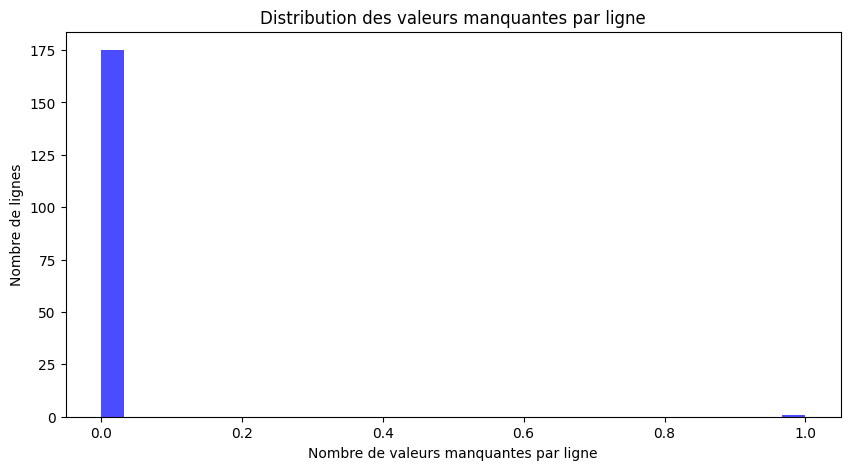

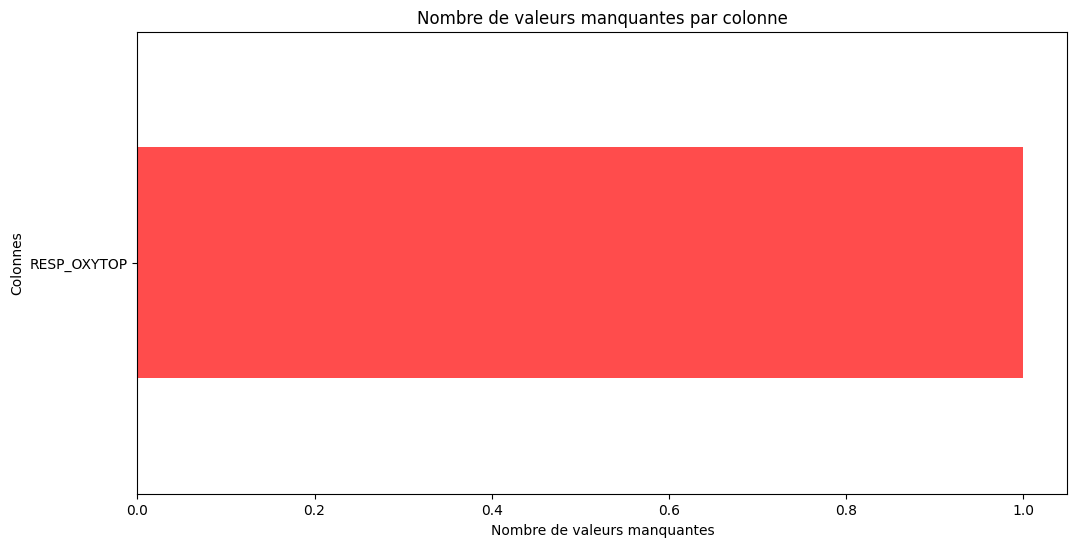

In [ ]:
# Visualisation
plt.figure(figsize=(10, 5))
plt.hist(missing_per_row, bins=30, color='blue', alpha=0.7)
plt.xlabel("Nombre de valeurs manquantes par ligne")
plt.ylabel("Nombre de lignes")
plt.title("Distribution des valeurs manquantes par ligne")
plt.show()

plt.figure(figsize=(12, 6))
missing_per_col[missing_per_col > 0].sort_values().plot(kind='barh', color='red', alpha=0.7)
plt.xlabel("Nombre de valeurs manquantes")
plt.ylabel("Colonnes")
plt.title("Nombre de valeurs manquantes par colonne")
plt.show()


In [ ]:
# Display the complete database with the number of variables per column and their type.
print("Dataframe Indicateurs:")
print(df_indicateurs.info())
print("\nDataframe Spectre:")
print(df_spectre.info())


Dataframe Indicateurs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Echantillon         176 non-null    object 
 1   Humidité            176 non-null    float64
 2   Argile.g.kg         176 non-null    int64  
 3   Limons.g.kg         176 non-null    int64  
 4   Sables.g.kg         176 non-null    int64  
 5   Argile.%            176 non-null    float64
 6   Limons.%            176 non-null    float64
 7   Sables.%            176 non-null    float64
 8   C org               176 non-null    float64
 9   N tot               176 non-null    float64
 10  C/N                 176 non-null    float64
 11  MO                  176 non-null    float64
 12  pH eau              176 non-null    float64
 13  Cal total           176 non-null    float64
 14  CEC                 176 non-null    float64
 15  P2O5                176 non-null  

In [ ]:
# Calculate the median of existing numerical values in "Cal total"
median_val = pd.to_numeric(df_indicateurs["Cal total"], errors='coerce').median()


In [ ]:
df_indicateurs[["Cal total"]].head(5)

Cal total
0      185.0
1      203.2
2      218.2
3      198.9
4      196.0

In [ ]:
df_indicateurs["Cal total"] = pd.to_numeric(df_indicateurs["Cal total"], errors="coerce")  # Convertit tout en float


In [ ]:
df_indicateurs[["Cal total"]].head()

Cal total
0      185.0
1      203.2
2      218.2
3      198.9
4      196.0

In [ ]:
# Nettoyage de la colonne "Echantillon" dans le fichier des indicateurs
df_indicateurs["Echantillon"] = df_indicateurs["Echantillon"].astype(str).str.replace(r"^B\d+-", "", regex=True)

# Fusion des deux fichiers sur la colonne "Echantillon"
df_merged = pd.merge(df_indicateurs, df_spectre, on="Echantillon", how="inner")


In [ ]:
df_merged.head()


Echantillon  Humidité  Argile.g.kg  Limons.g.kg  Sables.g.kg  Argile.%  \
0     Th-TS-2      6.20          104          154          742      10.4   
1     Th-TS-3      6.83          112          204          684      11.2   
2     Th-TS-4      8.89          178          273          549      17.8   
3     Th-TR-1      6.62          121          217          662      12.1   
4     Th-TR-2      6.53          126          205          669      12.6   

   Limons.%  Sables.%   C org  N tot  ...  9990,421501  9991,385734  \
0      15.4      74.2  11.715  1.093  ...     0.766234     0.766317   
1      20.4      68.4  15.233  1.382  ...     0.788969      0.78866   
2      27.3      54.9  16.845  1.645  ...     0.780474     0.780053   
3      21.7      66.2  12.757  1.223  ...     0.796332     0.796486   
4      20.5      66.9  12.512  1.268  ...     0.784139     0.784121   

   9992,349967  9993,3142  9994,278434  9995,242667  9996,2069  9997,171134  \
0     0.766294   0.766154     0.765929     0.765687   0.765512     0.765471   
1     0.788405   0.788225      0.78811     0.788037    0.78798     0.787929   
2     0.779734   0.779538     0.779465     0.779512   0.779678     0.779966   
3     0.796608   0.796701     0.796779     0.796861   0.796957     0.797077   
4     0.784107   0.784099     0.784099     0.784115    0.78416     0.784251   

   9998,135367  9999,0996  
0       0.7656     0.7656  
1      0.78789    0.78789  
2      0.78037    0.78037  
3     0.797229   0.797229  
4     0.784393   0.784393  

[5 rows x 6276 columns]

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Columns: 6276 entries, Echantillon to 9999,0996
dtypes: float64(48), int64(4), object(6224)
memory usage: 5.5+ MB


In [31]:
# Sauvegarde du fichier fusionné au format CSV
file_path = "c:/Users/ARMAND/Downloads/data_project/Dataset_Fusionné.csv" 
df_merged.to_csv(file_path, index=False, sep=";")

# Fournir le lien de téléchargement
file_path


'c:/Users/ARMAND/Downloads/data_project/Dataset_Fusionné.csv'

In [36]:
#  Vérification des valeurs manquantes
missing_values = df_merged.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(missing_values)

RESP_OXYTOP    1
dtype: int64


In [37]:
#  Matrice de corrélation (seulement sur les indicateurs physico-chimiques et biologiques)
numeric_df = df_merged.select_dtypes(include=np.number)
corr_matrix = numeric_df.iloc[:, 1:58].corr() # Exclude the first column (likely 'Echantillon')


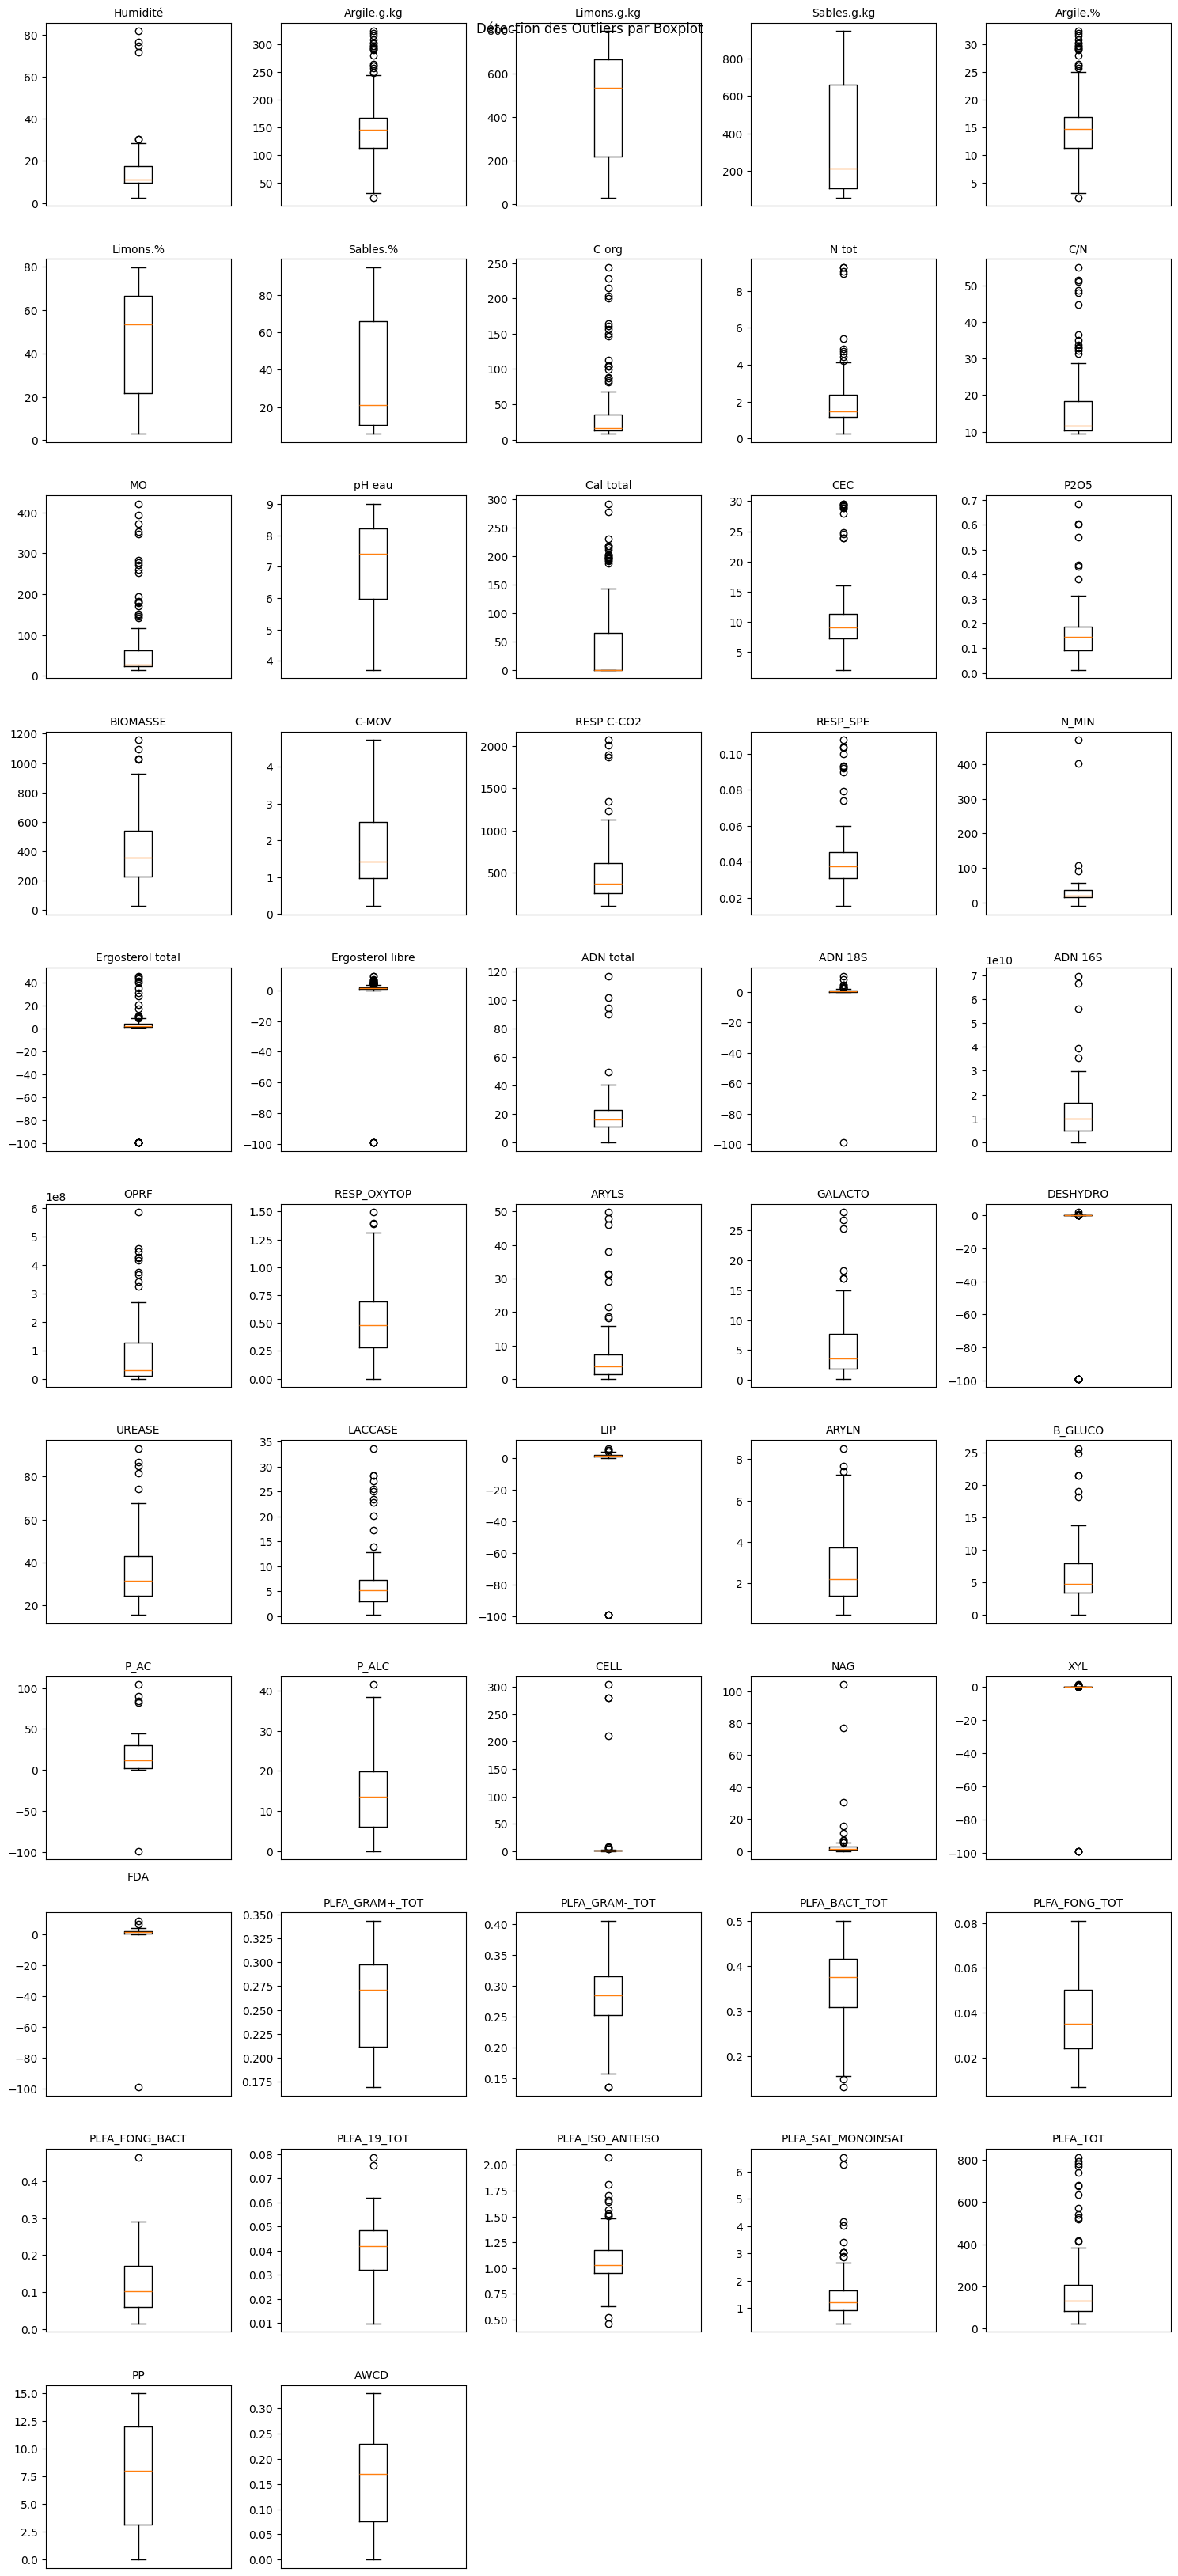

In [38]:
# Sélectionner uniquement les colonnes numériques
numerical_columns = df_merged.select_dtypes(include=['number']).columns

# Déterminer dynamiquement le nombre de sous-graphiques nécessaires
num_vars = len(numerical_columns)
num_cols = 5  # Nombre fixe de colonnes
num_rows = int(np.ceil(num_vars / num_cols))  # Calcul du nombre de lignes

# Création des boxplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols * 3, num_rows * 3))
fig.suptitle("Détection des Outliers par Boxplot")

# Parcourir les variables et tracer les boxplots
for ax, col in zip(axes.flatten(), numerical_columns):
    ax.boxplot(df_merged[col].dropna())
    ax.set_title(col, fontsize=10)
    ax.set_xticks([])  # Cacher les ticks pour une meilleure lisibilité

# Supprimer les sous-graphiques vides
for i in range(num_vars, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

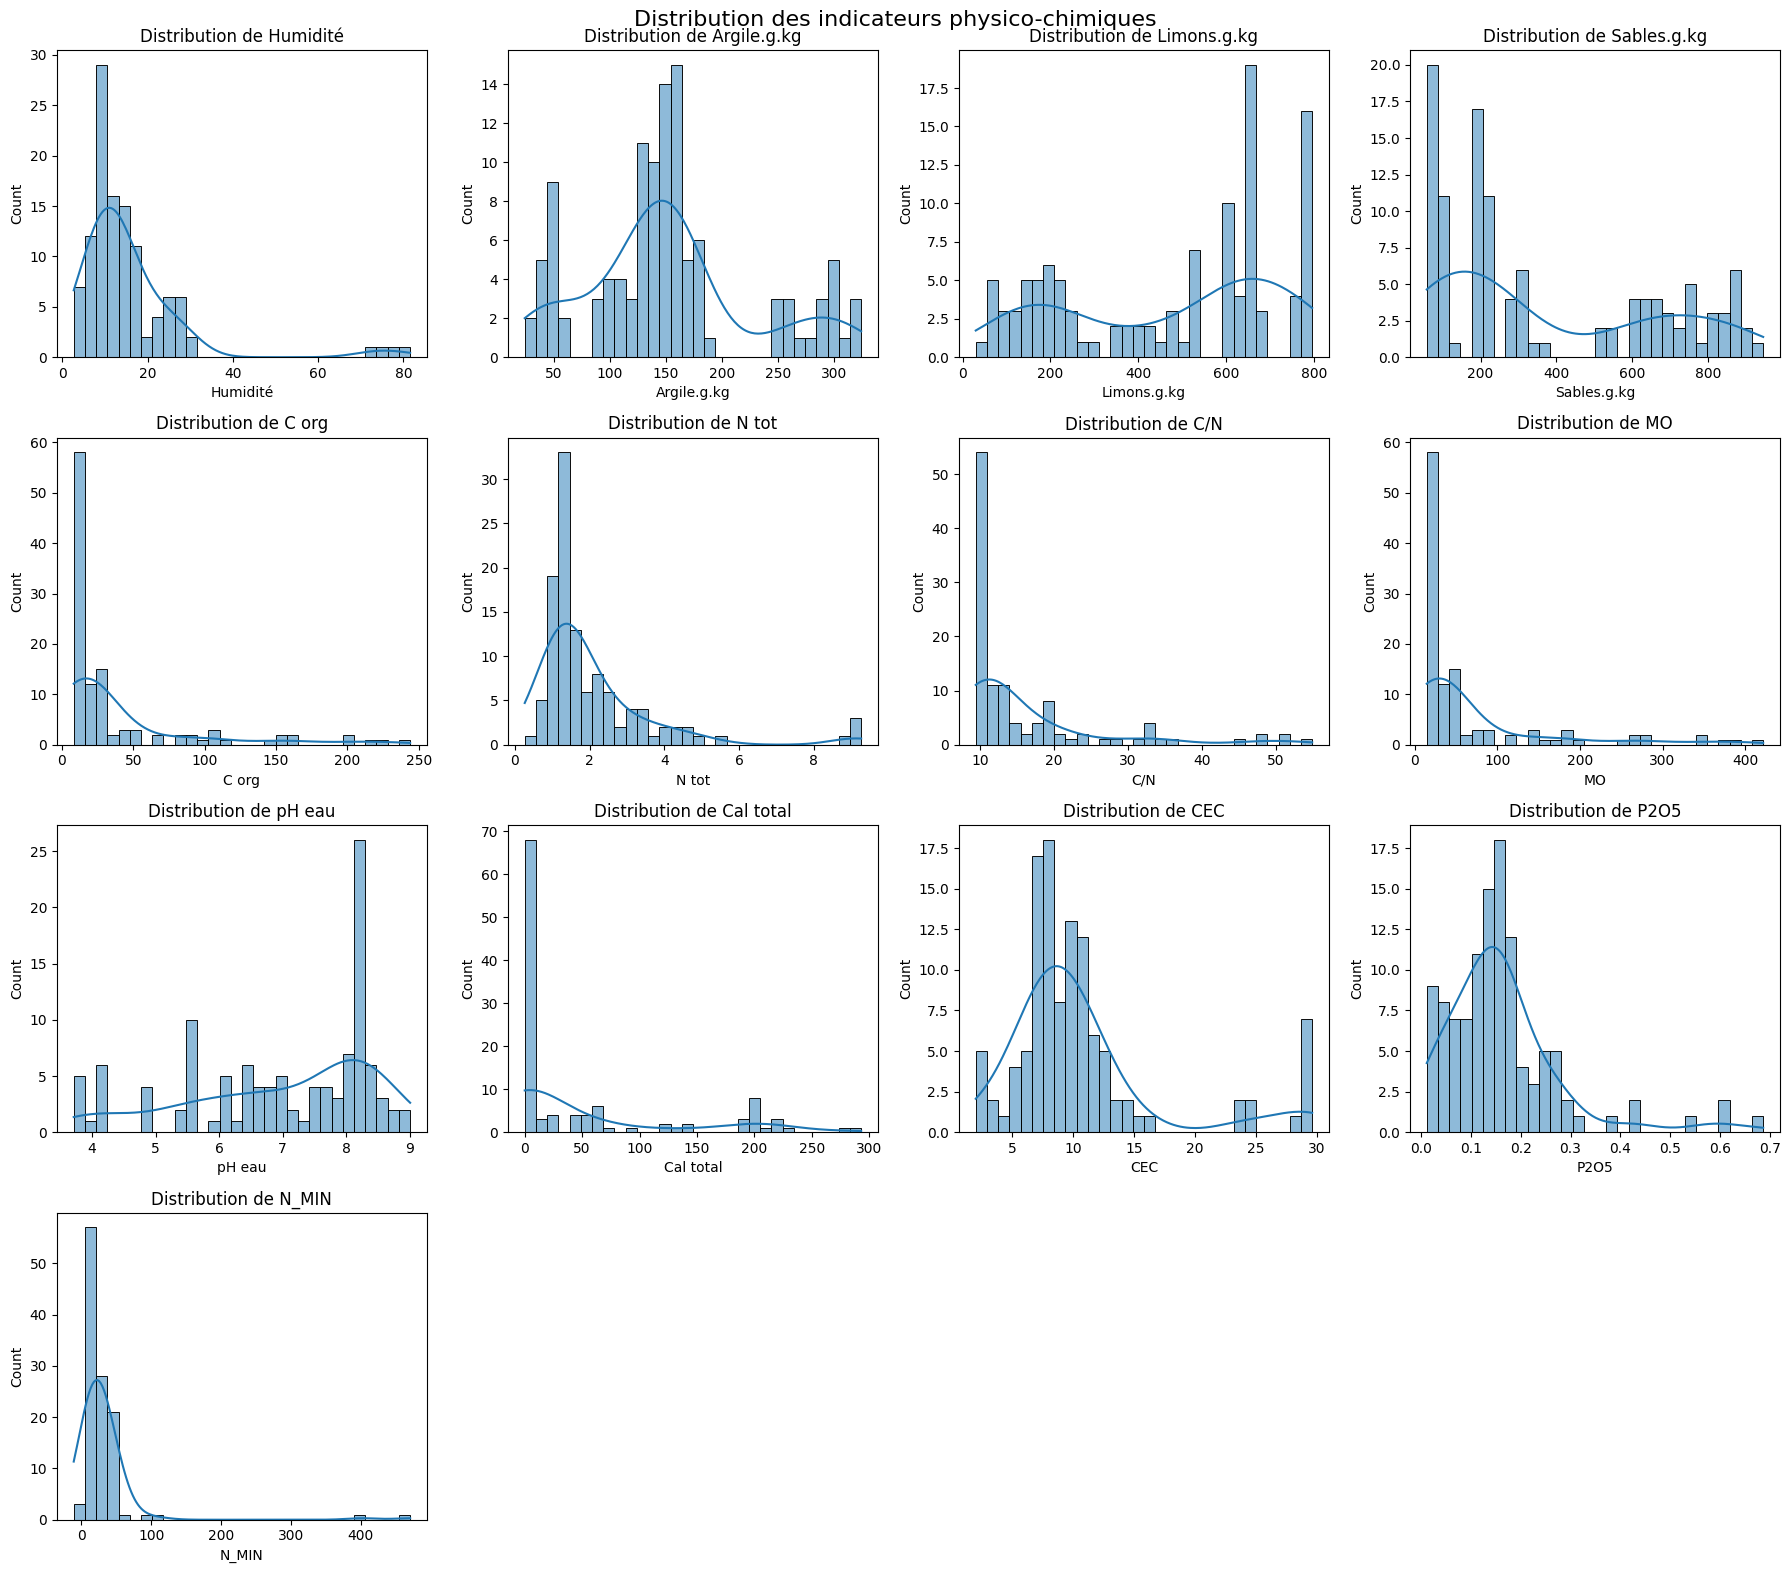

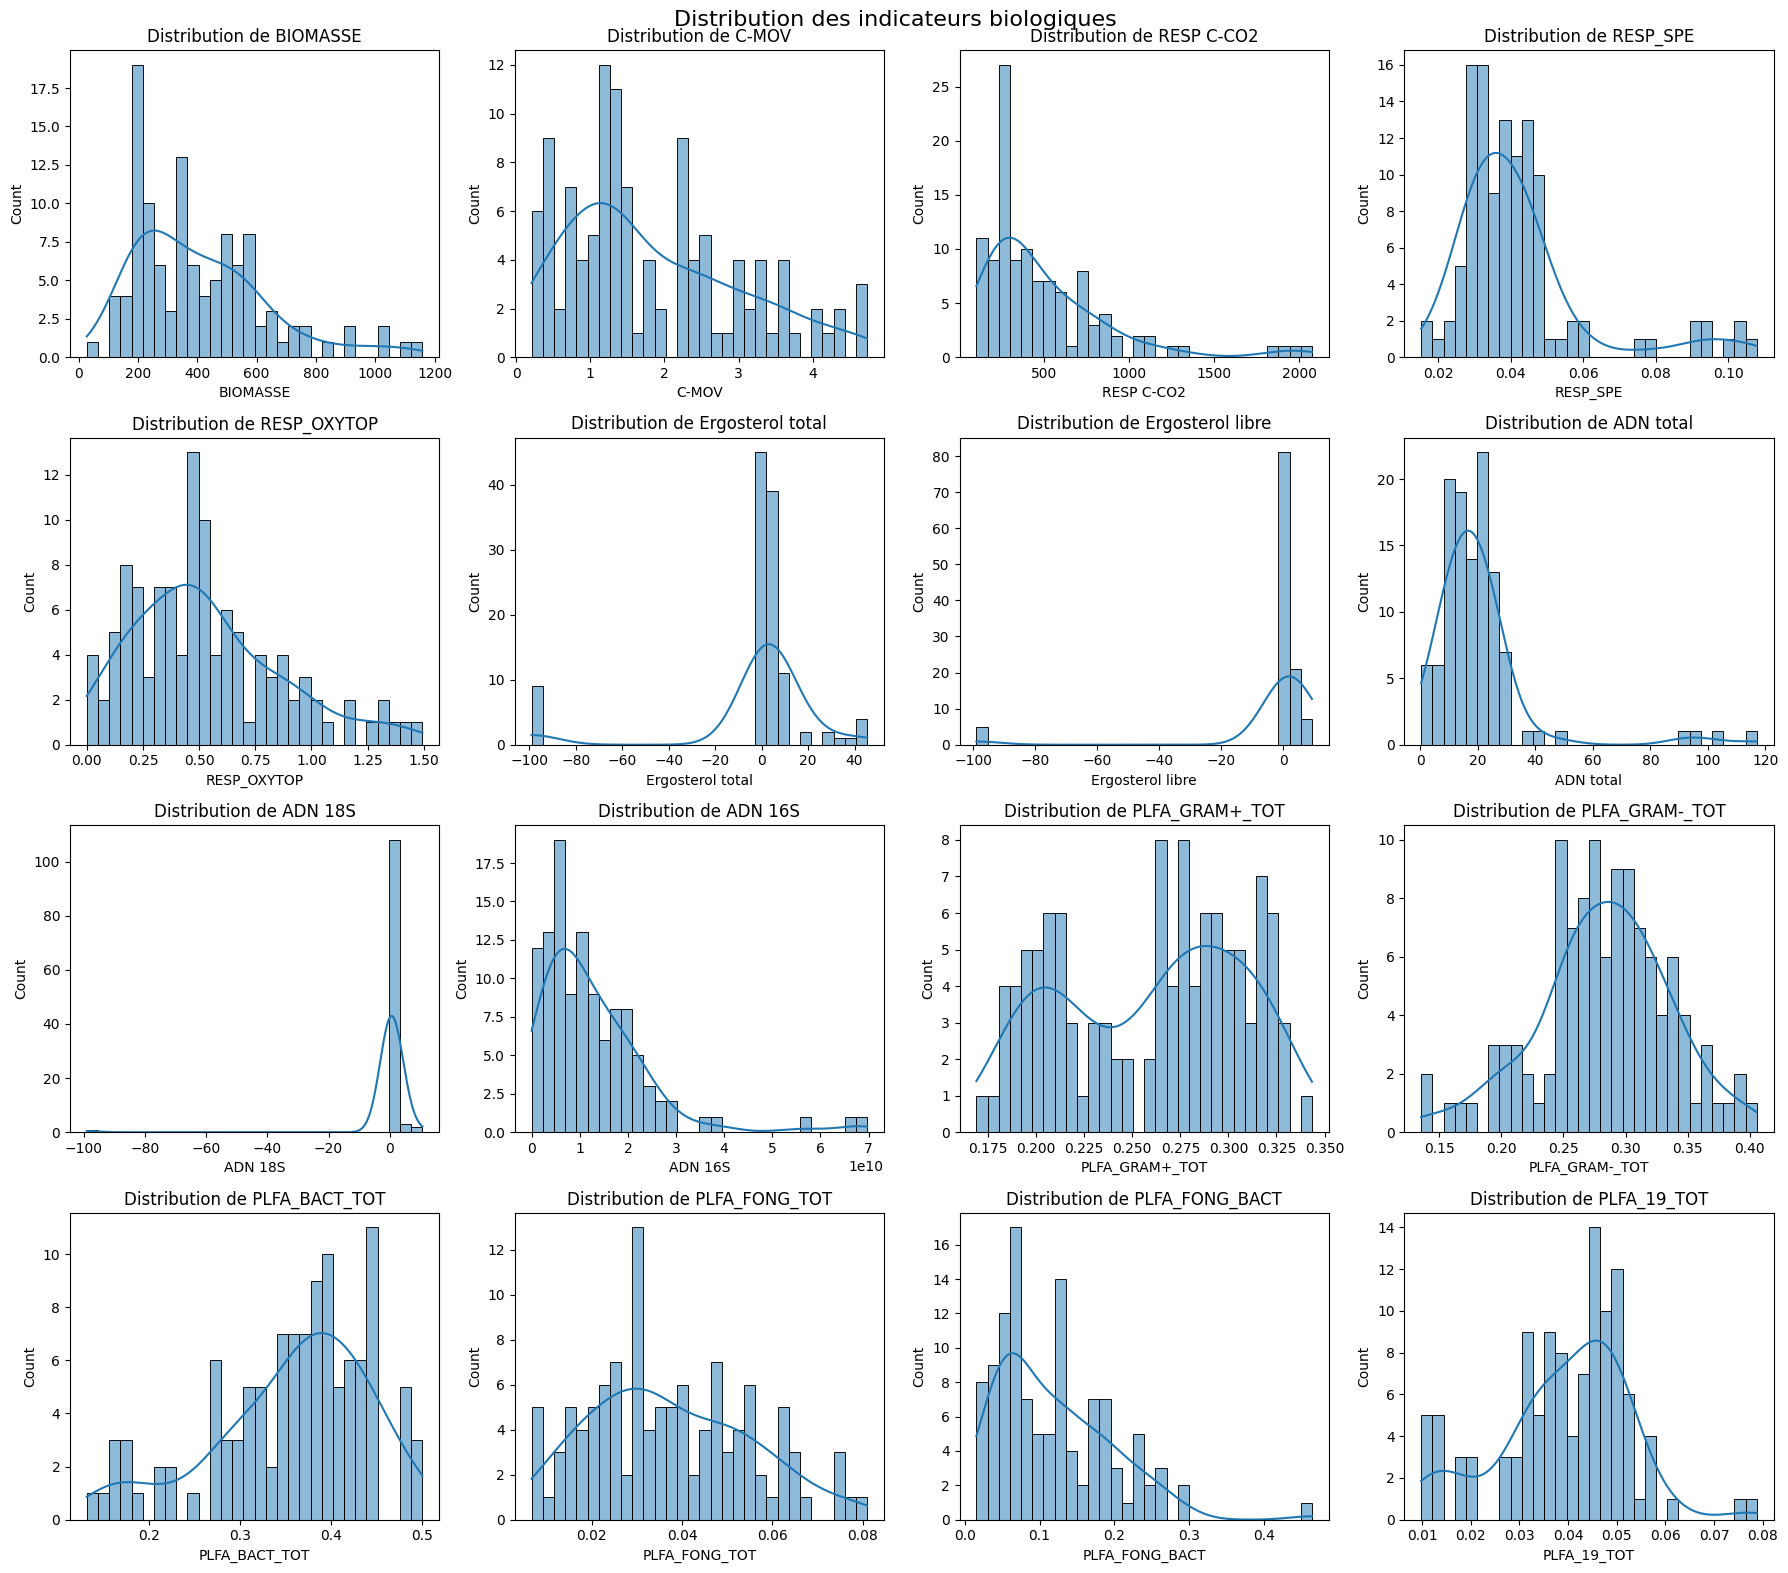

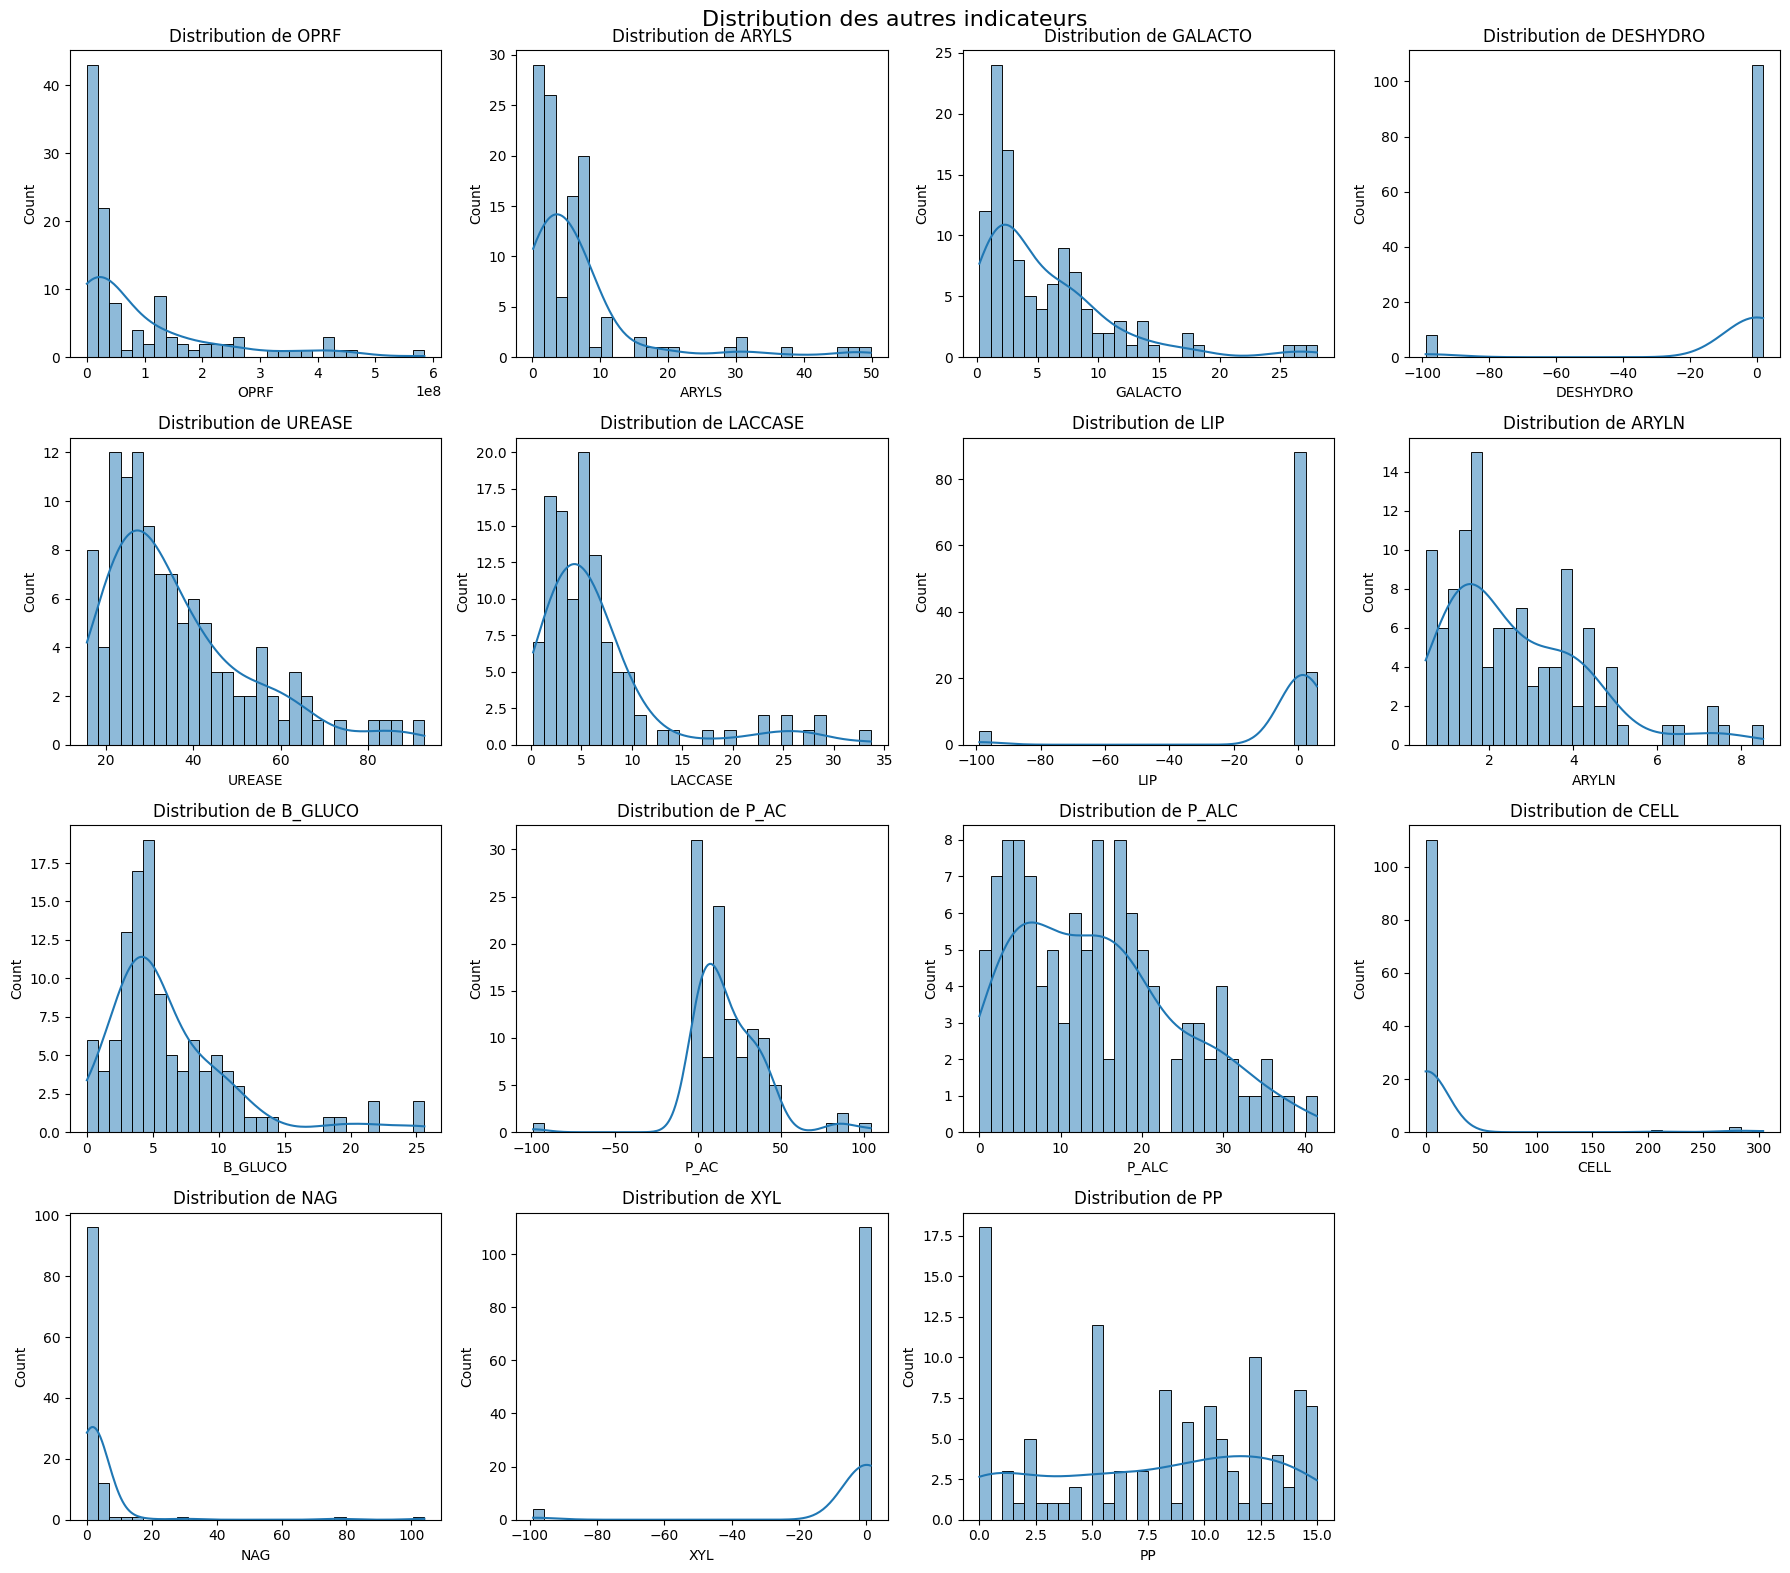

In [39]:

# Définition des groupes d'indicateurs
physico_chimiques = [
    "Humidité", "Argile.g.kg", "Limons.g.kg", "Sables.g.kg",
    "C org", "N tot", "C/N", "MO", "pH eau", "Cal total",
    "CEC", "P2O5", "N_MIN"
]

biologiques = [
    "BIOMASSE", "C-MOV", "RESP C-CO2", "RESP_SPE",
    "RESP_OXYTOP", "Ergosterol total", "Ergosterol libre",
    "ADN total", "ADN 18S", "ADN 16S", "PLFA_GRAM+_TOT",
    "PLFA_GRAM-_TOT", "PLFA_BACT_TOT", "PLFA_FONG_TOT",
    "PLFA_FONG_BACT", "PLFA_19_TOT"
]

autres = [
    "OPRF", "ARYLS", "GALACTO", "DESHYDRO", "UREASE",
    "LACCASE", "LIP", "ARYLN", "B_GLUCO", "P_AC",
    "P_ALC", "CELL", "NAG", "XYL", "FDA", "PP"
]

# Fonction pour tracer les distributions avec une mise en page adaptative
def plot_distributions(df, indicators, title):
    valid_indicators = [col for col in indicators if col in df.columns]

    if not valid_indicators:
        print(f"Aucun indicateur valide pour {title}.")
        return

    num_plots = len(valid_indicators)
    num_cols = 4  # Nombre de colonnes par défaut
    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
    fig.suptitle(title, fontsize=16)

    axes = axes.flatten() if num_plots > 1 else [axes]

    for ax, col in zip(axes, valid_indicators):
        sns.histplot(df[col], bins=30, kde=True, ax=ax)
        ax.set_title(f"Distribution de {col}")

    # Cacher les sous-graphiques inutilisés
    for i in range(len(valid_indicators), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Tracé des distributions pour chaque groupe
plot_distributions(df_merged, physico_chimiques, "Distribution des indicateurs physico-chimiques")
plot_distributions(df_merged, biologiques, "Distribution des indicateurs biologiques")
plot_distributions(df_merged, autres, "Distribution des autres indicateurs")


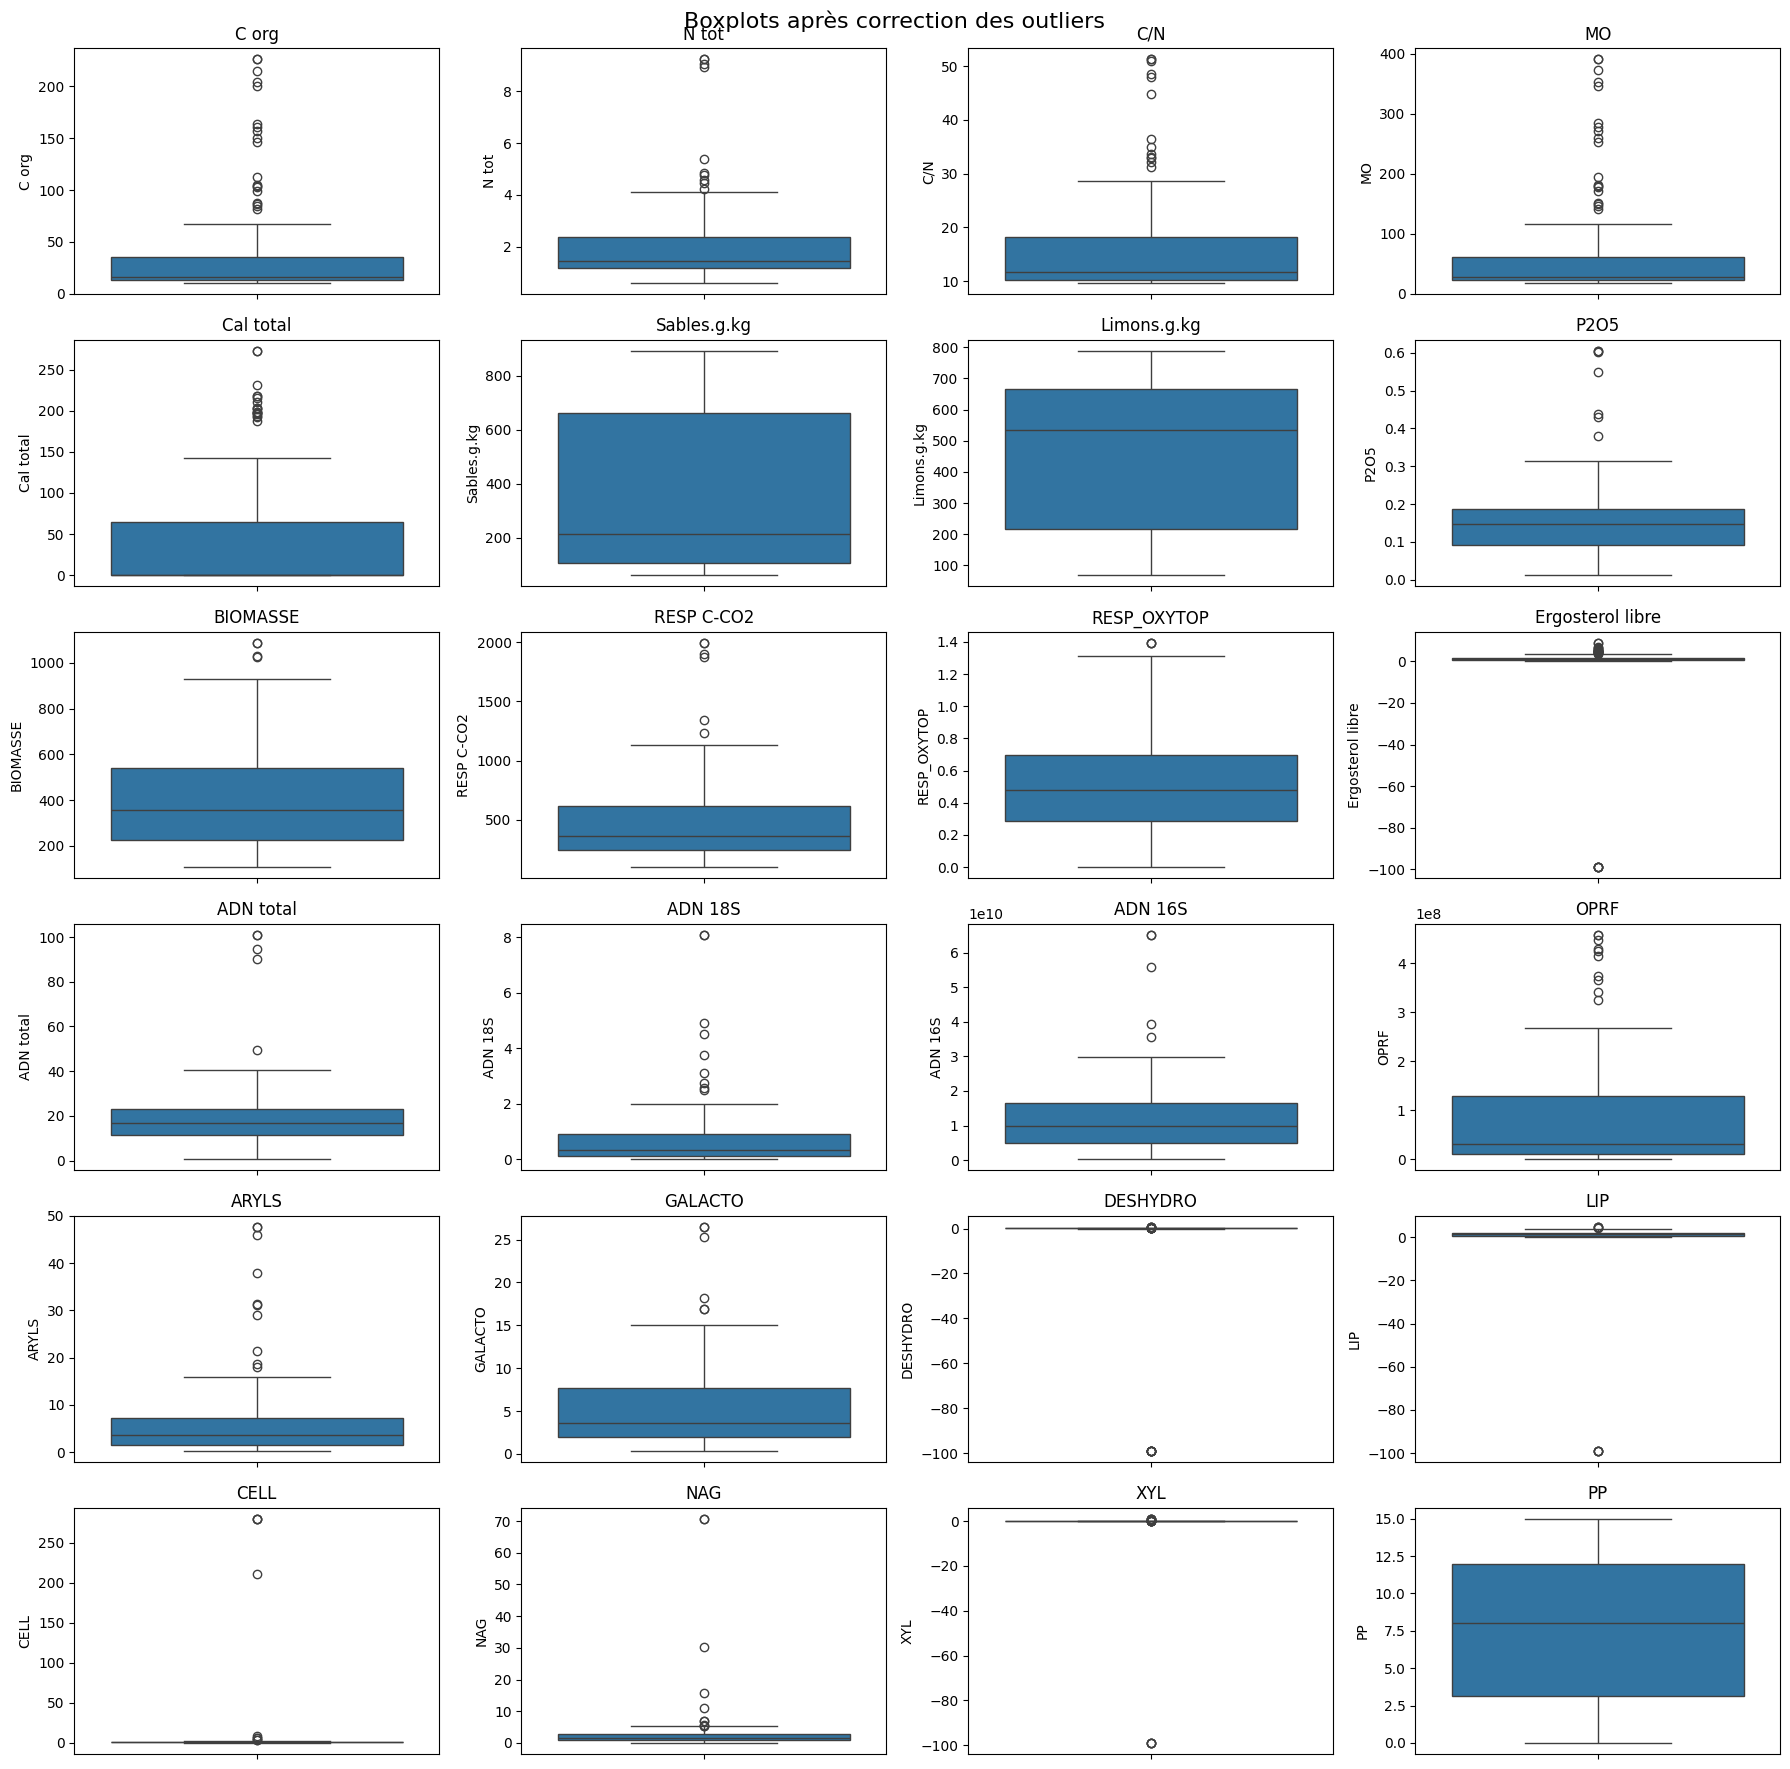

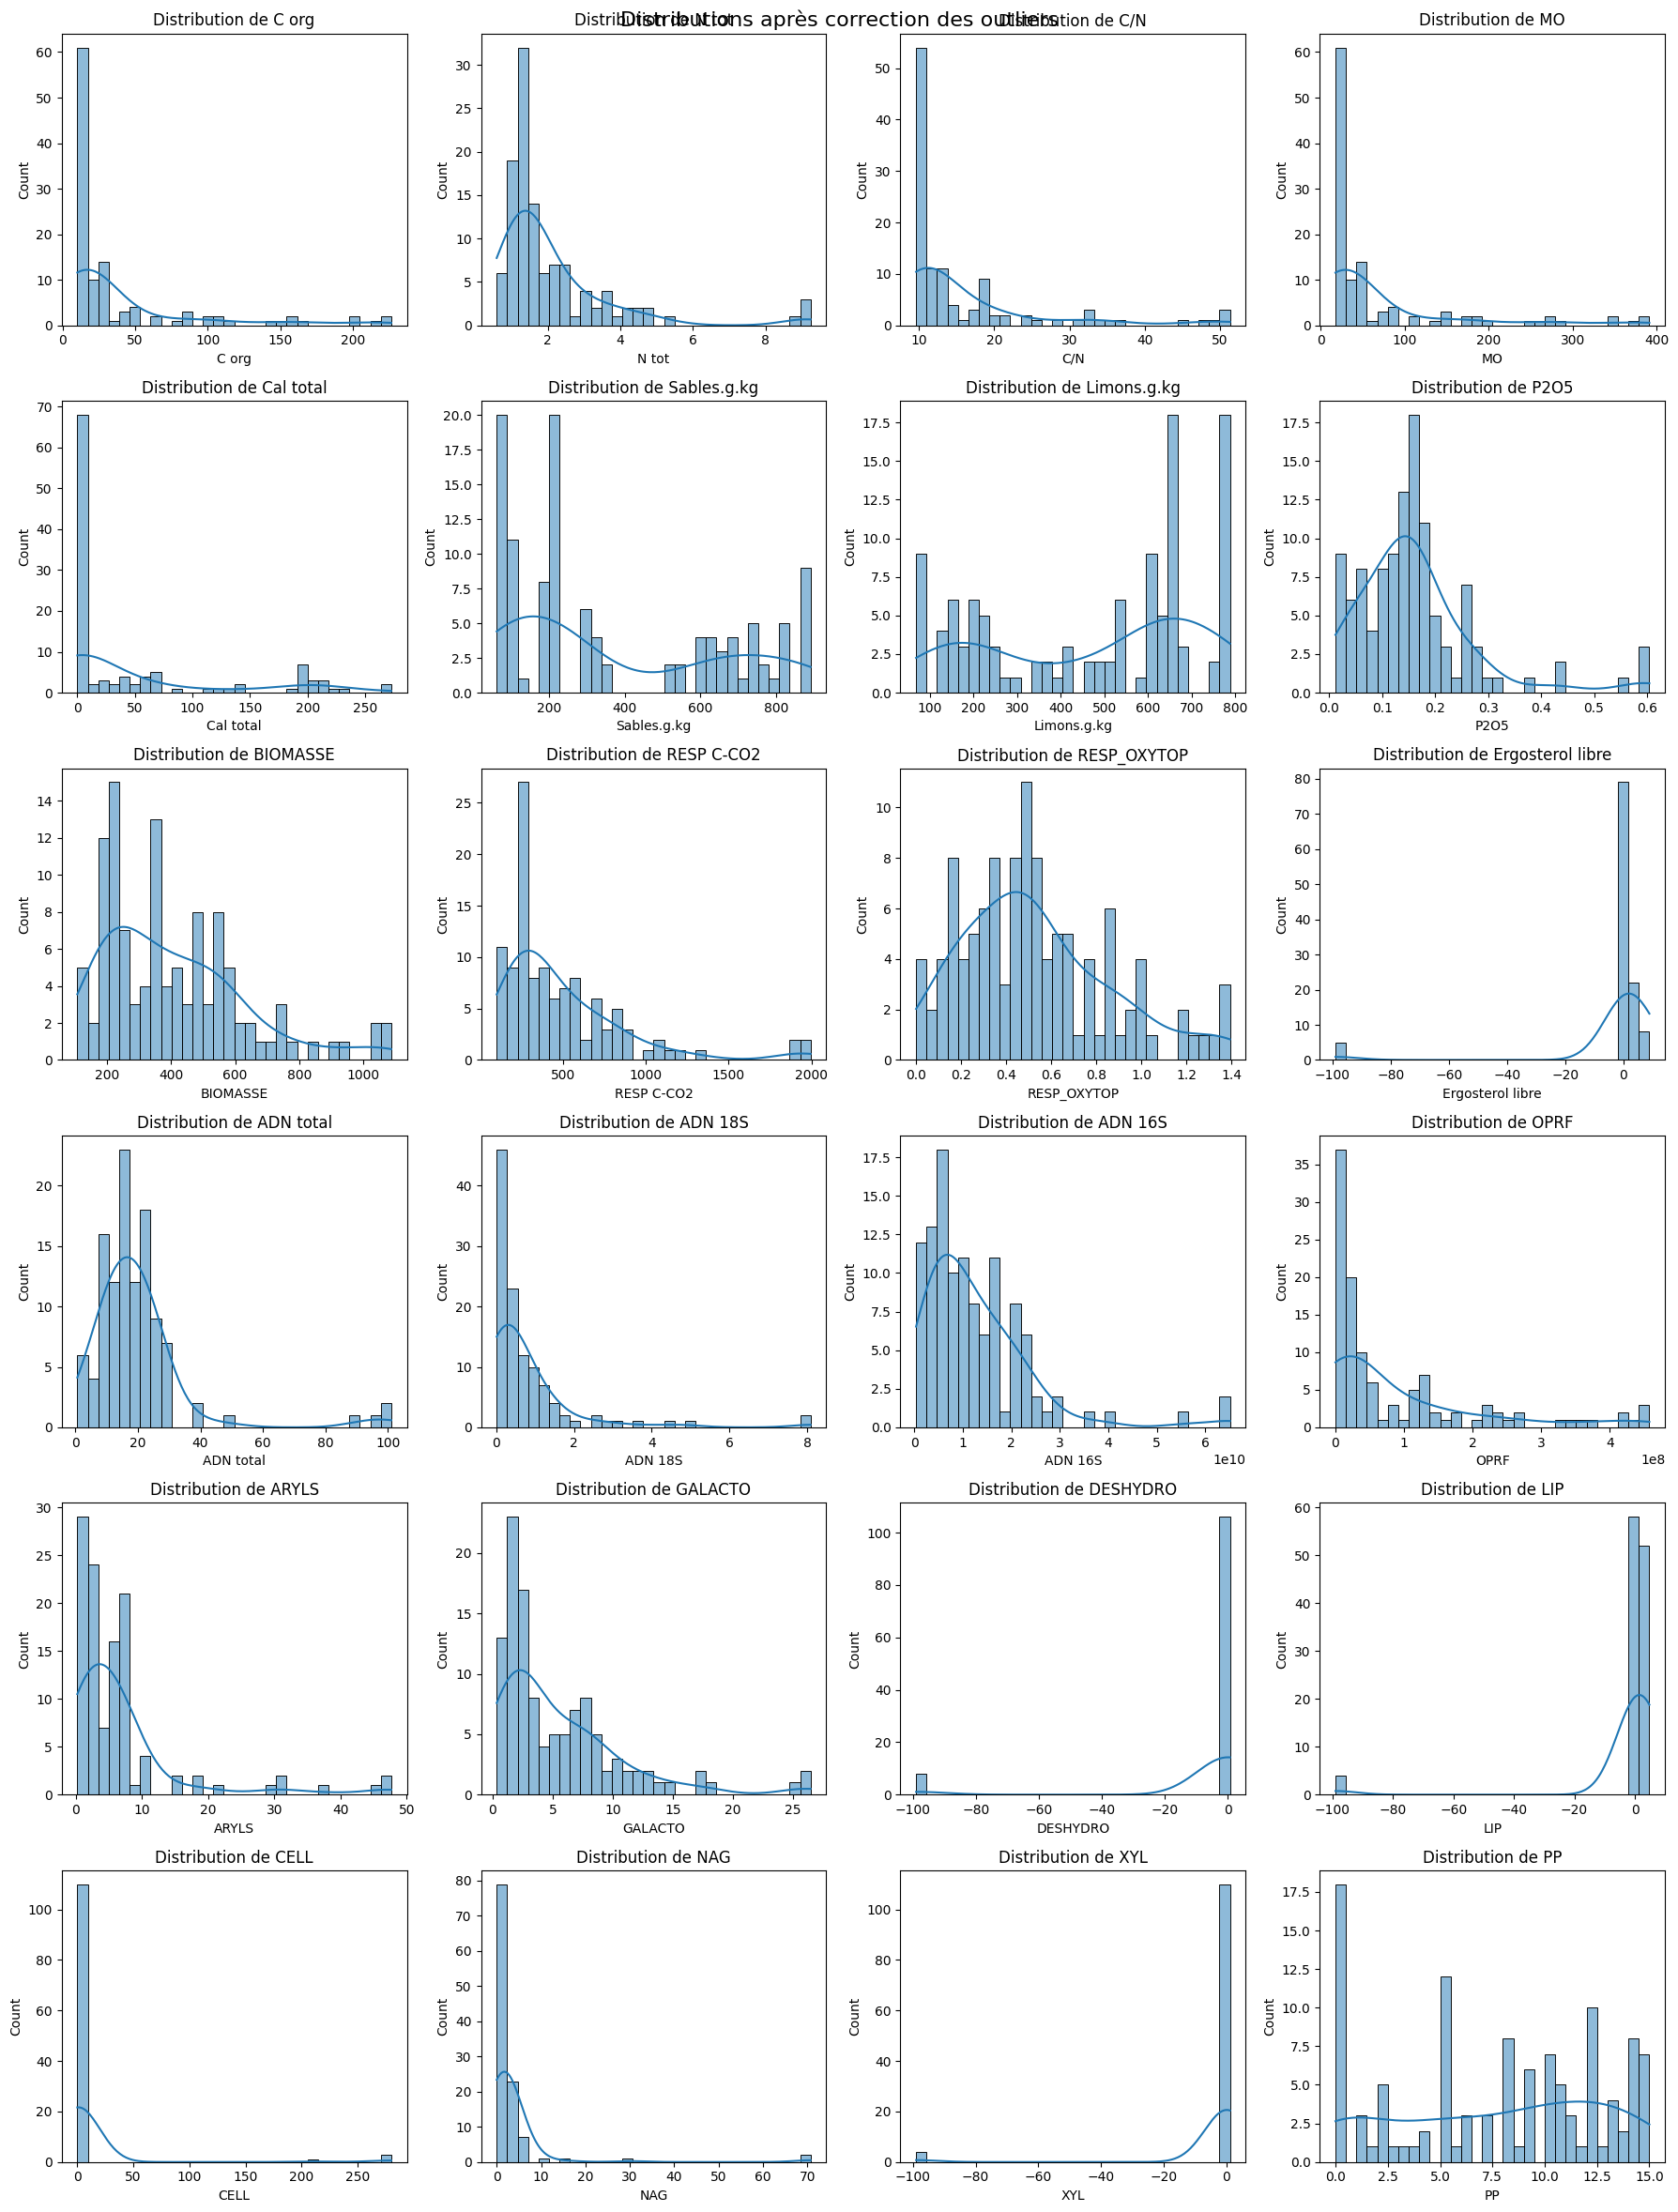

In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox, yeojohnson
from sklearn.preprocessing import PowerTransformer

#  Liste des indicateurs avec des outliers sévères
outlier_columns = [
    "C org", "N tot", "C/N", "MO", "Cal total", "Sables.g.kg", "Limons.g.kg", "P2O5",
    "BIOMASSE", "RESP C-CO2", "RESP_OXYTOP", "Ergosterol libre", "ADN total", "ADN 18S", "ADN 16S", #RESP_OXYTOP instead of RESP OXYTOP
    "OPRF", "ARYLS", "GALACTO", "DESHYDRO", "LIP", "CELL", "NAG", "XYL", "PP"
]

#  Détection et correction des outliers par Winsorisation
def winsorize_outliers(df, columns, lower_percentile=1, upper_percentile=99):
    df_corrected = df.copy()
    for col in columns:
        # Check if the column exists before proceeding
        if col in df.columns:
            lower_bound, upper_bound = np.percentile(df[col].dropna(), [lower_percentile, upper_percentile])
            df_corrected[col] = np.clip(df[col], lower_bound, upper_bound)
        else:
            print(f" Column '{col}' not found in DataFrame. Skipping Winsorization for this column.")
    return df_corrected

#  Appliquer la Winsorisation
df_cleaned = winsorize_outliers(df_merged, outlier_columns)
#  Visualisation des nouvelles distributions après correction
def plot_boxplots(df, columns, title):
    num_plots = len(columns)
    num_cols = 4
    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 3))
    fig.suptitle(title, fontsize=16)

    axes = axes.flatten()
    for ax, col in zip(axes, columns):
        sns.boxplot(y=df[col], ax=ax)
        ax.set_title(col)

    # Supprimer les axes inutilisés
    for i in range(len(columns), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

#  Affichage des boxplots après correction des outliers
plot_boxplots(df_cleaned, outlier_columns, "Boxplots après correction des outliers")

#  Vérification des distributions après Winsorisation
def plot_distributions(df, indicators, title):
    valid_indicators = [col for col in indicators if col in df.columns]
    if not valid_indicators:
        print(f"Aucun indicateur valide pour {title}.")
        return

    num_plots = len(valid_indicators)
    num_cols = 4
    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
    fig.suptitle(title, fontsize=16)

    axes = axes.flatten()
    for ax, col in zip(axes, valid_indicators):
        sns.histplot(df[col], bins=30, kde=True, ax=ax)
        ax.set_title(f"Distribution de {col}")

    for i in range(len(valid_indicators), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

#  Afficher les distributions après correction
plot_distributions(df_cleaned, outlier_columns, "Distributions après correction des outliers")



c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ARMA

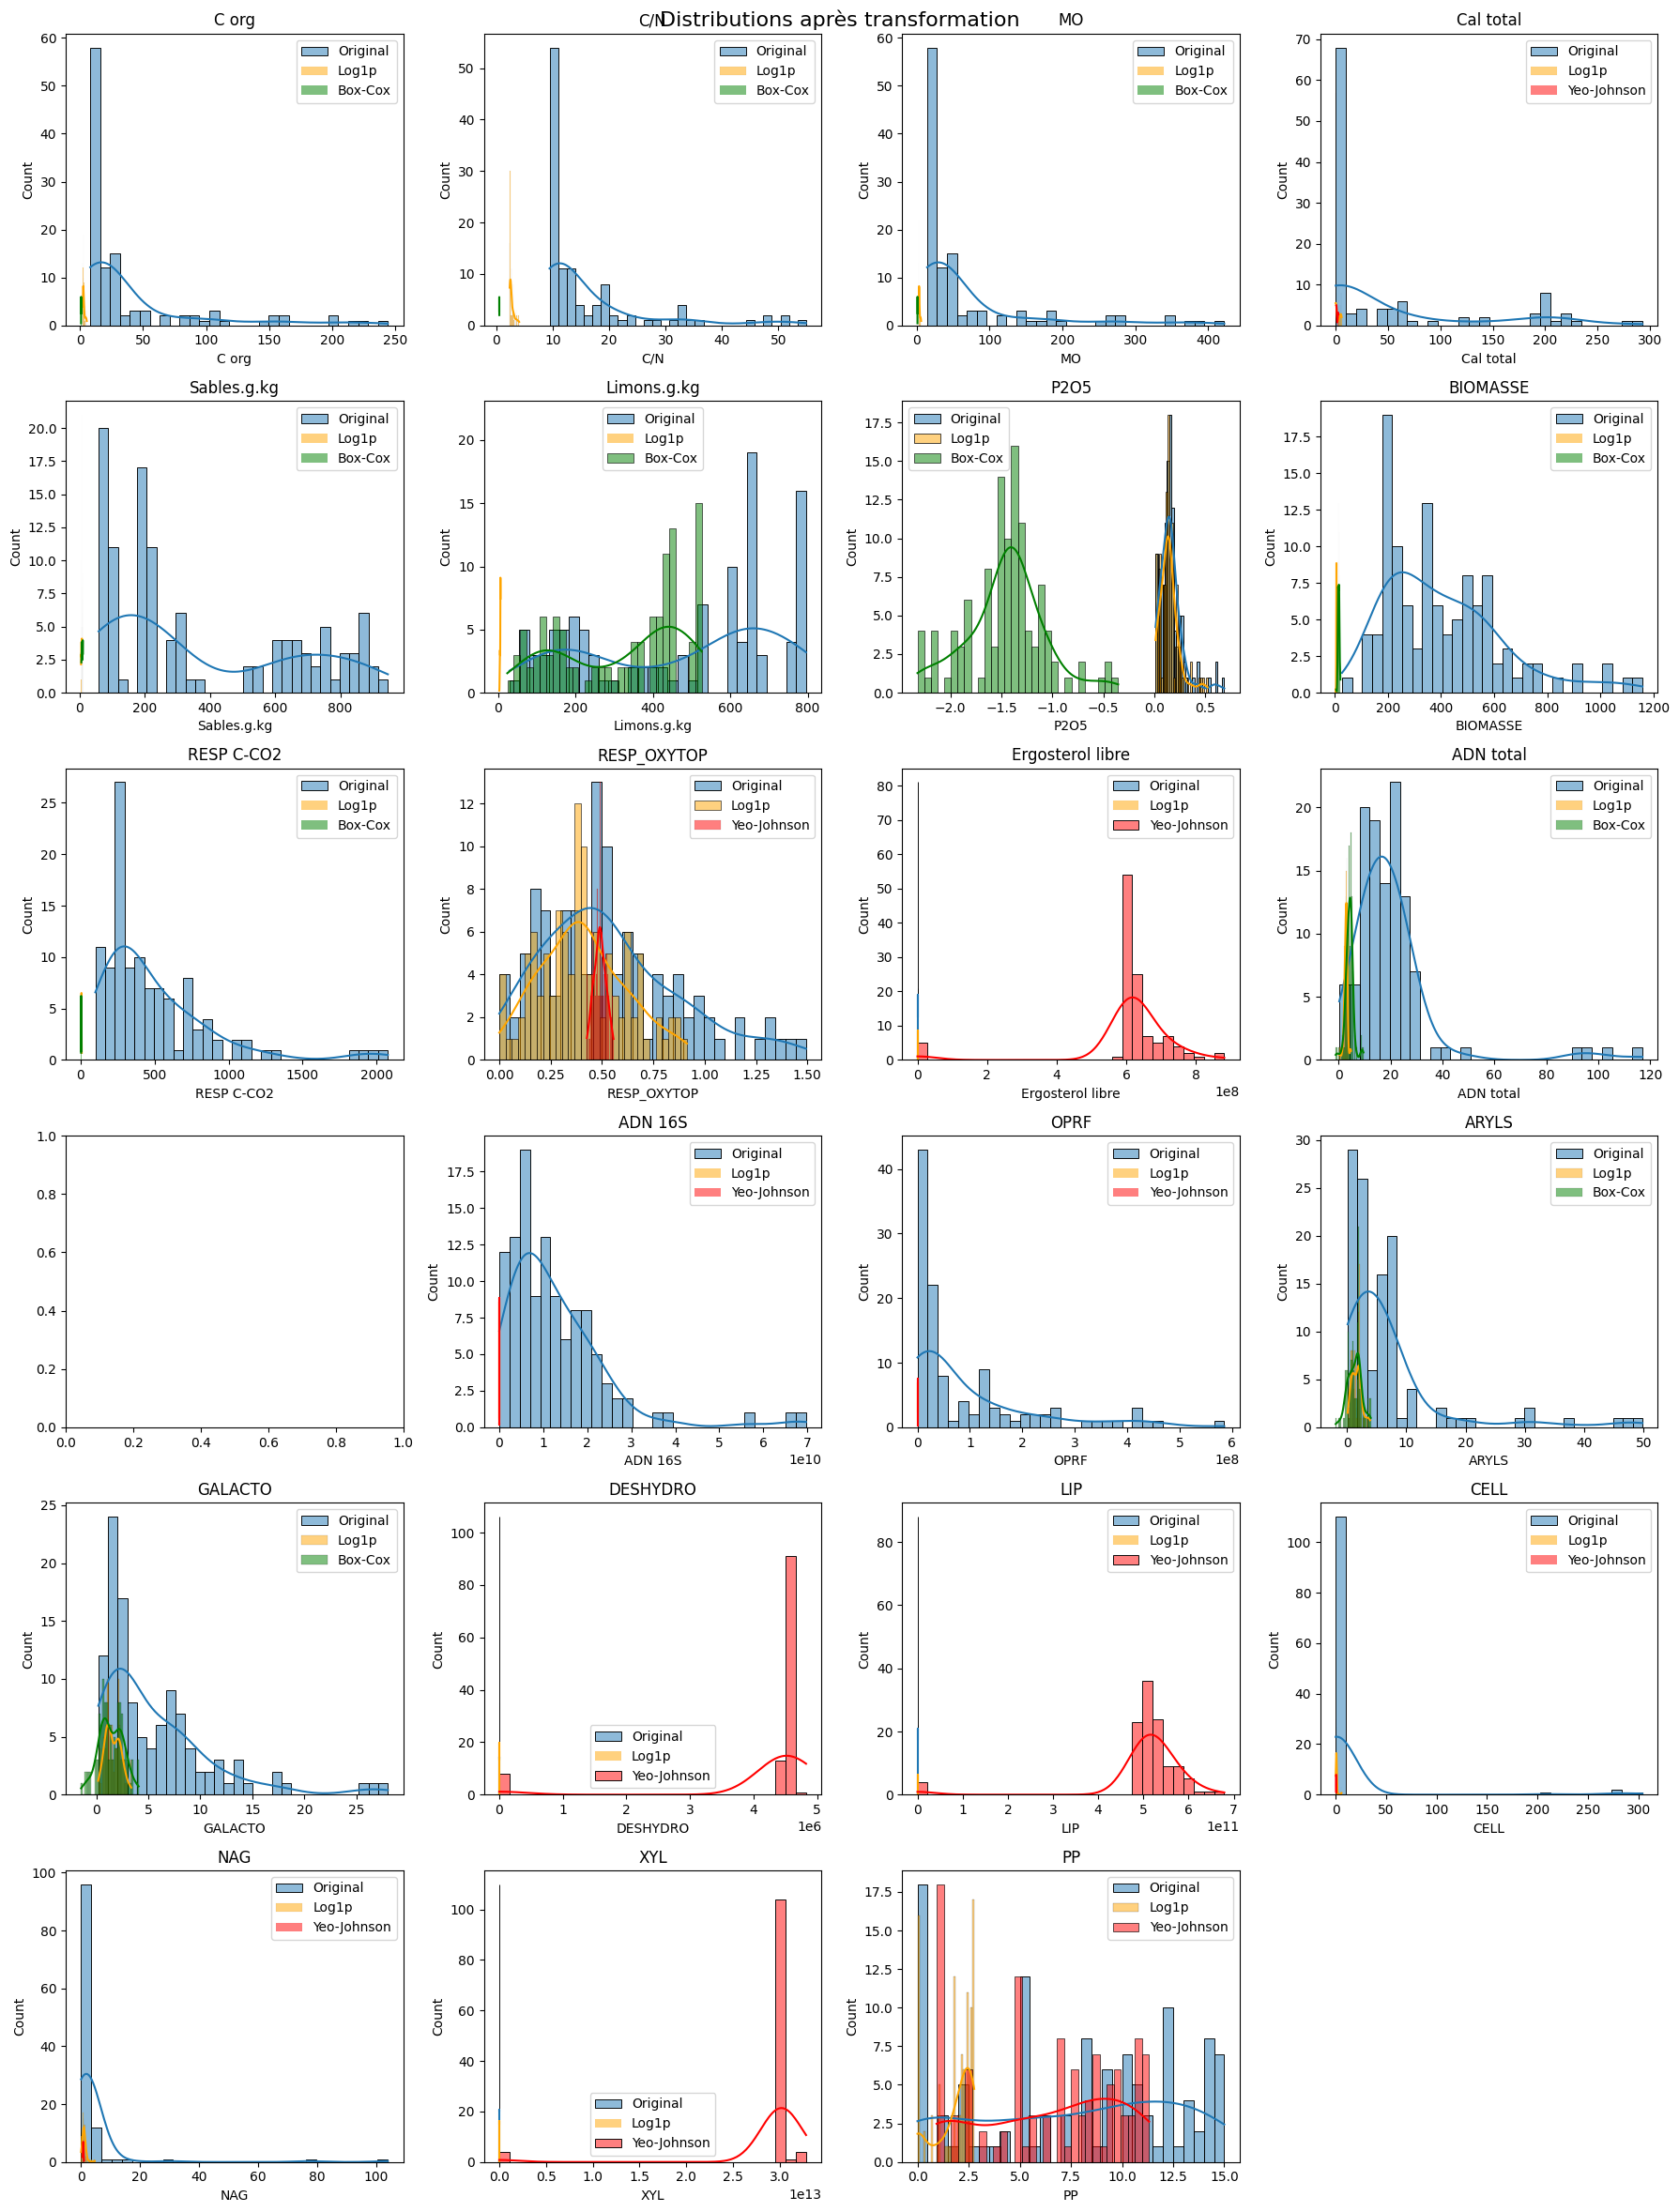

In [41]:
# Liste des indicateurs nécessitant des transformations
indicateurs_a_transformer = [
    "C org", "C/N", "MO", "Cal total", "Sables.g.kg", "Limons.g.kg", "P2O5", "BIOMASSE", "RESP C-CO2",
    "RESP_OXYTOP", "Ergosterol libre", "ADN total", "ADN 185", "ADN 16S", "OPRF", "ARYLS", "GALACTO", "DESHYDRO",
    "LIP", "CELL", "NAG", "XYL", "PP"
]

def apply_transformations(df, indicators):
    """Applique des transformations Log1p, Box-Cox ou Yeo-Johnson en fonction des données."""
    df_transformed = df.copy()
    transformations = {}

    for var in indicators:
        if var in df.columns:
            # Replace infinite values with NaN
            df_transformed[var] = df_transformed[var].replace([np.inf, -np.inf], np.nan)

            # Drop rows with NaN values for the current variable
            df_transformed.dropna(subset=[var], inplace=True)

            # Ensure data is numeric and finite
            df_transformed[var] = pd.to_numeric(df_transformed[var], errors='coerce')
            df_transformed = df_transformed[np.isfinite(df_transformed[var])]

            if (df_transformed[var] <= 0).any():
                # Yeo-Johnson pour gérer les valeurs nulles ou négatives
                # Replace infinite values with NaN in the original df[var] before transformation
                transformed_data, lambda_val = yeojohnson(df_transformed[var] - df_transformed[var].min() + 1)

                # Assign the transformed data to the new column
                df_transformed[var + "_yeojohnson"] = transformed_data
                transformations[var] = "Yeo-Johnson"
            else:
                # Box-Cox pour les données strictement positives
                df_transformed[var + "_boxcox"], lambda_val = boxcox(df_transformed[var])
                transformations[var] = "Box-Cox"

            # Transformation Log1p toujours appliquée pour comparaison
            df_transformed[var + "_log1p"] = np.log1p(df_transformed[var])

    return df_transformed, transformations

# Appliquer les transformations
df_transformed, transformations = apply_transformations(df_merged, indicateurs_a_transformer)

# Fonction pour afficher les distributions avant et après transformation
def plot_transformed_distributions(df_original, df_transformed, indicators):
    num_plots = len(indicators)
    num_cols = 4
    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
    fig.suptitle("Distributions après transformation", fontsize=16)
    axes = axes.flatten()

    for ax, col in zip(axes, indicators):
        if col in df_original.columns and col + "_log1p" in df_transformed.columns:
            sns.histplot(df_original[col], bins=30, kde=True, label="Original", ax=ax)
            sns.histplot(df_transformed[col + "_log1p"], bins=30, kde=True, label="Log1p", ax=ax, color='orange')
            if col + "_boxcox" in df_transformed.columns:
                sns.histplot(df_transformed[col + "_boxcox"], bins=30, kde=True, label="Box-Cox", ax=ax, color='green')
            if col + "_yeojohnson" in df_transformed.columns:
                sns.histplot(df_transformed[col + "_yeojohnson"], bins=30, kde=True, label="Yeo-Johnson", ax=ax, color='red')
            ax.set_title(col)
            ax.legend()

    for i in range(len(indicators), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Affichage des résultats
plot_transformed_distributions(df_merged, df_transformed, indicateurs_a_transformer)


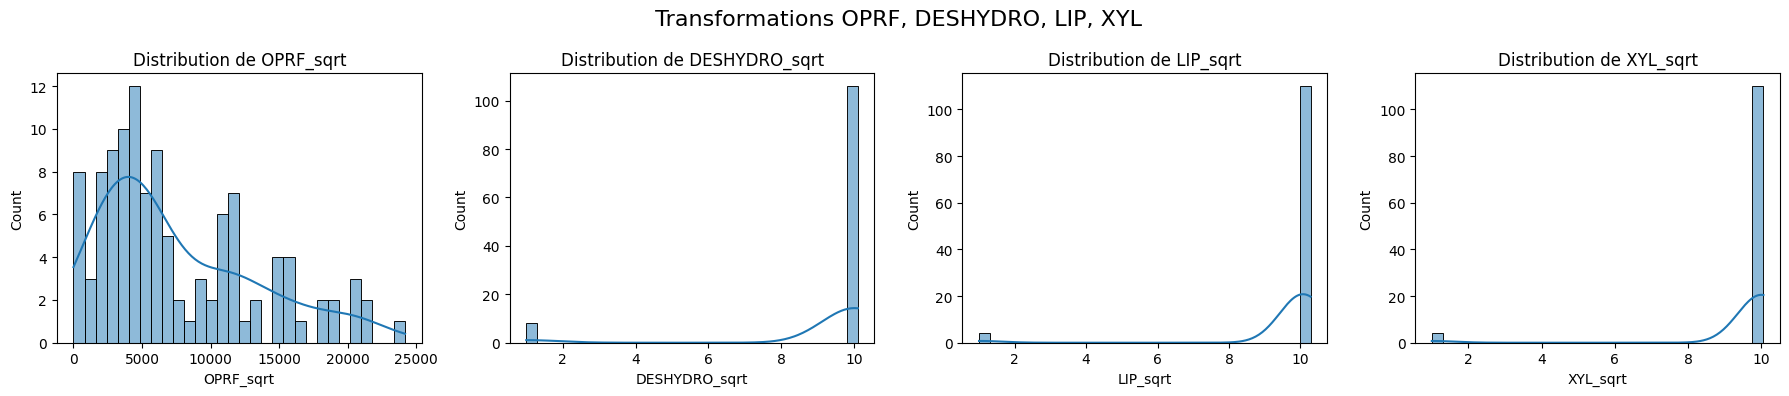

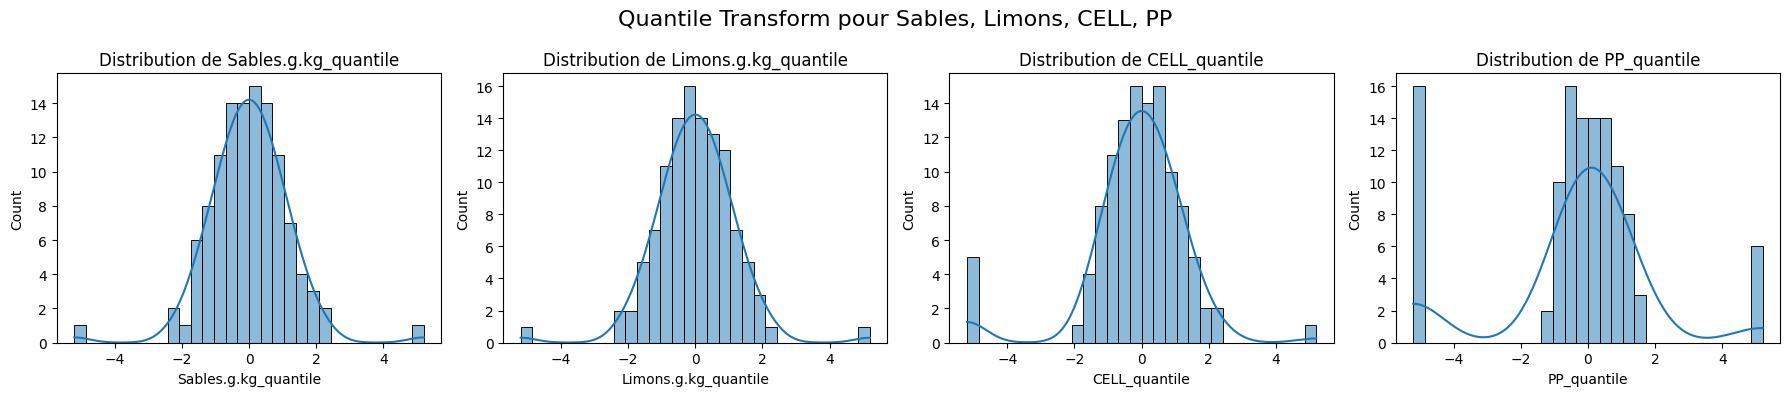

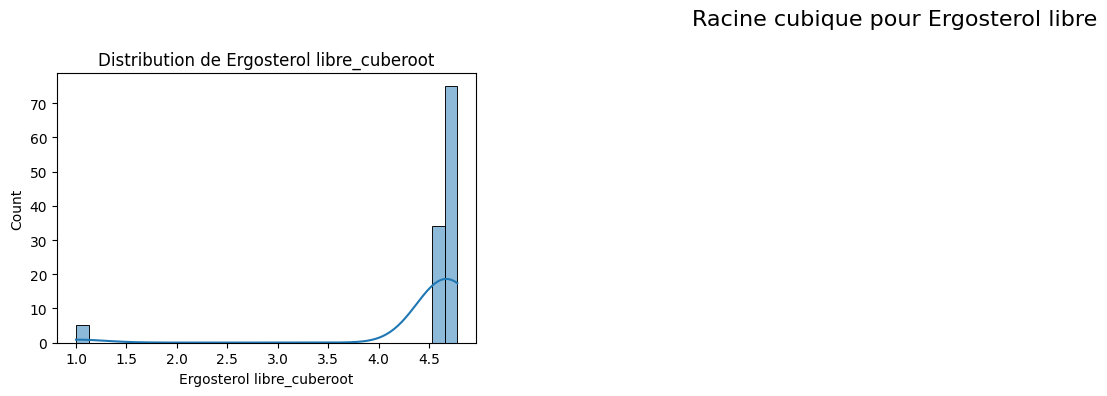

In [42]:
from sklearn.preprocessing import QuantileTransformer

# Liste des indicateurs à ajuster
indicateurs_a_ajuster = ["OPRF", "DESHYDRO", "LIP", "XYL", "Sables.g.kg", "Limons.g.kg", "CELL", "PP", "Ergosterol libre"]

# Fonction pour appliquer les transformations adaptées
def apply_adjusted_transformations(df, cols):
    df_transformed = df.copy()

    for col in cols:
        if col in df_transformed.columns:
            data = df_transformed[col].copy()

            # Remplacer les valeurs infinies et NaN
            data = data.replace([np.inf, -np.inf], np.nan).fillna(data.median())

            # Décalage pour éviter les valeurs négatives
            shift = abs(data.min()) + 1 if data.min() < 0 else 0

            # Racine carrée après décalage pour OPRF, DESHYDRO, LIP, XYL
            if col in ["OPRF", "DESHYDRO", "LIP", "XYL"]:
                df_transformed[col + "_sqrt"] = np.sqrt(data + shift)

            # Normalisation par quantiles pour Sables.g.kg, Limons.g.kg, CELL, PP
            if col in ["Sables.g.kg", "Limons.g.kg", "CELL", "PP"]:
                qt = QuantileTransformer(n_quantiles=min(100, len(data)), output_distribution='normal')
                df_transformed[col + "_quantile"] = qt.fit_transform(data.values.reshape(-1, 1)).flatten()

            # Transformation racine cubique pour Ergosterol libre
            if col == "Ergosterol libre":
                df_transformed[col + "_cuberoot"] = np.cbrt(data + shift)

    return df_transformed

# Appliquer les transformations ajustées
df_transformed = apply_adjusted_transformations(df_merged, indicateurs_a_ajuster)

#  Tracer les nouvelles distributions
plot_distributions(df_transformed, ["OPRF_sqrt", "DESHYDRO_sqrt", "LIP_sqrt", "XYL_sqrt"], " Transformations OPRF, DESHYDRO, LIP, XYL")
plot_distributions(df_transformed, ["Sables.g.kg_quantile", "Limons.g.kg_quantile", "CELL_quantile", "PP_quantile"], "Quantile Transform pour Sables, Limons, CELL, PP")
plot_distributions(df_transformed, ["Ergosterol libre_cuberoot"], "Racine cubique pour Ergosterol libre")


c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (114). n_quantiles is set to n_samples.
  warnings.warn(


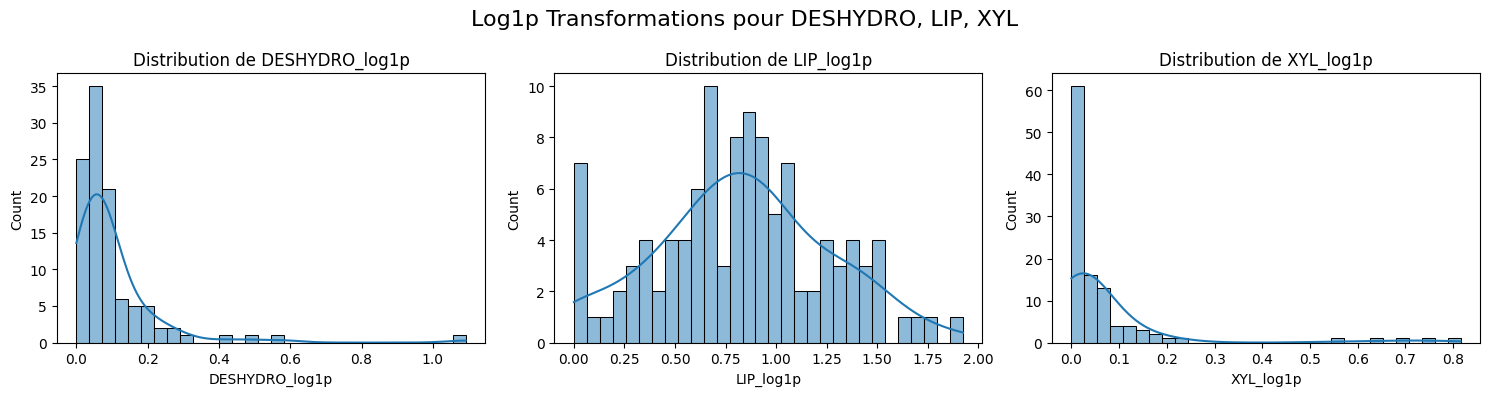

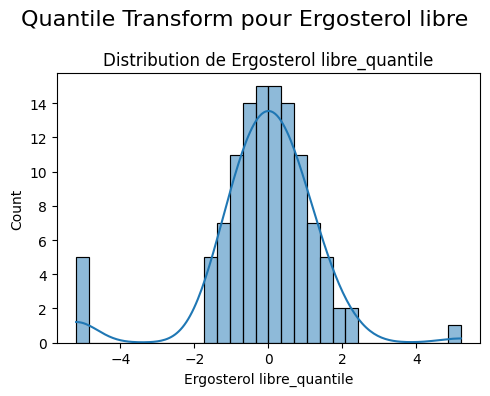

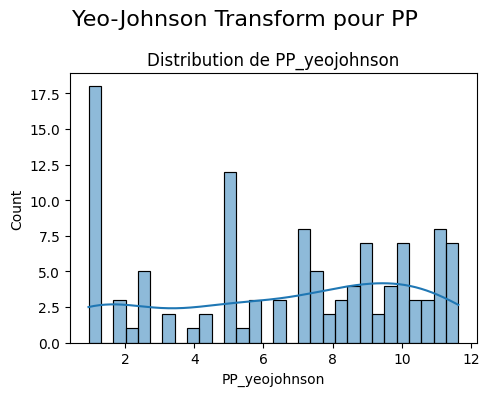

In [43]:
# Copier le dataframe pour éviter de modifier l'original
df_transformed = df_merged.copy()

# Appliquer log1p (logarithme naturel de (x+1)) pour DESHYDRO, LIP et XYL
for col in ["DESHYDRO", "LIP", "XYL"]:
    df_transformed[col + "_log1p"] = np.log1p(df_transformed[col])

# Appliquer transformation quantile pour Ergosterol libre
qt = QuantileTransformer(output_distribution='normal', random_state=42)
df_transformed["Ergosterol libre_quantile"] = qt.fit_transform(df_transformed[["Ergosterol libre"]])

# Appliquer transformation Yeo-Johnson pour PP
df_transformed["PP_yeojohnson"], _ = yeojohnson(df_transformed["PP"] - df_transformed["PP"].min() + 1)

# Fonction de traçage des nouvelles distributions
def plot_transformed_distributions(df, transformations, title):
    num_cols = len(transformations)
    fig, axes = plt.subplots(1, num_cols, figsize=(5*num_cols, 4))
    fig.suptitle(title, fontsize=16)

    if num_cols == 1:
        axes = [axes]

    for ax, col in zip(axes, transformations):
        sns.histplot(df[col], bins=30, kde=True, ax=ax)
        ax.set_title(f"Distribution de {col}")

    plt.tight_layout()
    plt.show()

# Affichage des distributions après les nouvelles transformations
plot_transformed_distributions(df_transformed, ["DESHYDRO_log1p", "LIP_log1p", "XYL_log1p"], "Log1p Transformations pour DESHYDRO, LIP, XYL")
plot_transformed_distributions(df_transformed, ["Ergosterol libre_quantile"], "Quantile Transform pour Ergosterol libre")
plot_transformed_distributions(df_transformed, ["PP_yeojohnson"], "Yeo-Johnson Transform pour PP")


c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (114). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (114). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (114). n_quantiles is set to n_samples.
  warnings.warn(
c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2829: User

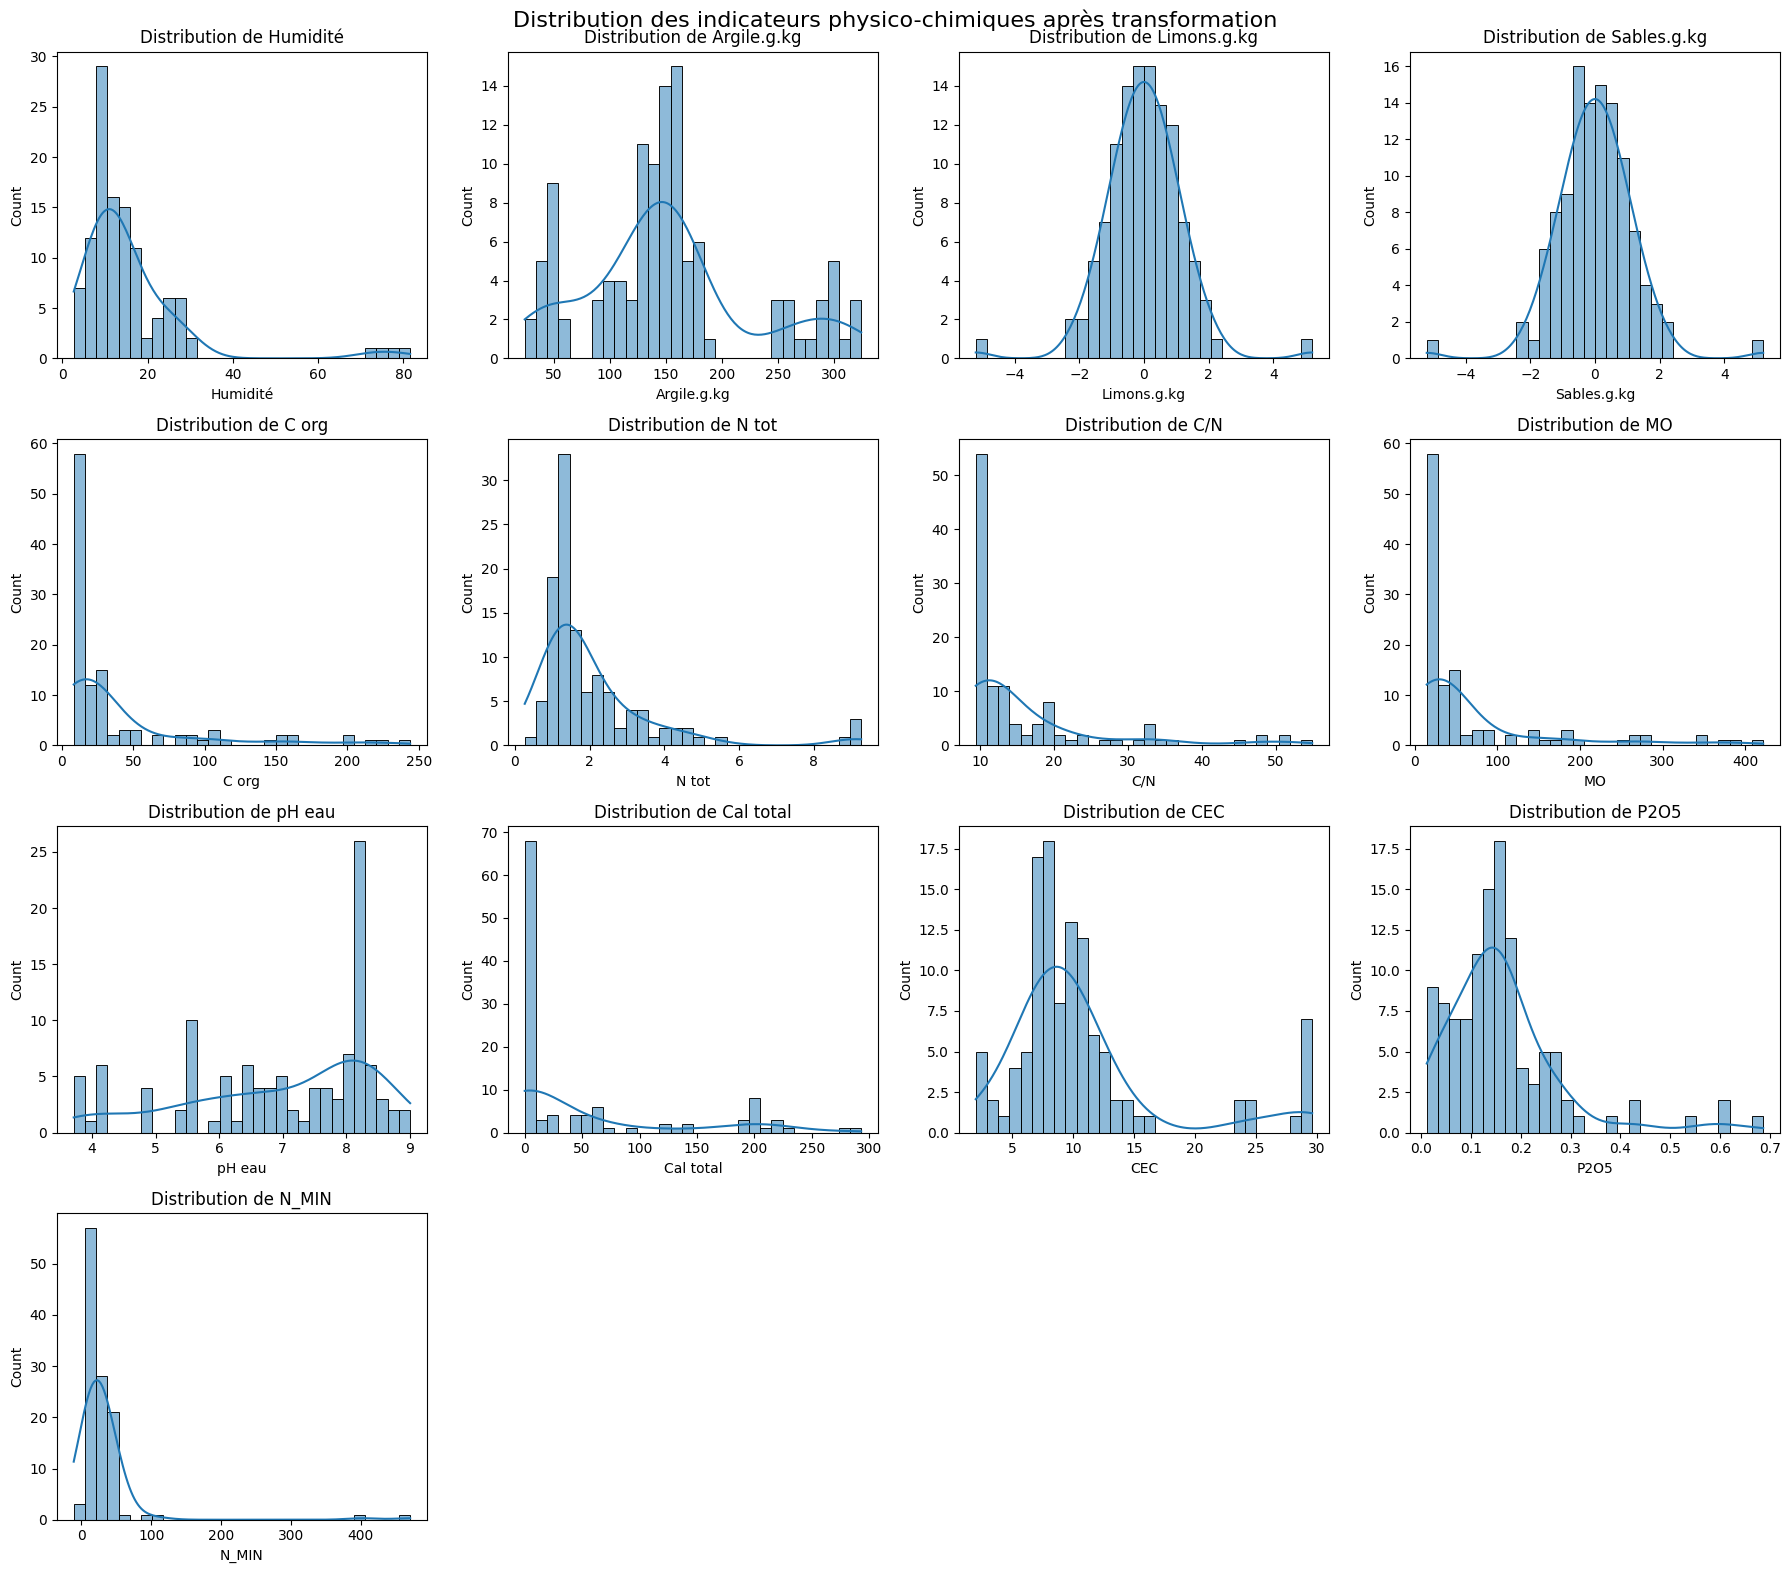

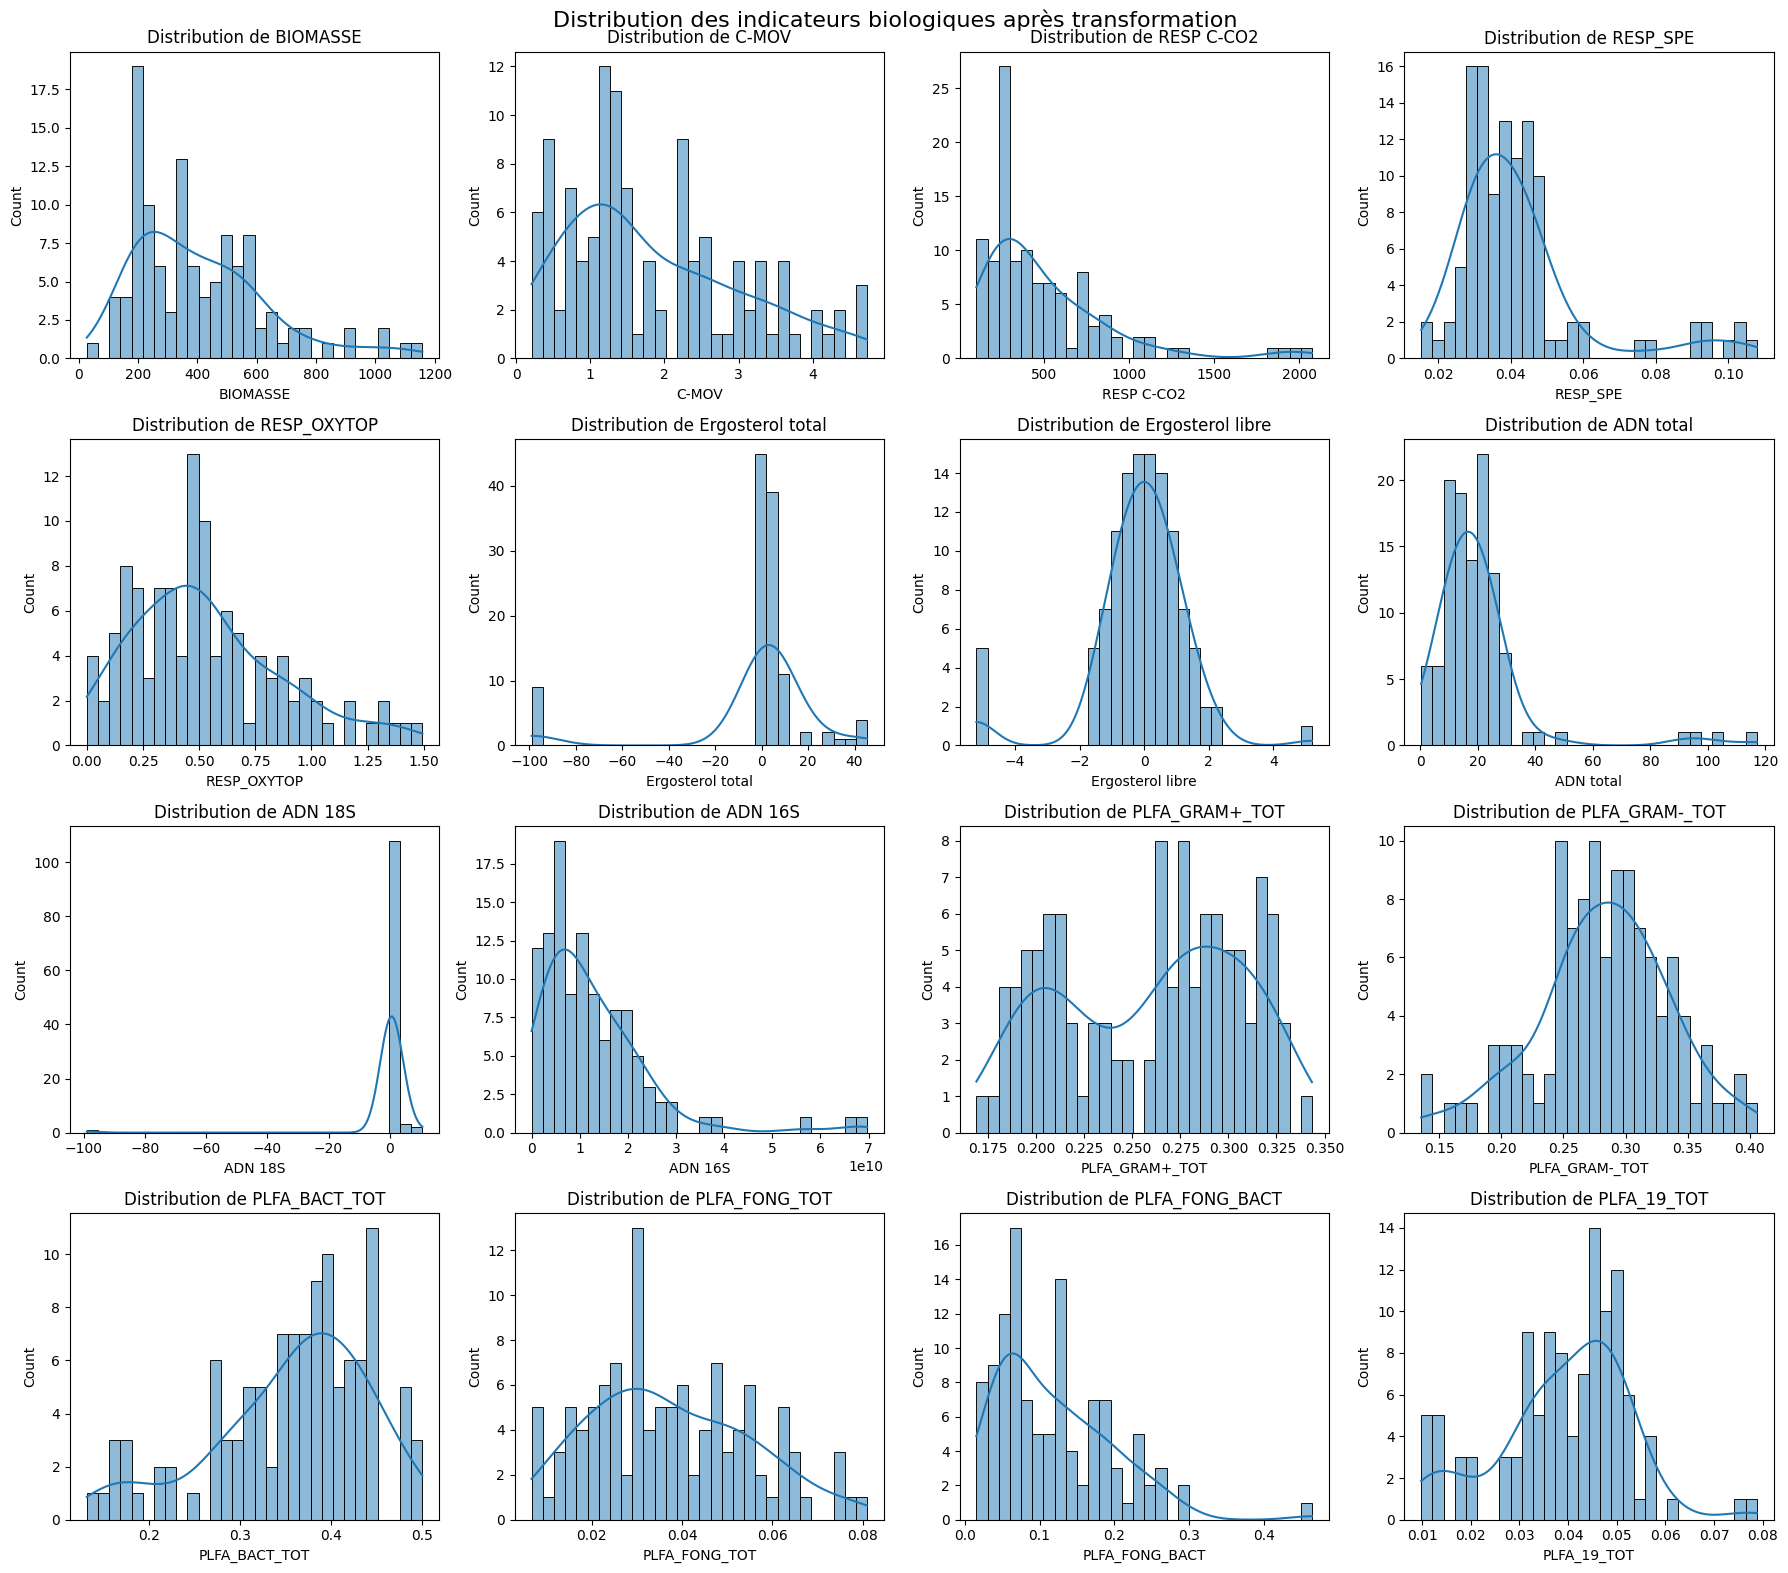

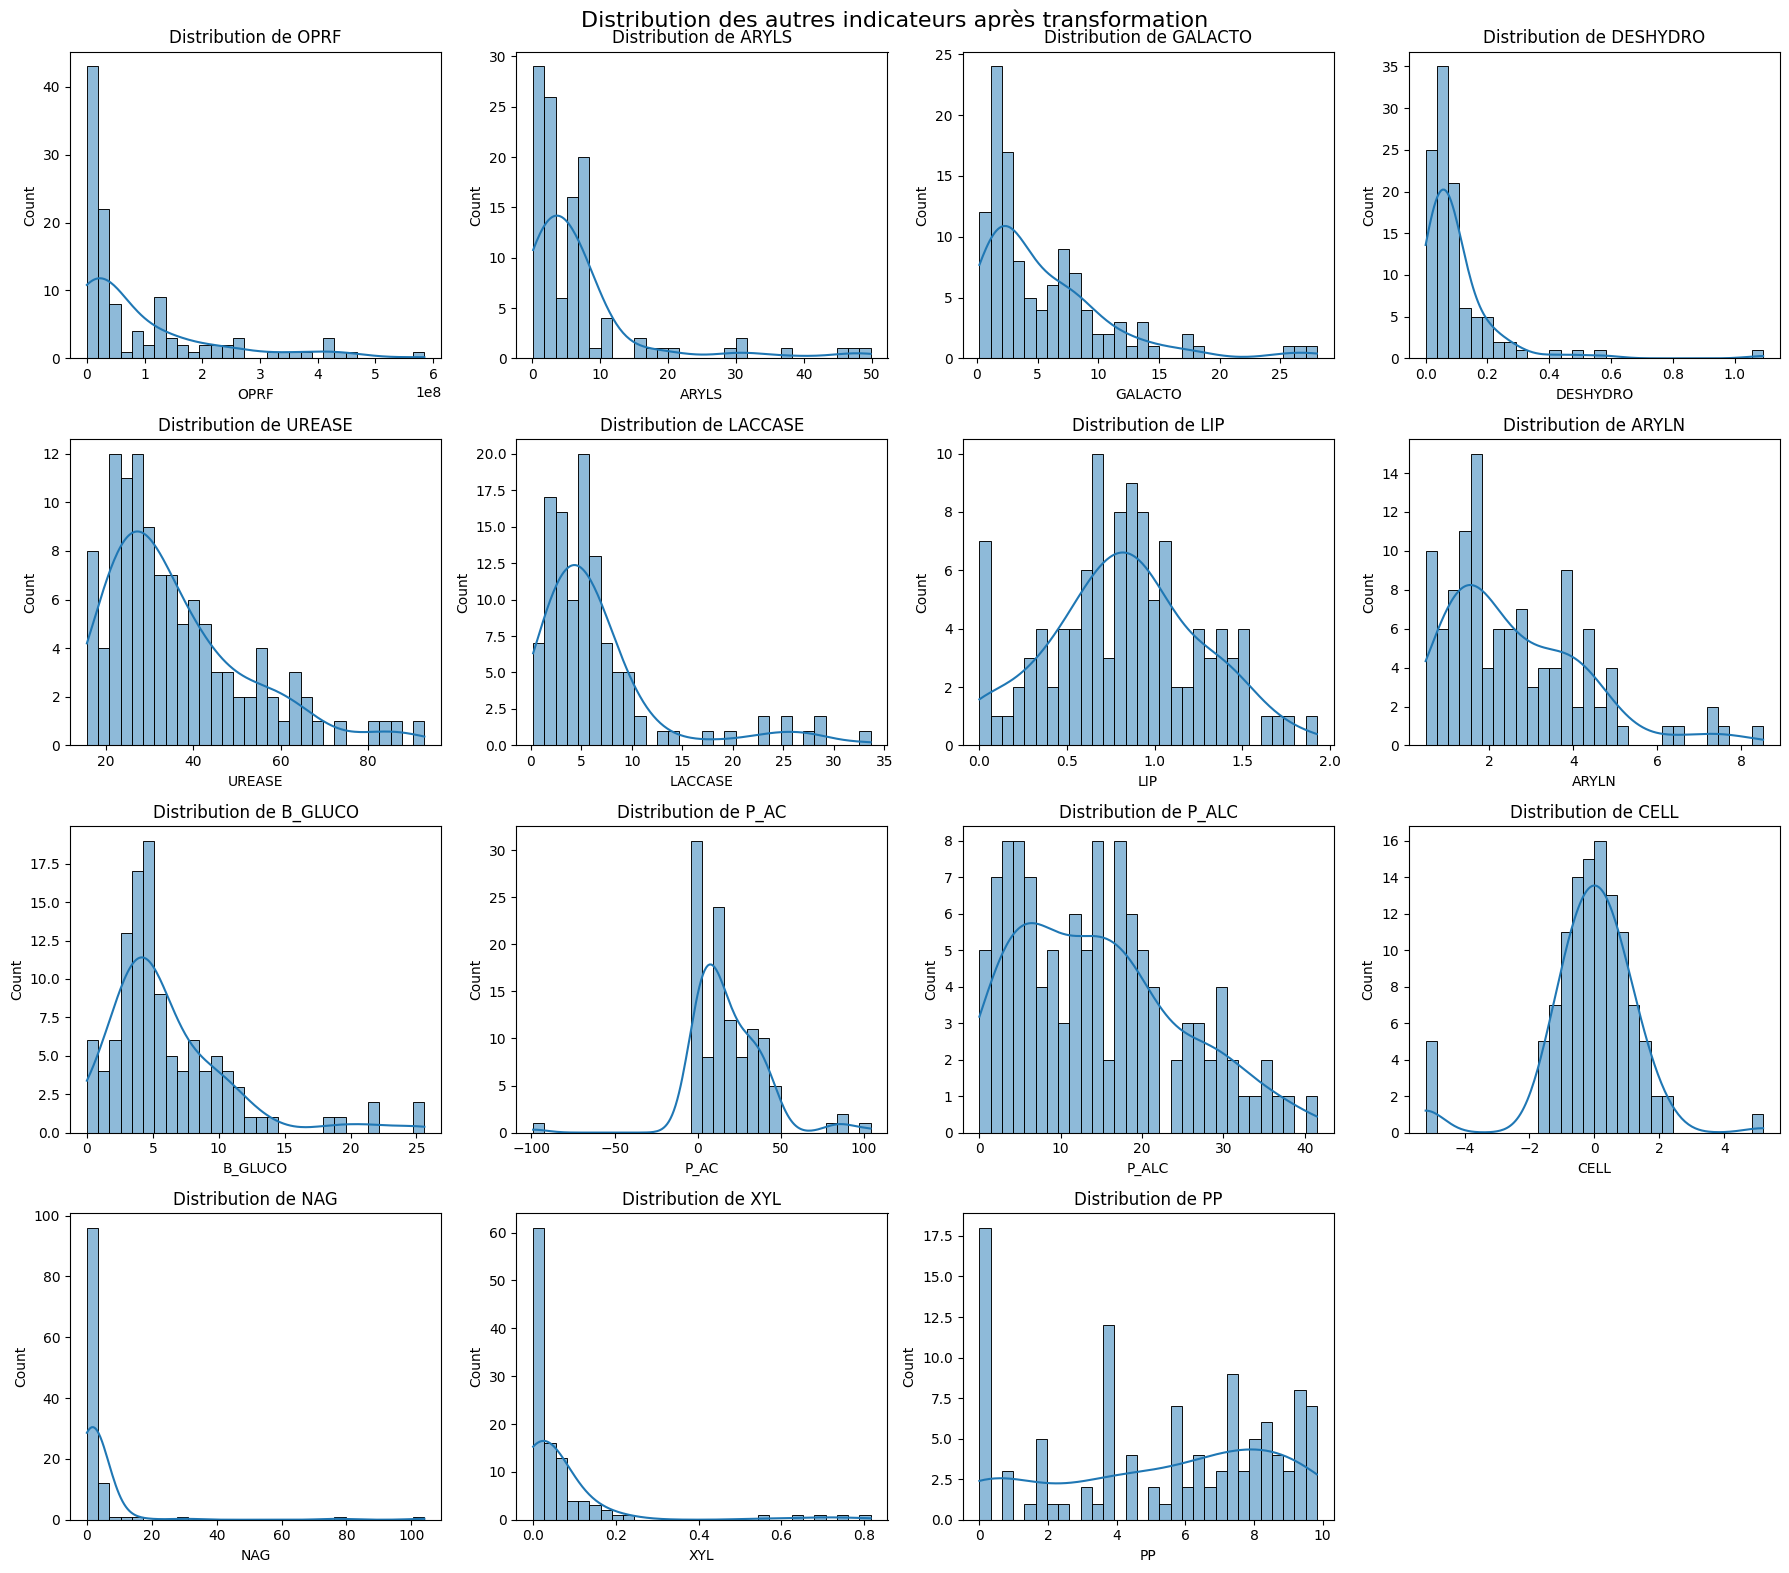

In [44]:
# Définition des groupes d'indicateurs
physico_chimiques = [
    "Humidité", "Argile.g.kg", "Limons.g.kg", "Sables.g.kg",
    "C org", "N tot", "C/N", "MO", "pH eau", "Cal total",
    "CEC", "P2O5", "N_MIN"
]

biologiques = [
    "BIOMASSE", "C-MOV", "RESP C-CO2", "RESP_SPE",
    "RESP_OXYTOP", "Ergosterol total", "Ergosterol libre",
    "ADN total", "ADN 18S", "ADN 16S", "PLFA_GRAM+_TOT",
    "PLFA_GRAM-_TOT", "PLFA_BACT_TOT", "PLFA_FONG_TOT",
    "PLFA_FONG_BACT", "PLFA_19_TOT"
]

autres = [
    "OPRF", "ARYLS", "GALACTO", "DESHYDRO", "UREASE",
    "LACCASE", "LIP", "ARYLN", "B_GLUCO", "P_AC",
    "P_ALC", "CELL", "NAG", "XYL", "FDA", "PP"
]

# Liste des variables à transformer avec la meilleure méthode identifiée
transformations = {
    "DESHYDRO": "log1p",
    "LIP": "log1p",
    "XYL": "log1p",
    "Ergosterol libre": "quantile",
    "PP": "yeojohnson",
    "Sables.g.kg": "quantile",
    "Limons.g.kg": "quantile",
    "CELL": "quantile"
}

# Appliquer les transformations optimales
df_transformed = df_merged.copy()
quantile_transformer = QuantileTransformer(output_distribution="normal")

for col, method in transformations.items():
    if method == "log1p":
        df_transformed[col] = np.log1p(df_transformed[col])
    elif method == "yeojohnson":
        df_transformed[col], _ = yeojohnson(df_transformed[col])
    elif method == "quantile":
        df_transformed[col] = quantile_transformer.fit_transform(df_transformed[[col]]).flatten()

# Fonction pour tracer les distributions finales après transformation
def plot_distributions(df, indicators, title):
    valid_indicators = [col for col in indicators if col in df.columns]

    if not valid_indicators:
        print(f"Aucun indicateur valide pour {title}.")
        return

    num_plots = len(valid_indicators)
    num_cols = 4  # Nombre de colonnes par défaut
    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
    fig.suptitle(title, fontsize=16)

    axes = axes.flatten() if num_plots > 1 else [axes]

    for ax, col in zip(axes, valid_indicators):
        sns.histplot(df[col], bins=30, kde=True, ax=ax)
        ax.set_title(f"Distribution de {col}")

    # Cacher les sous-graphiques inutilisés
    for i in range(len(valid_indicators), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Tracé des distributions finales après transformation
plot_distributions(df_transformed, physico_chimiques, "Distribution des indicateurs physico-chimiques après transformation")
plot_distributions(df_transformed, biologiques, "Distribution des indicateurs biologiques après transformation")
plot_distributions(df_transformed, autres, "Distribution des autres indicateurs après transformation")


c:\Users\ARMAND\Downloads\data_project\.venv\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (114). n_quantiles is set to n_samples.
  warnings.warn(


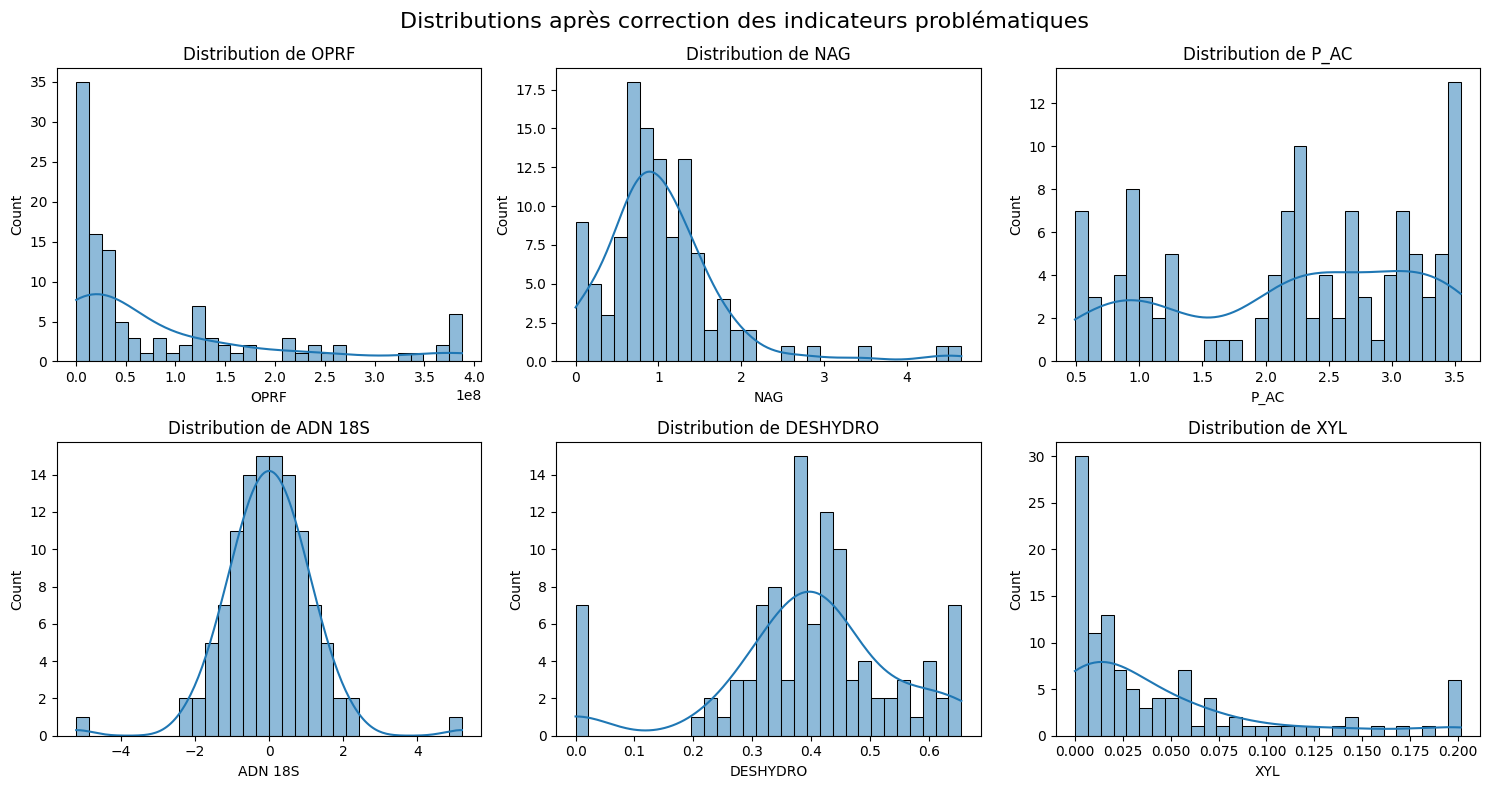

In [45]:
# Supposons que df_transformed soit le DataFrame contenant les indicateurs après transformations précédentes

# Liste des indicateurs problématiques
problematic_indicators = ["OPRF", "NAG", "P_AC", "ADN 18S", "DESHYDRO", "XYL"]

# Copie du DataFrame pour éviter de modifier les données originales
df_final = df_transformed.copy()

# Winsorizing (troncature des valeurs extrêmes)
def winsorize(series, lower=0.05, upper=0.95):
    low, high = np.percentile(series.dropna(), [lower * 100, upper * 100])
    return np.clip(series, low, high)

df_final["OPRF"] = winsorize(df_final["OPRF"])
df_final["P_AC"] = np.cbrt(winsorize(df_final["P_AC"]))  # Racine cubique

df_final["DESHYDRO"] = np.cbrt(winsorize(df_final["DESHYDRO"]))
df_final["XYL"] = np.log1p(winsorize(df_final["XYL"]))

df_final["NAG"] = np.log1p(df_final["NAG"])  # Log1p pour lisser les asymétries

# Transformation quantile pour ADN 18S
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
df_final["ADN 18S"] = quantile_transformer.fit_transform(df_final[["ADN 18S"]])

# Tracé des distributions mises à jour
def plot_updated_distributions(df, indicators, title):
    num_plots = len(indicators)
    num_cols = 3  # Colonnes par défaut
    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 4))
    fig.suptitle(title, fontsize=16)

    axes = axes.flatten()
    for ax, col in zip(axes, indicators):
        sns.histplot(df[col], bins=30, kde=True, ax=ax)
        ax.set_title(f"Distribution de {col}")

    for i in range(len(indicators), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Affichage des nouvelles distributions après correction
plot_updated_distributions(df_final, problematic_indicators, "Distributions après correction des indicateurs problématiques")


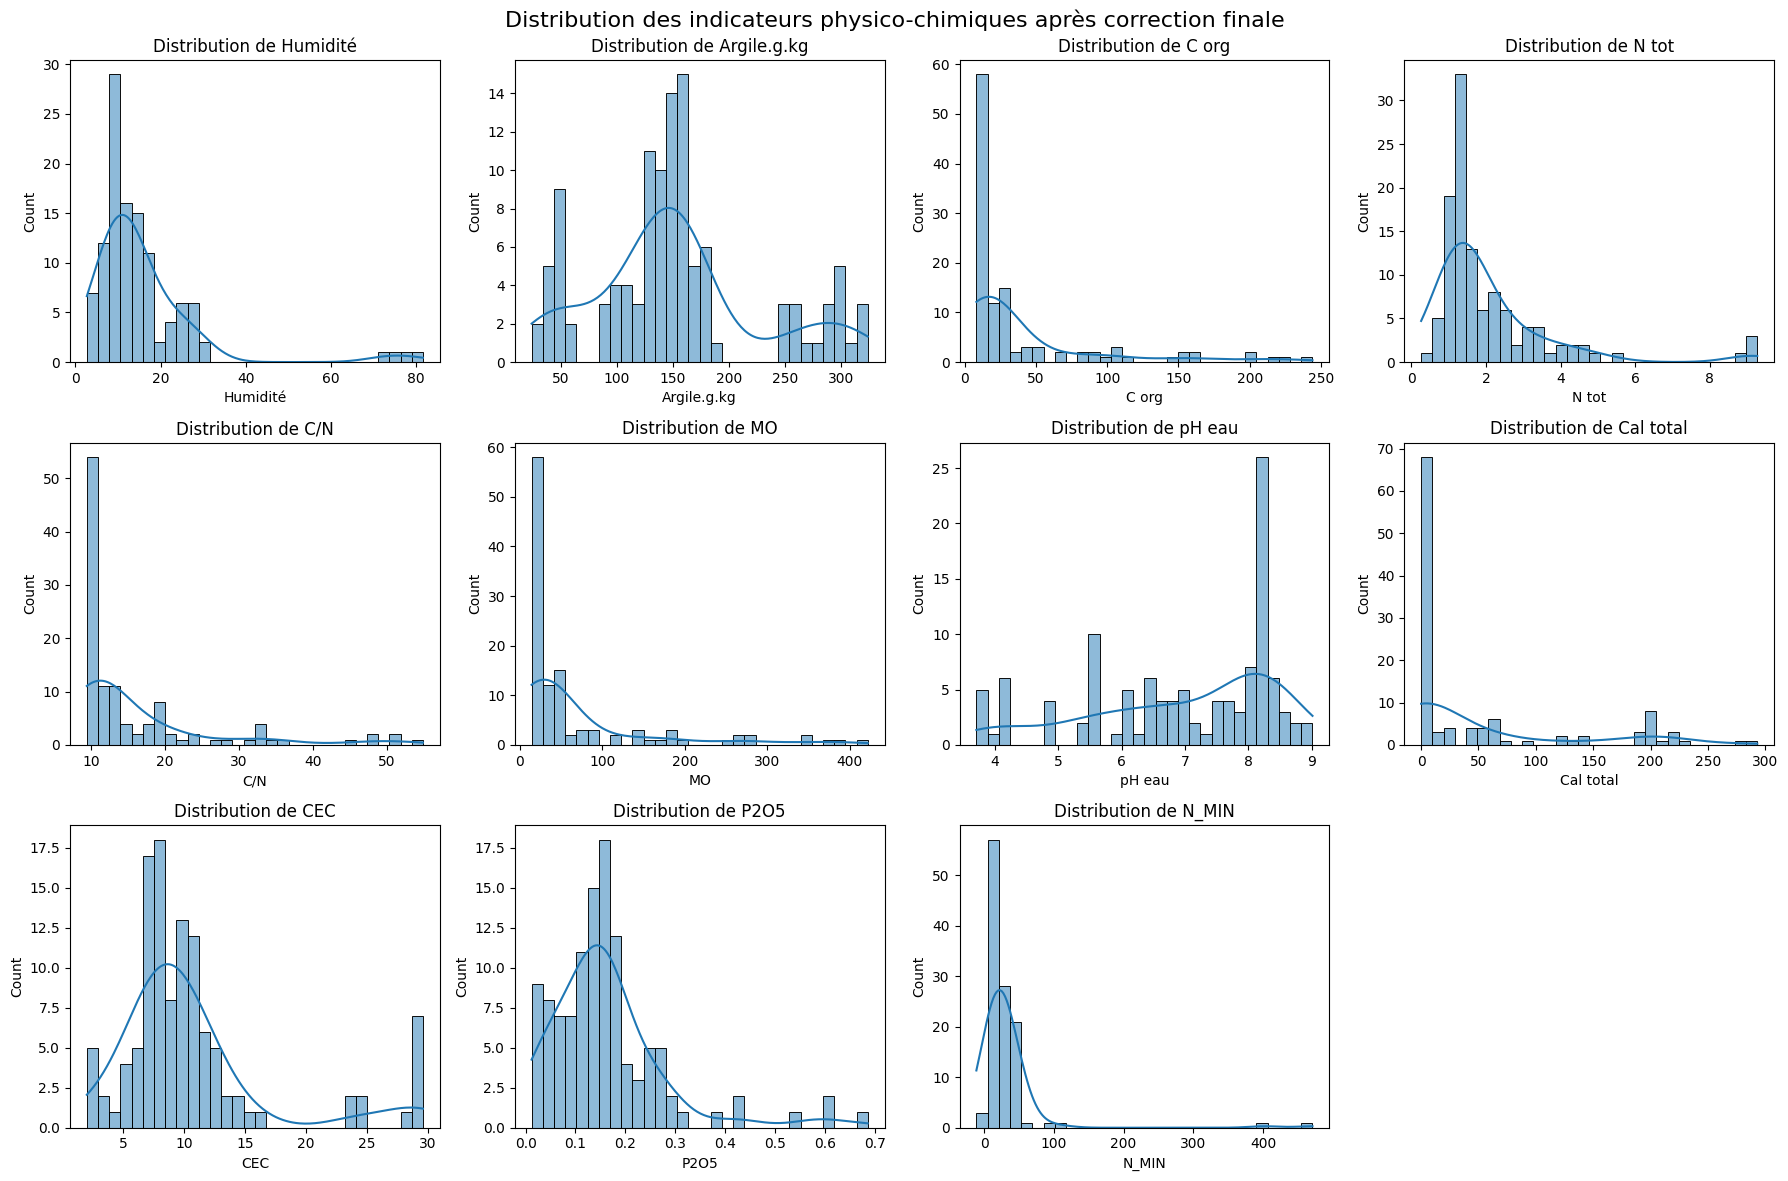

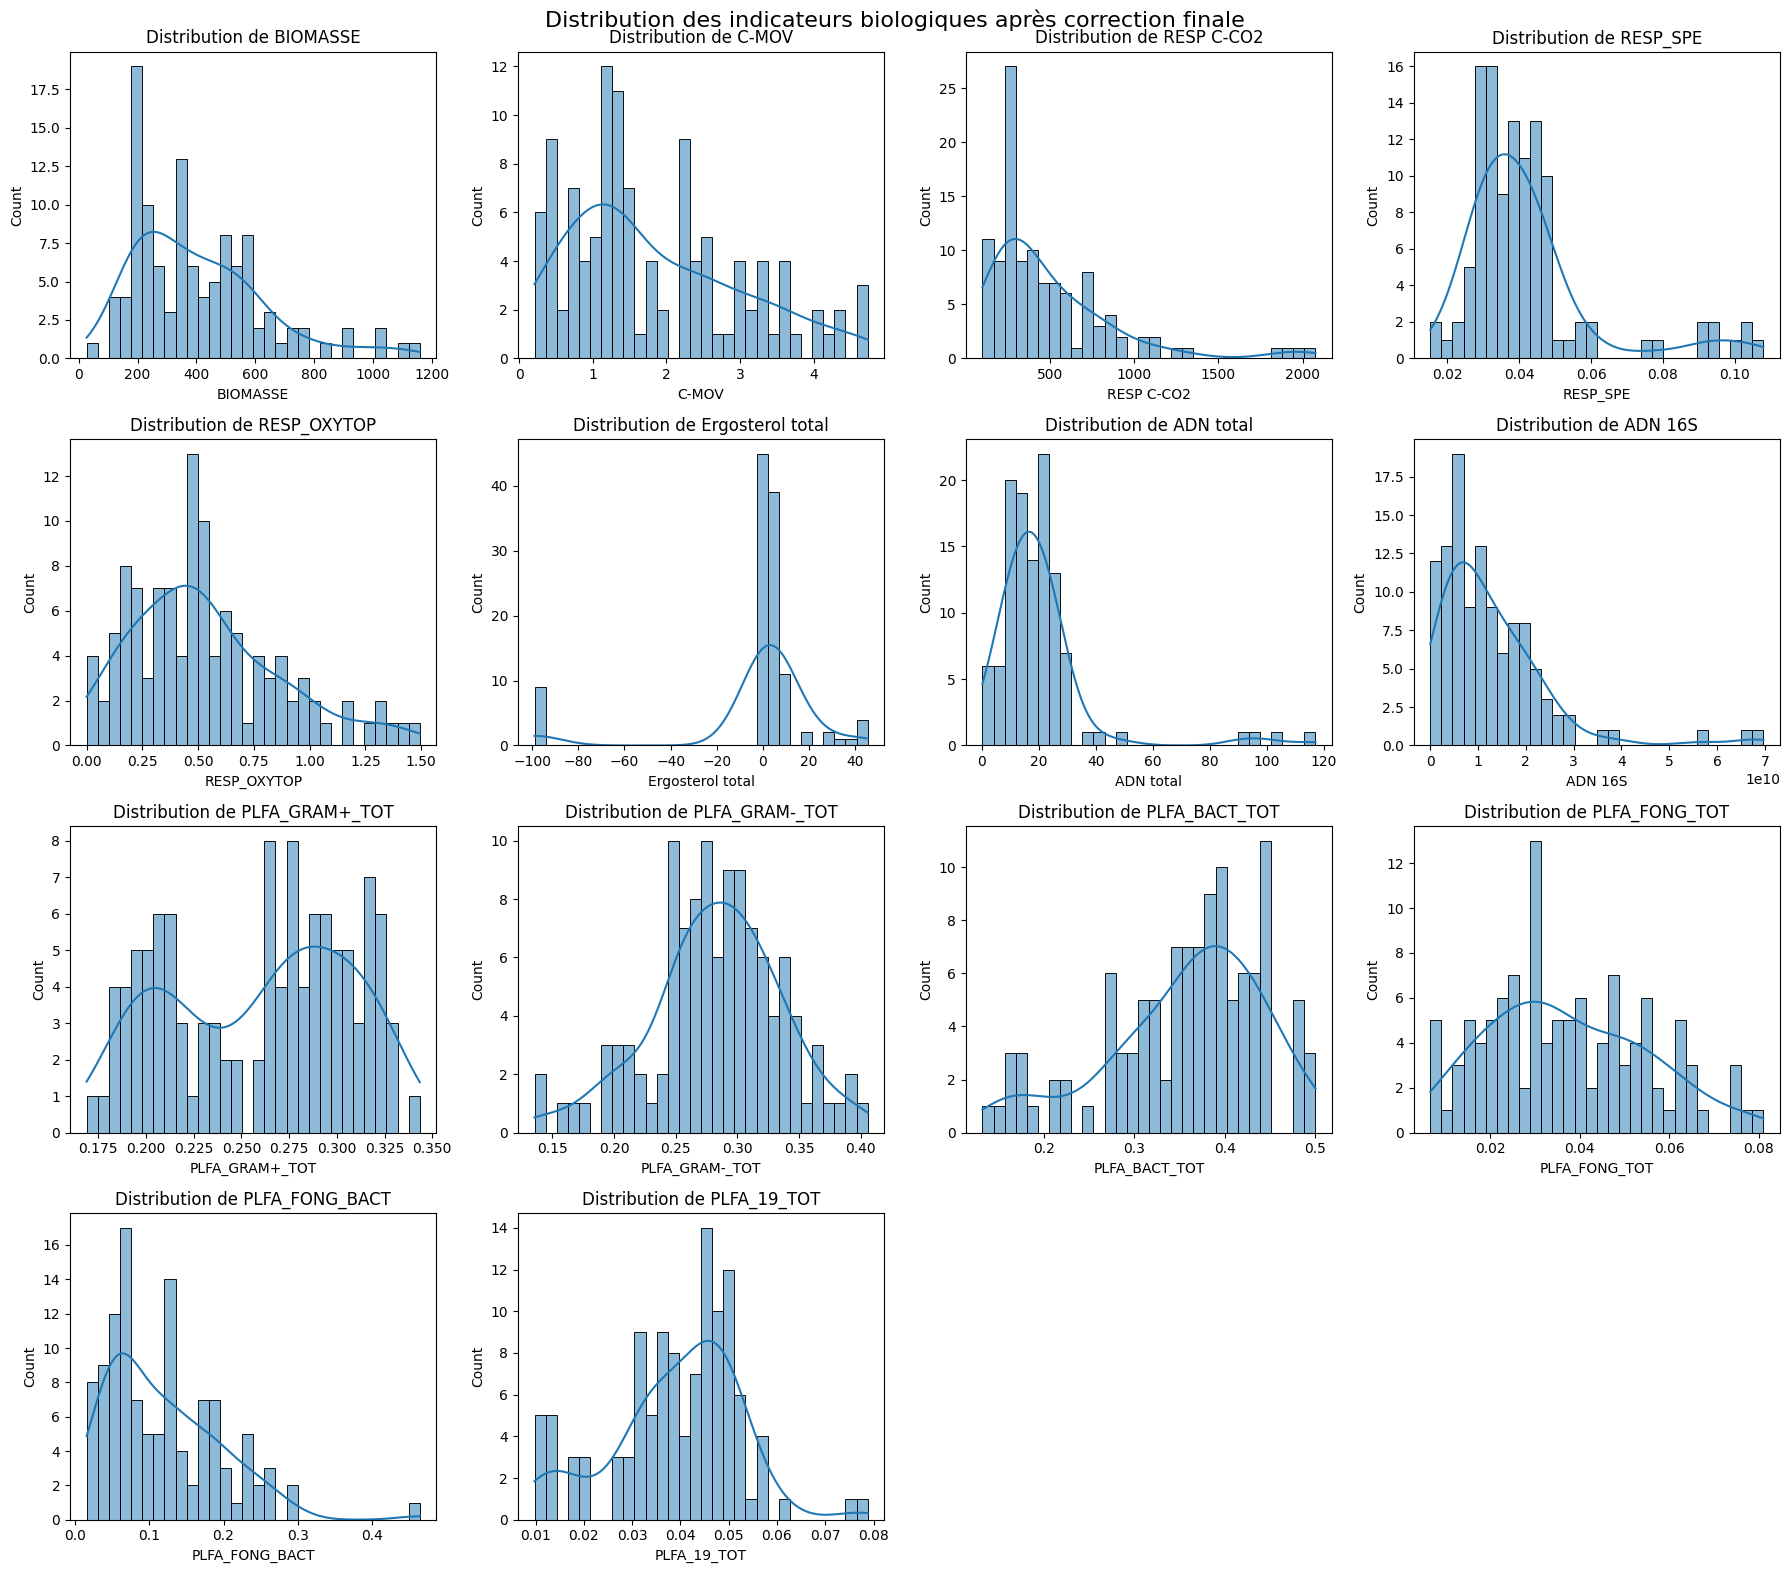

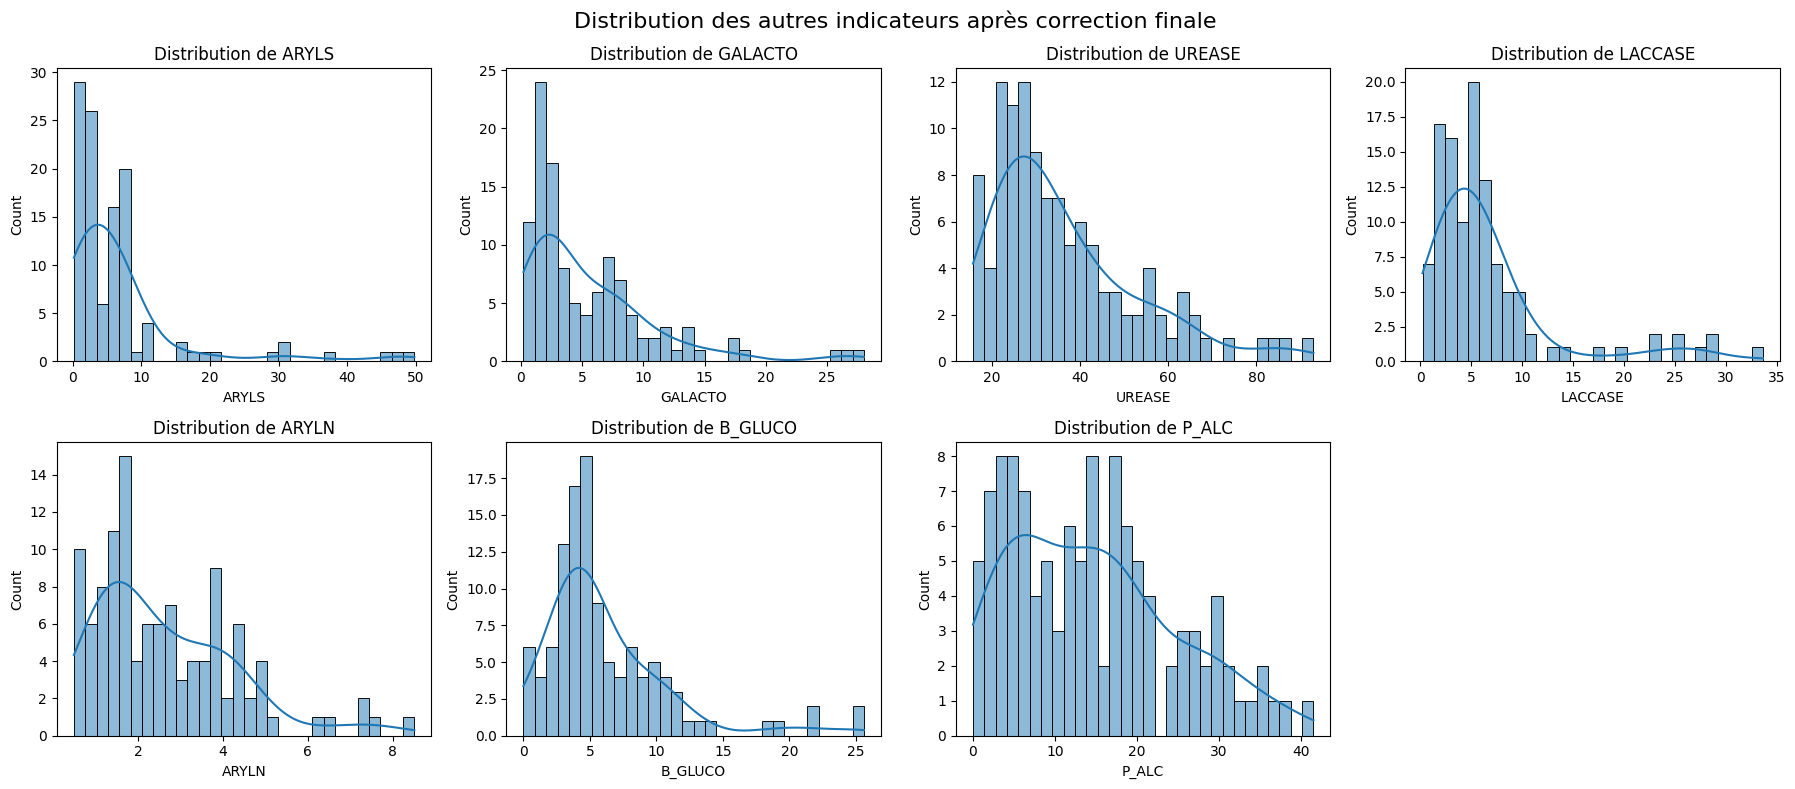

In [46]:
# Définition des groupes d'indicateurs
physico_chimiques = [
    "Humidité", "Argile.g.kg", "Limons.g.kg_quantile", "Sables.g.kg_quantile",
    "C org", "N tot", "C/N", "MO", "pH eau", "Cal total",
    "CEC", "P2O5", "N_MIN"
]

biologiques = [
    "BIOMASSE", "C-MOV", "RESP C-CO2", "RESP_SPE",
    "RESP_OXYTOP", "Ergosterol total", "Ergosterol libre_quantile",
    "ADN total", "ADN 18S_quantile", "ADN 16S", "PLFA_GRAM+_TOT",
    "PLFA_GRAM-_TOT", "PLFA_BACT_TOT", "PLFA_FONG_TOT",
    "PLFA_FONG_BACT", "PLFA_19_TOT"
]

autres = [
    "OPRF_log1p", "ARYLS", "GALACTO", "DESHYDRO_log1p", "UREASE",
    "LACCASE", "LIP_log1p", "ARYLN", "B_GLUCO", "P_AC_quantile",
    "P_ALC", "CELL_quantile", "NAG_log1p", "XYL_log1p", "PP_yeojohnson"
]

# Fonction pour tracer les distributions après corrections
def plot_distributions(df, indicators, title):
    valid_indicators = [col for col in indicators if col in df.columns]

    if not valid_indicators:
        print(f"Aucun indicateur valide pour {title}.")
        return

    num_plots = len(valid_indicators)
    num_cols = 4  # Nombre de colonnes par défaut
    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, num_rows * 4))
    fig.suptitle(title, fontsize=16)

    axes = axes.flatten() if num_plots > 1 else [axes]

    for ax, col in zip(axes, valid_indicators):
        sns.histplot(df[col], bins=30, kde=True, ax=ax)
        ax.set_title(f"Distribution de {col}")

    # Cacher les sous-graphiques inutilisés
    for i in range(len(valid_indicators), len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Tracé des distributions après toutes les corrections finales
plot_distributions(df_transformed, physico_chimiques, "Distribution des indicateurs physico-chimiques après correction finale")
plot_distributions(df_transformed, biologiques, "Distribution des indicateurs biologiques après correction finale")
plot_distributions(df_transformed, autres, "Distribution des autres indicateurs après correction finale")


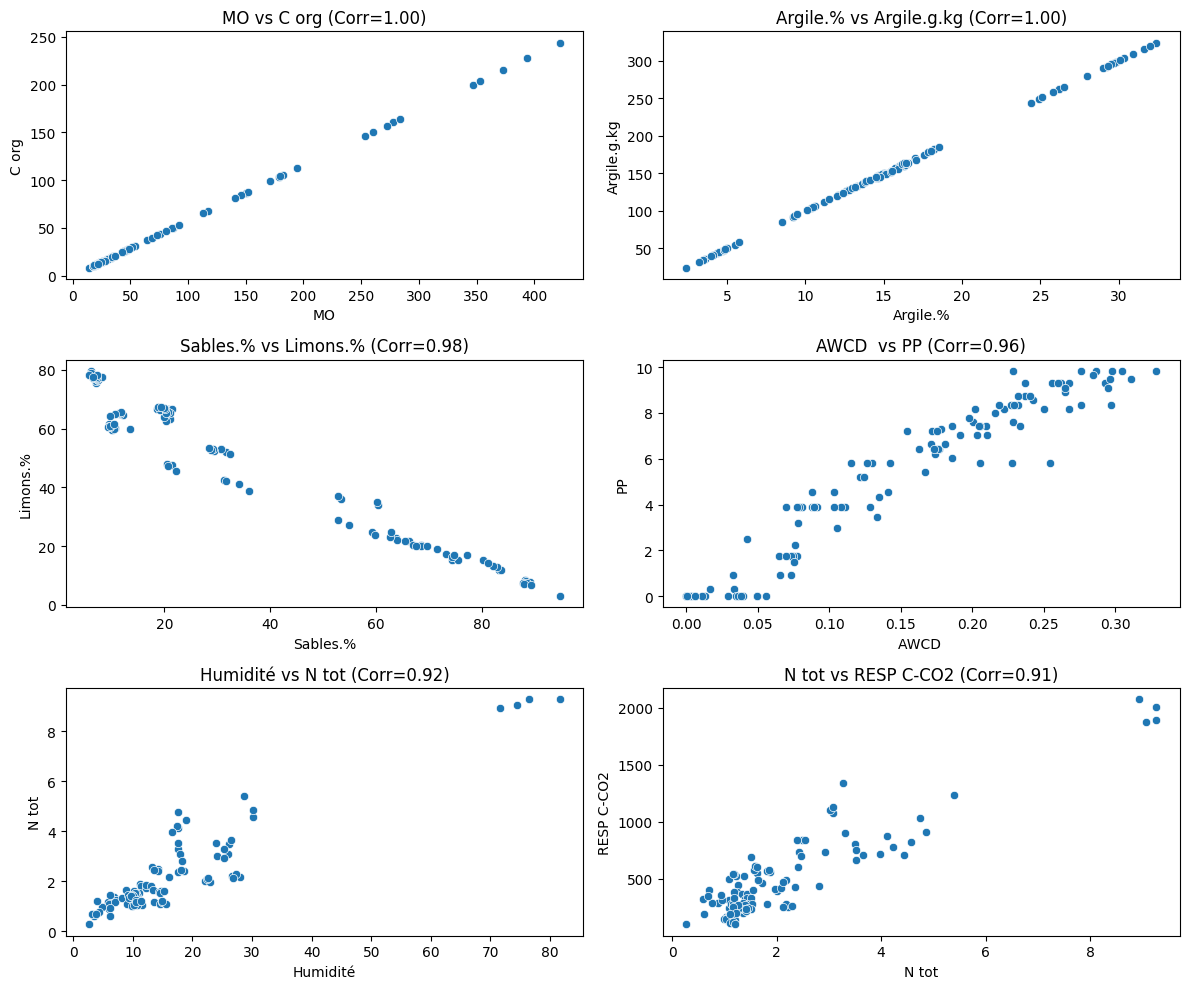

In [47]:
# Calcul des corrélations entre toutes les variables après transformation
# Exclure les colonnes non numériques
df_numeric = df_transformed.select_dtypes(include=['number'])
corr_matrix = df_numeric.corr()

# Sélection des 5 paires les plus corrélées
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates()
strong_corr = corr_pairs[(corr_pairs < 1) & (corr_pairs > 0.7)].reset_index()
strong_corr.columns = ["Variable 1", "Variable 2", "Corrélation"]
strong_corr = strong_corr.sort_values(by="Corrélation", ascending=False).head(6)

# Affichage des scatter plots pour les 6 paires les plus corrélées
plt.figure(figsize=(12, 10))

for i, (var1, var2, corr) in enumerate(strong_corr.values):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x=df_transformed[var1], y=df_transformed[var2])
    plt.title(f"{var1} vs {var2} (Corr={corr:.2f})")

plt.tight_layout()
plt.show()

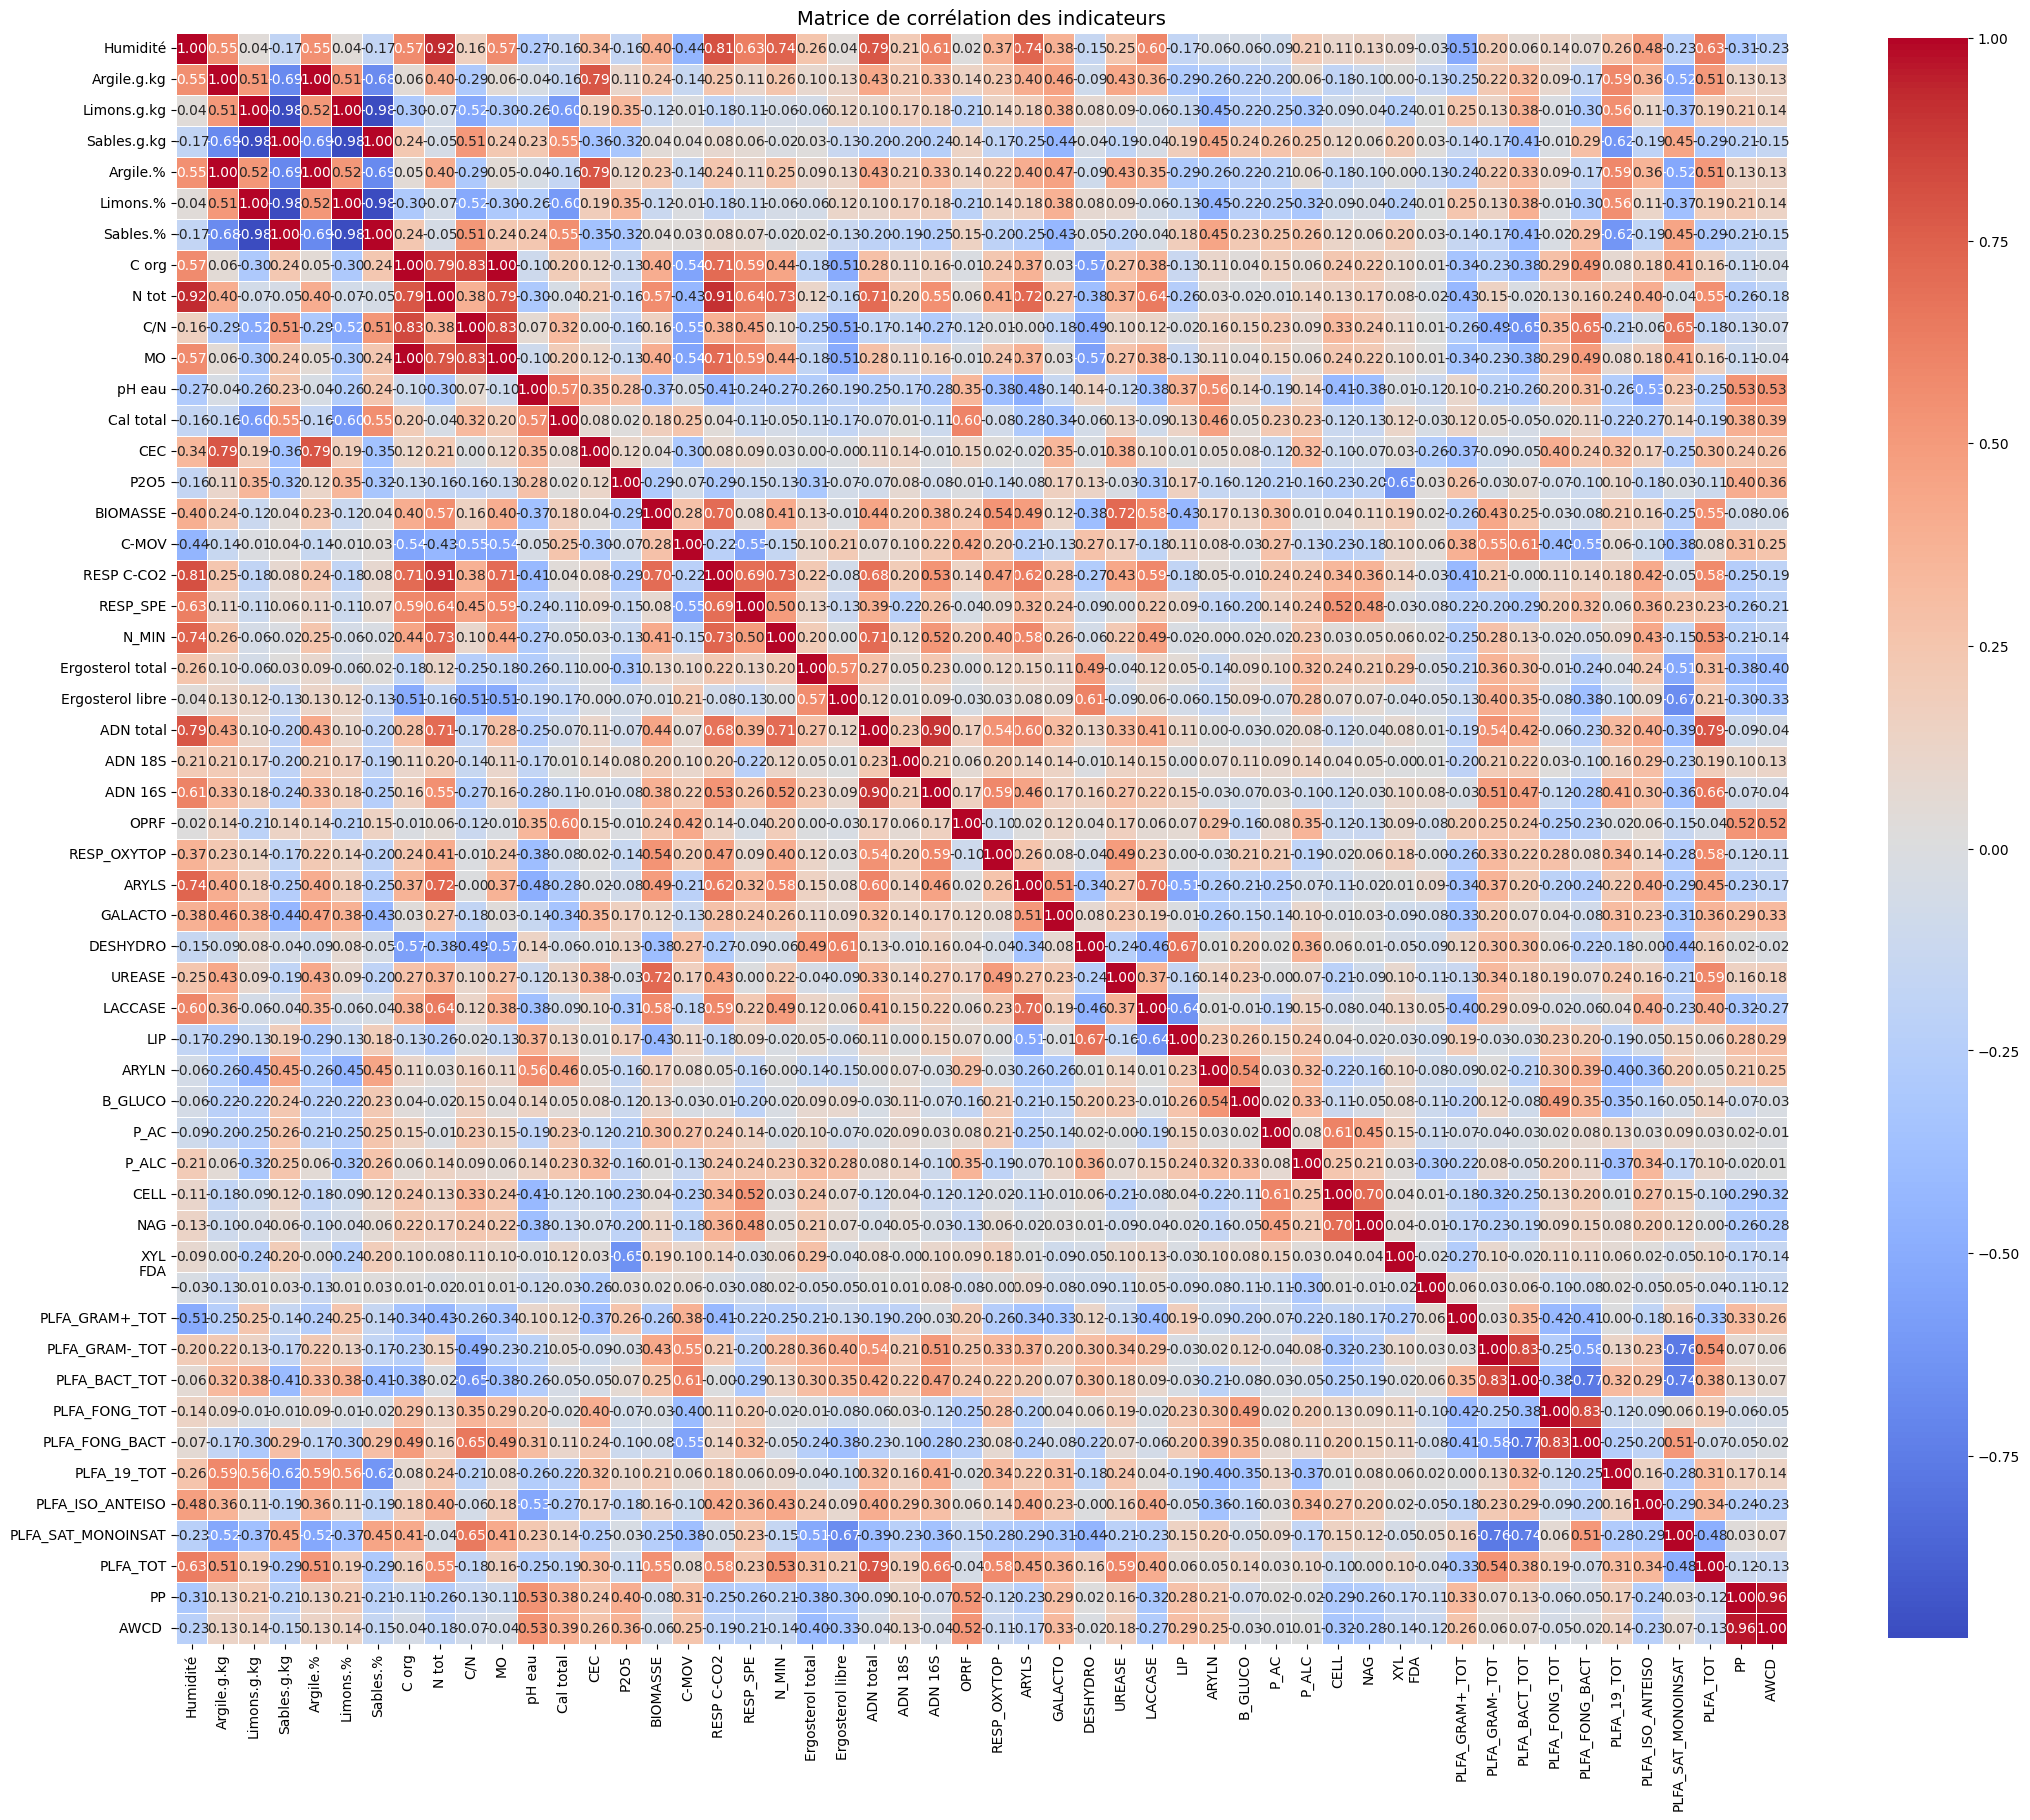

In [51]:
# Exclure les colonnes non numériques
df_numeric = df_merged.select_dtypes(include=['number'])

# Calcul de la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Définition de la taille de la figure en fonction du nombre d'indicateurs
num_vars = len(correlation_matrix.columns)
fig_size = max(10, num_vars // 2)  # Ajustement automatique

plt.figure(figsize=(fig_size, fig_size))
sns.heatmap(
    correlation_matrix,
    annot=True,  # Affiche les valeurs
    fmt=".2f",  # Deux décimales pour plus de lisibilité
    cmap="coolwarm",  # Palette de couleurs pour mieux distinguer les valeurs
    linewidths=0.5,  # Séparation des cases
    square=True,  # Carrés uniformes
    cbar_kws={"shrink": 0.8}  # Barre de couleur ajustée
)

plt.title("Matrice de corrélation des indicateurs", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()


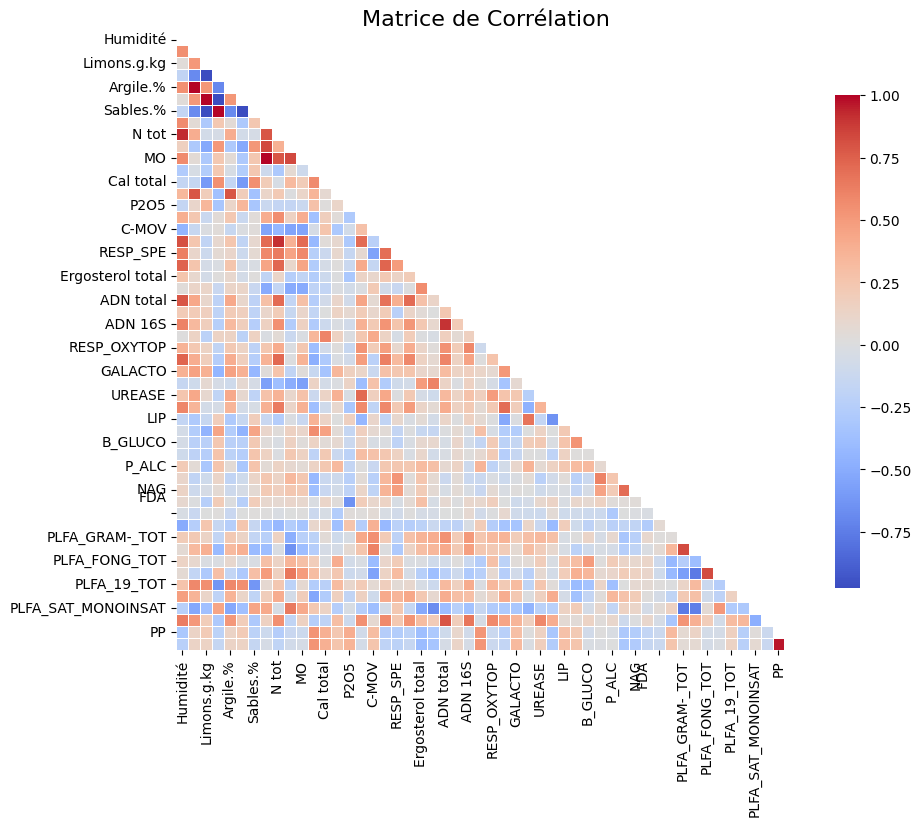

In [55]:
# Select only numeric columns from df_merged
numeric_df = df_merged.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Mask the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set the figure size
plt.figure(figsize=(10, 8))

# Create a heatmap with the correlation matrix
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm', cbar_kws={"shrink": .8}, linewidths=0.5)

# Add a title
plt.title('Matrice de Corrélation', fontsize=16)

# Show the figure
plt.show()

In [56]:
#  Affichage des valeurs manquantes si elles existent
if not missing_values.empty:
    print("Valeurs manquantes par colonne :")
    print(missing_values)
else:
    print("Aucun valeur manquante trouvé.")
    from IPython.display import display
    display(missing_values.to_frame(name="Nombre de valeurs manquantes"))

Valeurs manquantes par colonne :
RESP_OXYTOP    1
dtype: int64


In [57]:
df_merged.columns[59:]

Index(['4005,425536', '4006,38977', '4007,354003', '4008,318236', '4009,28247',
       '4010,246703', '4011,210936', '4012,175169', '4013,139403',
       '4014,103636',
       ...
       '9990,421501', '9991,385734', '9992,349967', '9993,3142', '9994,278434',
       '9995,242667', '9996,2069', '9997,171134', '9998,135367', '9999,0996'],
      dtype='object', length=6217)

In [58]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Columns: 6276 entries, Echantillon to 9999,0996
dtypes: float64(48), int64(4), object(6224)
memory usage: 5.5+ MB


# Preprocessing des parties spectrales

In [61]:
# Recharger le fichier CSV en forçant l'encodage
df_spectre = pd.read_csv("Spectre.csv", sep=";", encoding="ISO-8859-1")

# Correction des noms de colonnes (remplacer `,` par `.` dans les longueurs d’onde)
df_spectre.columns = df_spectre.columns.str.replace(',', '.', regex=True)

# Correction des valeurs (remplacement des `,` par `.` pour les valeurs numériques)
df_spectre = df_spectre.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)

# Conversion des colonnes spectres en `float64`
df_spectre.iloc[:, 1:] = df_spectre.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Vérifier les types après conversion
print(df_spectre.info())

# Vérifier si les valeurs sont bien chargées
print(df_spectre.describe())


C:\Users\ARMAND\AppData\Local\Temp\ipykernel_44484\2117198963.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_spectre = df_spectre.applymap(lambda x: str(x).replace(',', '.') if isinstance(x, str) else x)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174 entries, 0 to 173
Columns: 6224 entries, Echantillon to 9999.0996
dtypes: object(6224)
memory usage: 8.3+ MB
None
       Echantillon  3999.640137  4000.60437  4001.568603  4002.532837  \
count          174   174.000000  174.000000   174.000000   174.000000   
unique         174   173.000000  174.000000   174.000000   173.000000   
top       Yv-SIV-4     0.719677    0.646578     0.646578     0.744474   
freq             1     2.000000    1.000000     1.000000     2.000000   

        4003.49707  4004.461303  4005.425536  4006.38977  4007.354003  ...  \
count    174.00000   174.000000   174.000000  174.000000   174.000000  ...   
unique   174.00000   174.000000   174.000000  174.000000   174.000000  ...   
top        0.64633     0.646196     0.646062    0.645931     0.645804  ...   
freq       1.00000     1.000000     1.000000    1.000000     1.000000  ...   

        9990.421501  9991.385734  9992.349967   9993.3142  9994.278434  \
c

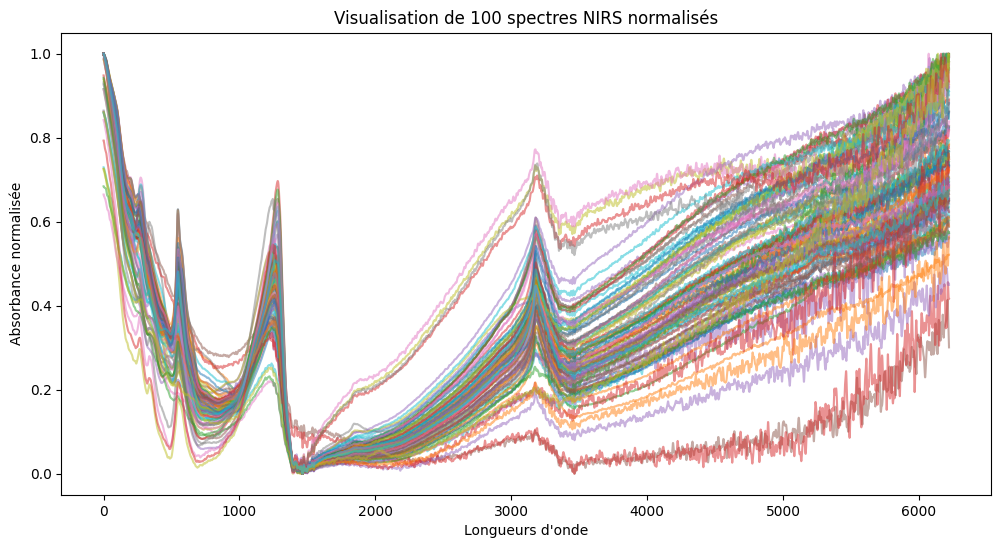

In [62]:
# Extraire les valeurs des spectres (sans la colonne "Echantillon")
X_spectre = df_spectre.iloc[:, 1:].values.astype(float)

# Normalisation Min-Max pour éviter des échelles incohérentes
X_normalized = (X_spectre - np.min(X_spectre, axis=1, keepdims=True)) / (np.max(X_spectre, axis=1, keepdims=True) - np.min(X_spectre, axis=1, keepdims=True) + 1e-8)

# Sélection aléatoire de 100 spectres pour affichage
nb_spectres_afficher = 100
indices_aleatoires = np.random.choice(X_spectre.shape[0], nb_spectres_afficher, replace=False)

plt.figure(figsize=(12, 6))
for i in indices_aleatoires:
    plt.plot(X_normalized[i], alpha=0.5)

plt.xlabel("Longueurs d'onde")
plt.ylabel("Absorbance normalisée")
plt.title(f"Visualisation de {nb_spectres_afficher} spectres NIRS normalisés")
plt.show()


# Prétraitement des spectres (réduction du bruit)
Nous allons appliquer plusieurs techniques : 1️⃣ Multiplicative Scatter Correction (MSC)
2️⃣ Savitzky-Golay (Dérivées 1ère et 2ème)
3️⃣ Standard Normal Variate (SNV)


In [84]:
from scipy.signal import savgol_filter

Dimensions des spectres initiaux : (174, 6223)
Dimensions des spectres MSC centrés : (174, 6223)
Dimensions des spectres SNV : (174, 6223)
Dimensions des spectres SG 1D normalisés : (174, 6223)
Dimensions des spectres SG 2D normalisés : (174, 6223)


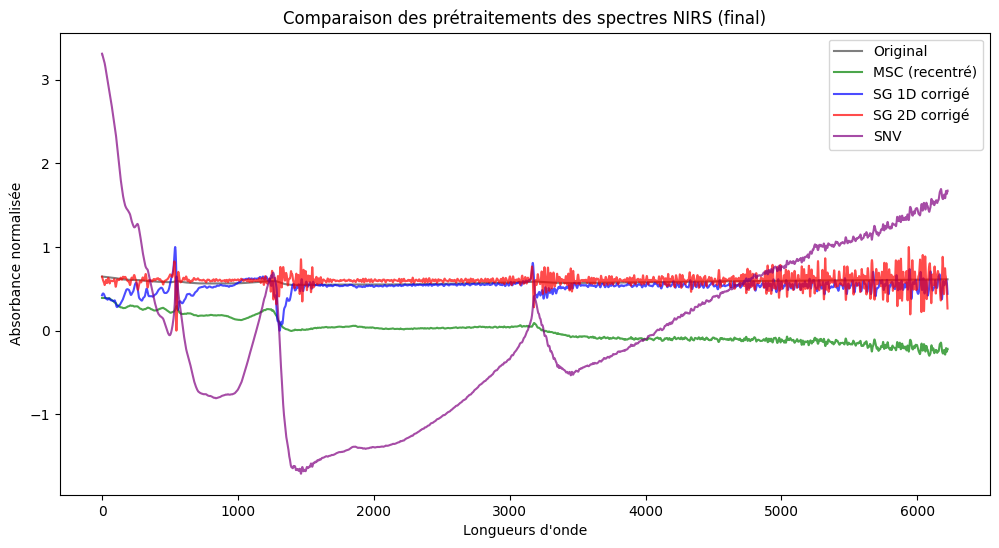

      0_msc     1_msc     2_msc     3_msc     4_msc     5_msc     6_msc  \
0  0.391196  0.390819  0.390819  0.390558  0.390361  0.390255  0.390258   
1 -0.947839 -0.946828 -0.946828 -0.945941 -0.944606 -0.942704 -0.940355   
2 -0.311638 -0.305268 -0.305268 -0.303520 -0.302663 -0.302292 -0.302192   
3 -0.836470 -0.832301 -0.832301 -0.830218 -0.828357 -0.826694 -0.825063   
4 -1.452079 -1.449249 -1.449249 -1.447214 -1.444827 -1.442158 -1.439236   

      7_msc     8_msc     9_msc  ...  6213_sg2d  6214_sg2d  6215_sg2d  \
0  0.390327  0.390372  0.390372  ...   0.588686   0.565106   0.538427   
1 -0.937607 -0.934834 -0.932251  ...   0.500163   0.481444   0.463988   
2 -0.302171 -0.302222 -0.302318  ...   0.669628   0.619758   0.563755   
3 -0.823176 -0.820834 -0.818011  ...   0.497972   0.466521   0.431701   
4 -1.436104 -1.432758 -1.429074  ...   0.631476   0.666253   0.701816   

   6216_sg2d  6217_sg2d  6218_sg2d  6219_sg2d  6220_sg2d  6221_sg2d  6222_sg2d  
0   0.508648   0.475770   0.4

In [85]:
### **Correction Multiplicative Scatter Correction (MSC)**
def msc(input_data):
    mean_spectrum = np.mean(input_data, axis=0)
    return np.array([(spectrum - mean_spectrum) / np.std(mean_spectrum) for spectrum in input_data])

### **Standard Normal Variate (SNV)**
def snv(input_data):
    return (input_data - np.mean(input_data, axis=1, keepdims=True)) / np.std(input_data, axis=1, keepdims=True)

### **Lissage Savitzky-Golay (optimisé)**
def apply_savgol_filter(input_data, window_length=31, polyorder=4):
    sg_1d = savgol_filter(input_data, window_length=window_length, polyorder=polyorder, deriv=1)  # Première dérivée
    sg_2d = savgol_filter(input_data, window_length=window_length, polyorder=polyorder, deriv=2)  # Deuxième dérivée
    return sg_1d, sg_2d

### **Normalisation Min-Max**
def min_max_scaling(data):
    return (data - np.min(data, axis=1, keepdims=True)) / (
            np.max(data, axis=1, keepdims=True) - np.min(data, axis=1, keepdims=True) + 1e-8)

### **Application des prétraitements**
X_msc = msc(X_spectre)  # Correction MSC
X_msc_centered = X_msc - np.mean(X_msc, axis=1, keepdims=True)  # Recentrage du MSC
X_snv = snv(X_spectre)  # SNV
X_sg_1d, X_sg_2d = apply_savgol_filter(X_spectre)  # Savitzky-Golay 1D et 2D
X_sg_1d_norm = min_max_scaling(X_sg_1d)  # Normalisation SG 1D
X_sg_2d_norm = min_max_scaling(X_sg_2d)  # Normalisation SG 2D

# Vérifier les dimensions des données prétraitées
print(f"Dimensions des spectres initiaux : {X_spectre.shape}")
print(f"Dimensions des spectres MSC centrés : {X_msc_centered.shape}")
print(f"Dimensions des spectres SNV : {X_snv.shape}")
print(f"Dimensions des spectres SG 1D normalisés : {X_sg_1d_norm.shape}")
print(f"Dimensions des spectres SG 2D normalisés : {X_sg_2d_norm.shape}")

# Ajuster les colonnes si nécessaire
if X_msc_centered.shape[1] != len(spectre_columns):
    spectre_columns_msc = [f"{col}_msc" for col in range(X_msc_centered.shape[1])]
else:
    spectre_columns_msc = [f"{col}_msc" for col in spectre_columns]

if X_snv.shape[1] != len(spectre_columns):
    spectre_columns_snv = [f"{col}_snv" for col in range(X_snv.shape[1])]
else:
    spectre_columns_snv = [f"{col}_snv" for col in spectre_columns]

if X_sg_1d_norm.shape[1] != len(spectre_columns):
    spectre_columns_sg1d = [f"{col}_sg1d" for col in range(X_sg_1d_norm.shape[1])]
else:
    spectre_columns_sg1d = [f"{col}_sg1d" for col in spectre_columns]

if X_sg_2d_norm.shape[1] != len(spectre_columns):
    spectre_columns_sg2d = [f"{col}_sg2d" for col in range(X_sg_2d_norm.shape[1])]
else:
    spectre_columns_sg2d = [f"{col}_sg2d" for col in spectre_columns]

# Créer des DataFrames pour chaque transformation
df_msc_centered = pd.DataFrame(X_msc_centered, columns=spectre_columns_msc)
df_snv = pd.DataFrame(X_snv, columns=spectre_columns_snv)
df_sg_1d_norm = pd.DataFrame(X_sg_1d_norm, columns=spectre_columns_sg1d)
df_sg_2d_norm = pd.DataFrame(X_sg_2d_norm, columns=spectre_columns_sg2d)

# Concaténer les DataFrames
df_preprocessed = pd.concat([df_msc_centered, df_snv, df_sg_1d_norm, df_sg_2d_norm], axis=1)

### **Visualisation des corrections appliquées**
plt.figure(figsize=(12, 6))
plt.plot(X_spectre[0], label="Original", color="black", alpha=0.5)
plt.plot(X_msc_centered[0], label="MSC (recentré)", color="green", alpha=0.7)
plt.plot(X_sg_1d_norm[0], label="SG 1D corrigé", color="blue", alpha=0.7)
plt.plot(X_sg_2d_norm[0], label="SG 2D corrigé", color="red", alpha=0.7)
plt.plot(X_snv[0], label="SNV", color="purple", alpha=0.7)
plt.legend()
plt.title("Comparaison des prétraitements des spectres NIRS (final)")
plt.xlabel("Longueurs d'onde")
plt.ylabel("Absorbance normalisée")
plt.show()

# Afficher le DataFrame prétraité
print(df_preprocessed.head())


application de la dérivée de Savitzky-Golay sur le résultat de la correction MSC

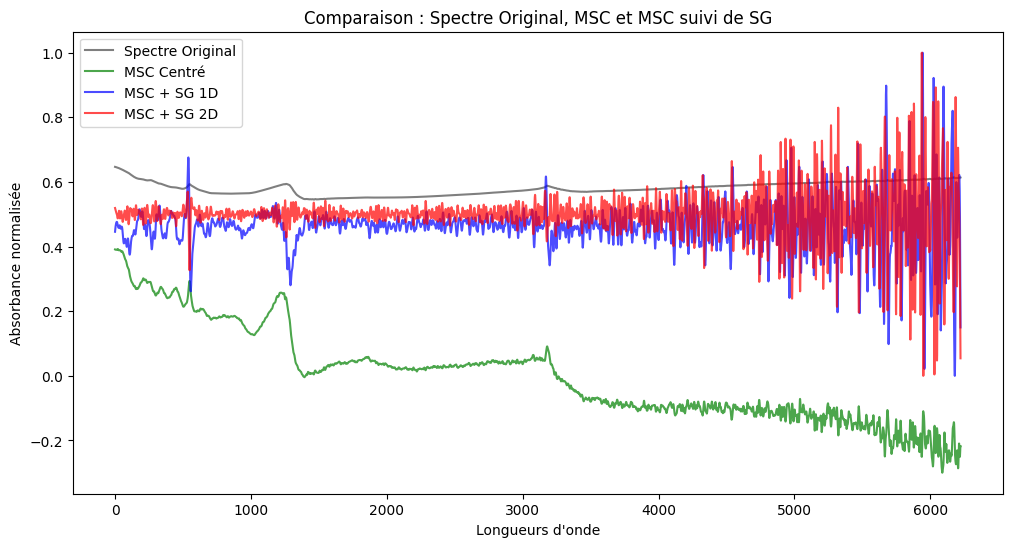

In [86]:
# Appliquer la correction MSC et recentrer les spectres
X_msc = msc(X_spectre)
X_msc_centered = X_msc - np.mean(X_msc, axis=1, keepdims=True)

# Appliquer la dérivée Savitzky-Golay sur le résultat du MSC recentré
X_msc_sg_1d, X_msc_sg_2d = apply_savgol_filter(X_msc_centered)
X_msc_sg_1d_norm = min_max_scaling(X_msc_sg_1d)
X_msc_sg_2d_norm = min_max_scaling(X_msc_sg_2d)

# Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.plot(X_spectre[0], label="Spectre Original", color="black", alpha=0.5)
plt.plot(X_msc_centered[0], label="MSC Centré", color="green", alpha=0.7)
plt.plot(X_msc_sg_1d_norm[0], label="MSC + SG 1D", color="blue", alpha=0.7)
plt.plot(X_msc_sg_2d_norm[0], label="MSC + SG 2D", color="red", alpha=0.7)
plt.legend()
plt.title("Comparaison : Spectre Original, MSC et MSC suivi de SG")
plt.xlabel("Longueurs d'onde")
plt.ylabel("Absorbance normalisée")
plt.show()


application de la dérivée de Savitzky-Golay sur le résultat de la correction SNV

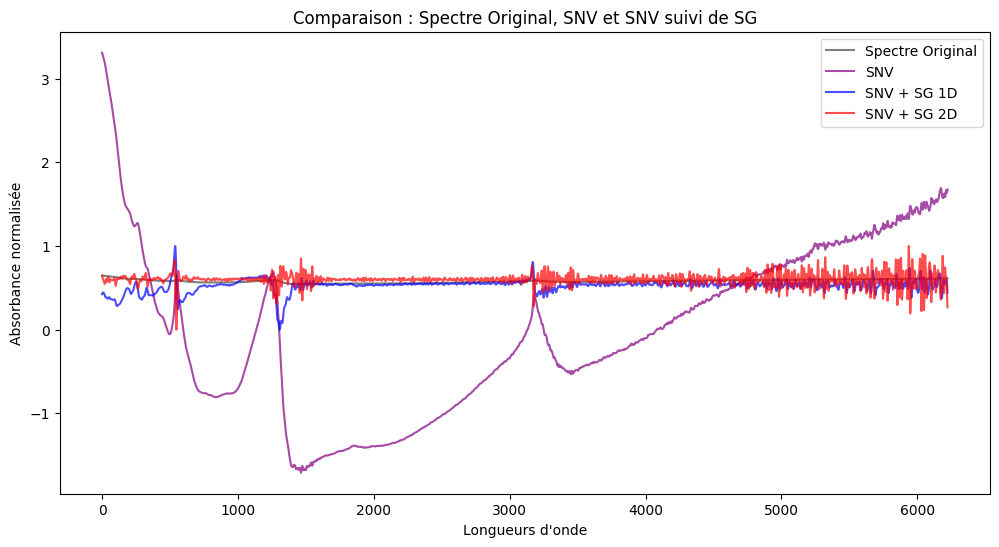

In [89]:
# Appliquer la correction SNV
X_snv = snv(X_spectre)

# Appliquer la dérivée Savitzky-Golay sur le résultat du SNV
X_snv_sg_1d, X_snv_sg_2d = apply_savgol_filter(X_snv)
X_snv_sg_1d_norm = min_max_scaling(X_snv_sg_1d)
X_snv_sg_2d_norm = min_max_scaling(X_snv_sg_2d)

# Visualisation des résultats pour SNV + SG
plt.figure(figsize=(12, 6))
plt.plot(X_spectre[0], label="Spectre Original", color="black", alpha=0.5)
plt.plot(X_snv[0], label="SNV", color="purple", alpha=0.7)
plt.plot(X_snv_sg_1d_norm[0], label="SNV + SG 1D", color="blue", alpha=0.7)
plt.plot(X_snv_sg_2d_norm[0], label="SNV + SG 2D", color="red", alpha=0.7)
plt.legend()
plt.title("Comparaison : Spectre Original, SNV et SNV suivi de SG")
plt.xlabel("Longueurs d'onde")
plt.ylabel("Absorbance normalisée")
plt.show()


In [87]:
#  Affichage des noms de colonnes pour vérifier l'orthographe
print(df_indicateurs.columns.tolist())


['Echantillon', 'Humidité', 'Argile.g.kg', 'Limons.g.kg', 'Sables.g.kg', 'Argile.%', 'Limons.%', 'Sables.%', 'C org', 'N tot', 'C/N', 'MO', 'pH eau', 'Cal total', 'CEC', 'P2O5', 'BIOMASSE', 'C-MOV', 'RESP C-CO2', 'RESP_SPE', 'N_MIN', 'Ergosterol total', 'Ergosterol libre', 'ADN total', 'ADN 18S', 'ADN 16S', 'OPRF', 'RESP_OXYTOP', 'ARYLS', 'GALACTO', 'DESHYDRO', 'UREASE', 'LACCASE', 'LIP', 'ARYLN', 'B_GLUCO', 'P_AC', 'P_ALC', 'CELL', 'NAG', 'XYL', 'FDA\n\n', 'PLFA_GRAM+_TOT', 'PLFA_GRAM-_TOT', 'PLFA_BACT_TOT', 'PLFA_FONG_TOT', 'PLFA_FONG_BACT', 'PLFA_19_TOT', 'PLFA_ISO_ANTEISO', 'PLFA_SAT_MONOINSAT', 'PLFA_TOT', 'PP', 'AWCD ']


In [110]:
# Vérifier si les noms de colonnes ont bien des nombres avec des virgules ou points
df_preprocessed.columns = df_preprocessed.columns.str.replace(",", ".").str.strip()

# Sélection des colonnes spectrales après correction
spectre_columns_preprocessed = [col for col in df_preprocessed.columns if any(suffix in col for suffix in ['_msc', '_snv', '_sg1d', '_sg2d'])]

print(f"Nombre de colonnes spectrales détectées après correction : {len(spectre_columns_preprocessed)}")
print("Exemples de colonnes spectrales détectées après correction :")
print(spectre_columns_preprocessed[:10])


Nombre de colonnes spectrales détectées après correction : 24892
Exemples de colonnes spectrales détectées après correction :
['0_msc', '1_msc', '2_msc', '3_msc', '4_msc', '5_msc', '6_msc', '7_msc', '8_msc', '9_msc']


In [111]:

# Ajuster les colonnes si nécessaire
if X_msc_centered.shape[1] != len(spectre_columns):
    spectre_columns_msc_sg1d = [f"{col}_msc_sg1d" for col in range(X_msc_centered.shape[1])]
    spectre_columns_msc_sg2d = [f"{col}_msc_sg2d" for col in range(X_msc_centered.shape[1])]
else:
    spectre_columns_msc_sg1d = [f"{col}_msc_sg1d" for col in spectre_columns]
    spectre_columns_msc_sg2d = [f"{col}_msc_sg2d" for col in spectre_columns]

if X_snv.shape[1] != len(spectre_columns):
    spectre_columns_snv_sg1d = [f"{col}_snv_sg1d" for col in range(X_snv.shape[1])]
    spectre_columns_snv_sg2d = [f"{col}_snv_sg2d" for col in range(X_snv.shape[1])]
else:
    spectre_columns_snv_sg1d = [f"{col}_snv_sg1d" for col in spectre_columns]
    spectre_columns_snv_sg2d = [f"{col}_snv_sg2d" for col in spectre_columns]

# Créer des DataFrames pour chaque transformation
df_msc_sg1d = pd.DataFrame(X_msc_sg_1d_norm, columns=spectre_columns_msc_sg1d)
df_msc_sg2d = pd.DataFrame(X_msc_sg_2d_norm, columns=spectre_columns_msc_sg2d)

# On peut concaténer les deux dérivées pour MSC
df_msc_sg = pd.concat([df_msc_sg1d, df_msc_sg2d], axis=1)

# Pour SNV + SG, on procède de la même façon
df_snv_sg1d = pd.DataFrame(X_snv_sg_1d_norm, columns=spectre_columns_snv_sg1d)
df_snv_sg2d = pd.DataFrame(X_snv_sg_2d_norm, columns=spectre_columns_snv_sg2d)

df_snv_sg = pd.concat([df_snv_sg1d, df_snv_sg2d], axis=1)

# --- Nettoyage et vérification des noms de colonnes ---
df_msc_sg.columns = df_msc_sg.columns.str.replace(",", ".").str.strip()
df_snv_sg.columns = df_snv_sg.columns.str.replace(",", ".").str.strip()

# Récupérer les colonnes spectrales pour chaque DataFrame
spectre_columns_msc_sg = [col for col in df_msc_sg.columns if "msc" in col and "sg" in col]
spectre_columns_snv_sg = [col for col in df_snv_sg.columns if "snv" in col and "sg" in col]

print(f"Nombre de colonnes spectrales MSC+SG : {len(spectre_columns_msc_sg)}")
print("Exemples de colonnes MSC+SG :", spectre_columns_msc_sg[:10])

print(f"Nombre de colonnes spectrales SNV+SG : {len(spectre_columns_snv_sg)}")
print("Exemples de colonnes SNV+SG :", spectre_columns_snv_sg[:10])

Nombre de colonnes spectrales MSC+SG : 12446
Exemples de colonnes MSC+SG : ['0_msc_sg1d', '1_msc_sg1d', '2_msc_sg1d', '3_msc_sg1d', '4_msc_sg1d', '5_msc_sg1d', '6_msc_sg1d', '7_msc_sg1d', '8_msc_sg1d', '9_msc_sg1d']
Nombre de colonnes spectrales SNV+SG : 12446
Exemples de colonnes SNV+SG : ['0_snv_sg1d', '1_snv_sg1d', '2_snv_sg1d', '3_snv_sg1d', '4_snv_sg1d', '5_snv_sg1d', '6_snv_sg1d', '7_snv_sg1d', '8_snv_sg1d', '9_snv_sg1d']


In [93]:
#  Liste des indicateurs à analyser
indicateurs = [
    "Humidité", "Argile.g.kg", "Limons.g.kg", "Sables.g.kg",
    "C org", "N tot", "C/N", "MO", "pH eau", "Cal total",
    "CEC", "P2O5", "BIOMASSE", "C-MOV", "RESP C-CO2", "RESP_SPE",
    "N_MIN", "Ergosterol total", "Ergosterol libre", "ADN total",
    "ADN 18S", "ADN 16S", "OPRF", "RESP_OXYTOP", "ARYLS", "GALACTO",
    "DESHYDRO", "UREASE", "LACCASE", "LIP", "ARYLN", "B_GLUCO",
    "P_AC", "P_ALC", "CELL", "NAG", "XYL", "FDA", "PLFA_GRAM+_TOT",
    "PLFA_GRAM-_TOT", "PLFA_BACT_TOT", "PLFA_FONG_TOT",
    "PLFA_FONG_BACT", "PLFA_19_TOT", "PLFA_ISO_ANTEISO",
    "PLFA_SAT_MONOINSAT", "PLFA_TOT", "PP", "AWCD"
]


In [94]:
# Stocker les longueurs d'onde les plus corrélées pour chaque indicateur
top_wavelengths_dict = {}

for ind in indicateurs:
    try:
        # Vérifier si l'indicateur est présent
        if ind not in df_merged.columns:
            print(f"{ind} absent de df_merged, ignoré.")
            continue

        # Vérifier si l'indicateur contient des NaN
        if df_merged[ind].isna().sum() > 0:
            print(f"{ind} contient des NaN, correction en cours...")
            df_merged[ind].fillna(df_merged[ind].median(), inplace=True)  # Remplace NaN par médiane

        # Vérifier si l'indicateur contient une seule valeur unique
        if df_merged[ind].nunique() == 1:
            print(f"{ind} a une seule valeur unique, impossible d'entraîner un modèle.")
            continue

        # Calcul des corrélations
        correlations = df_preprocessed[spectre_columns_preprocessed].corrwith(df_merged[ind], method="pearson")
        top_wavelengths_dict[ind] = correlations.abs().nlargest(50).index.tolist()

        # Affichage des 50 meilleures longueurs d’onde pour chaque indicateur
        print(f"{ind}: {top_wavelengths_dict[ind][:5]} ... (50 au total)")

    except Exception as e:
        print(f"ERREUR sur {ind} : {e}")

Humidité: ['4343_msc', '4344_msc', '4319_msc', '4342_msc', '4320_msc'] ... (50 au total)
Argile.g.kg: ['1310_msc', '1311_msc', '1309_msc', '1312_msc', '1308_msc'] ... (50 au total)
Limons.g.kg: ['548_sg1d', '549_sg1d', '547_sg1d', '3182_sg1d', '3183_sg1d'] ... (50 au total)
Sables.g.kg: ['3182_sg1d', '3183_sg1d', '492_sg1d', '491_sg1d', '493_sg1d'] ... (50 au total)
C org: ['1271_msc', '1270_msc', '1272_msc', '1269_msc', '1268_msc'] ... (50 au total)
N tot: ['5721_sg2d', '5991_sg2d', '5720_sg2d', '5722_sg2d', '5992_sg2d'] ... (50 au total)
C/N: ['1268_msc', '1269_msc', '1267_msc', '1270_msc', '1266_msc'] ... (50 au total)
MO: ['1271_msc', '1270_msc', '1272_msc', '1269_msc', '1268_msc'] ... (50 au total)
pH eau: ['5720_sg2d', '5377_sg2d', '5719_sg2d', '6029_sg2d', '6030_sg2d'] ... (50 au total)
Cal total: ['5632_sg2d', '5633_sg2d', '5487_sg2d', '5486_sg2d', '5631_sg2d'] ... (50 au total)
CEC: ['1323_msc', '1322_msc', '1324_msc', '1321_msc', '1325_msc'] ... (50 au total)
P2O5: ['406_msc'

In [99]:
# Filtrer les colonnes numériques dans df_indicateurs
df_indicateurs_numeric = df_indicateurs.select_dtypes(include=[np.number])

# Jointure des DataFrames de spectres avec les indicateurs numériques
df_msc_corr = df_msc_sg.join(df_indicateurs_numeric)
df_snv_corr = df_snv_sg.join(df_indicateurs_numeric)

# Calcul des matrices de corrélation
corr_msc = df_msc_corr.corr()
corr_snv = df_snv_corr.corr()

# Extraction des corrélations entre les indicateurs et les colonnes spectrales
indicator_cols_numeric = list(df_indicateurs_numeric.columns)
corr_msc_indic = corr_msc.loc[indicator_cols_numeric, spectre_columns_msc_sg]
corr_snv_indic = corr_snv.loc[indicator_cols_numeric, spectre_columns_snv_sg]

print("Corrélations entre indicateurs et colonnes spectrales (MSC+SG) :")
print(corr_msc_indic)

print("Corrélations entre indicateurs et colonnes spectrales (SNV+SG) :")
print(corr_snv_indic)

Corrélations entre indicateurs et colonnes spectrales (MSC+SG) :
                    0_msc_sg1d  1_msc_sg1d  2_msc_sg1d  3_msc_sg1d  \
Humidité              0.012725    0.009095    0.005744    0.002797   
Argile.g.kg           0.059108    0.059721    0.059308    0.058084   
Limons.g.kg           0.104710    0.098903    0.092588    0.086337   
Sables.g.kg          -0.105484   -0.100614   -0.095047   -0.089330   
Argile.%              0.059604    0.060162    0.059691    0.058406   
Limons.%              0.104710    0.098903    0.092588    0.086337   
Sables.%             -0.112004   -0.107184   -0.101608   -0.095846   
C org                -0.050403   -0.041931   -0.033713   -0.026193   
N tot                -0.027295   -0.025953   -0.024337   -0.022615   
C/N                  -0.099162   -0.091167   -0.082891   -0.074942   
MO                   -0.050470   -0.042004   -0.033791   -0.026276   
pH eau                0.005137    0.013481    0.020821    0.026949   
Cal total             0.0

# PARTIE DE CLUSTERING


In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# -----------------------------------------------------------------------------
# 1. Chargement du fichier avec détection automatique de l'encodage
# -----------------------------------------------------------------------------
file_path = "/content/drive/MyDrive/dataset/Caracteristiques_Echantillons_Projet.Bioindicateur.2.csv"

with open(file_path, "rb") as file:
    detected = chardet.detect(file.read())
file_encoding = detected['encoding']

df = pd.read_csv(file_path, delimiter=";", decimal=",", encoding=file_encoding)



NameError: name 'chardet' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Liste des colonnes catégorielles à encoder
cat_features = ["Mode d'usage sol", "Sous classe mode d'usage sol", "Contexte", "Texture (profil)"]

# On part d'une copie du DataFrame original pour ne pas l'altérer directement
df_transformed = df.copy()

# Appliquer le LabelEncoder sur chaque colonne de la liste
for col in cat_features:
    if col in df_transformed.columns:
        # On transforme les valeurs en chaînes (au cas où)
        df_transformed[col] = df_transformed[col].astype(str)
        # Encodage
        le = LabelEncoder()
        df_transformed[col] = le.fit_transform(df_transformed[col])
    else:
        print(f"La colonne {col} n'existe pas dans le DataFrame.")

print(f"Lignes initiales : {df.shape[0]}, Lignes après transformation : {df_transformed.shape[0]}")
print("\nAperçu des colonnes transformées :")
print(df_transformed[cat_features].head())


In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# --------------------------------------------------------------------------
# Suite du traitement : standardisation, ACP et clustering
# --------------------------------------------------------------------------

# Standardisation des variables encodées
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[cat_features])

# Application de l'ACP pour réduire la dimension à 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Création d'un DataFrame pour l'ACP
pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
pca_df["ID"] = df_transformed.index.astype(str)

# Application de KMeans pour le clustering (ici 4 clusters par exemple)
kmeans = KMeans(n_clusters=4, random_state=42)
pca_df["Cluster"] = kmeans.fit_predict(X_pca)

# Affichage de la variance expliquée par chaque composante
variance = pca.explained_variance_ratio_
print(f"Variance expliquée : PC1 = {variance[0]*100:.2f}%, PC2 = {variance[1]*100:.2f}%")

# Visualisation de l'ACP et du clustering
plt.figure(figsize=(10, 7))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=100)
for i, row in pca_df.iterrows():
    plt.text(row["PC1"], row["PC2"], row["ID"], fontsize=8, alpha=0.75)
plt.xlabel(f"PC1 ({variance[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({variance[1]*100:.2f}% variance)")
plt.title("ACP et Clustering sur variables catégorielles encodées")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


In [ ]:
from matplotlib.patches import Ellipse
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# ---------------------------------------------------------------------
# 1. Fonction utilitaire pour tracer une ellipse de confiance
# ---------------------------------------------------------------------
def plot_confidence_ellipse(x, y, ax, n_std=2.0,
                            edgecolor='black', facecolor='none', alpha=1.0):
    """
    Trace une ellipse de confiance à ± n_std écarts-types pour les données x, y sur l'axe ax.
    """
    if len(x) != len(y):
        raise ValueError("x et y doivent avoir la même taille.")

    cov = np.cov(x, y)  # matrice de covariance
    vals, vecs = np.linalg.eigh(cov)  # valeurs/vecteurs propres
    # On trie par ordre décroissant
    order = vals.argsort()[::-1]
    vals, vecs = vals[order], vecs[:, order]

    # Angle de rotation de l'ellipse en degrés
    theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))

    # Largeur et hauteur = 2 * n_std * sqrt(valeur_propre)
    width, height = 2 * n_std * np.sqrt(vals)

    # Centre de l'ellipse = moyenne de x et y
    mean_x, mean_y = np.mean(x), np.mean(y)

    # Création de l'ellipse
    ellip = Ellipse((mean_x, mean_y), width, height, angle=theta,
                    edgecolor=edgecolor, facecolor=facecolor, alpha=alpha, lw=1)
    ax.add_patch(ellip)


# ---------------------------------------------------------------------
# 2. Fonction pour tracer UN biplot ACP + ellipses
#    pour UNE variable catégorielle (cat_col)
# ---------------------------------------------------------------------
def plot_biplot_ellipse(df, X_pca, pca, numeric_cols, cat_col, var_explained, scale=2.0):
    """
    df            : DataFrame original (qui contient la colonne cat_col).
    X_pca         : array de shape (n_samples, 2) -> coordonnées PCA (Dim1, Dim2).
    pca           : objet PCA de scikit-learn (pour récupérer pca.components_).
    numeric_cols  : liste des variables numériques utilisées pour l'ACP.
    cat_col       : nom de la colonne catégorielle pour colorer les points.
    var_explained : variance expliquée [dim1, dim2].
    scale         : facteur d'échelle pour la longueur des flèches.
    """
    fig, ax = plt.subplots(figsize=(10, 7))

    # Nuage de points coloré par la variable cat_col
    sns.scatterplot(
        x=X_pca[:, 0], y=X_pca[:, 1],
        hue=df[cat_col].astype(str),  # cast en str pour éviter soucis
        s=70, ax=ax, palette="Set2"
    )

    # Tracer l'ellipse de confiance pour chaque modalité de cat_col
    for grp in df[cat_col].unique():
        subset = X_pca[df[cat_col] == grp]  # coordonnées PCA du groupe
        if len(subset) > 1:  # il faut au moins 2 points pour calculer une covariance
            plot_confidence_ellipse(
                subset[:, 0], subset[:, 1],
                ax=ax, n_std=2.0,
                edgecolor='black', facecolor='none', alpha=0.2
            )

    # Tracer les flèches (loadings) pour chaque variable numérique
    for i, var in enumerate(numeric_cols):
        x_arrow = pca.components_[0, i] * scale
        y_arrow = pca.components_[1, i] * scale
        ax.arrow(0, 0, x_arrow, y_arrow, color='red', width=0.01, head_width=0.05)
        ax.text(x_arrow * 1.1, y_arrow * 1.1, var, color='red', fontsize=12)

    # Lignes horizontale/verticale (origine)
    ax.axhline(0, color='gray', linewidth=0.8, linestyle='--')
    ax.axvline(0, color='gray', linewidth=0.8, linestyle='--')

    # Titres et légendes
    ax.set_xlabel(f"Dim1 ({var_explained[0]*100:.2f}% var.)")
    ax.set_ylabel(f"Dim2 ({var_explained[1]*100:.2f}% var.)")
    ax.set_title(f"Biplot PCA + ellipses de confiance - {cat_col}")
    ax.legend(loc="best")
    plt.grid(True)
    plt.show()


# ---------------------------------------------------------------------
# 3. Exemple d'utilisation sur un DataFrame
#    (Adaptez cette partie à vos données réelles)
# ---------------------------------------------------------------------
# Supposez que vous avez un DataFrame df déjà chargé,4 colonnes catégorielles 'cat_cols'.

cat_cols = ["Mode d'usage sol", "Sous classe mode d'usage sol", "Contexte", "Texture (profil)"]

# 3.1 Nettoyage / Sélection
# Conversion en numérique
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors="coerce")
df_clean = df.dropna(subset=num_cols).copy()

# 3.2 Standardisation + PCA
X = df_clean[num_cols].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

var_explained = pca.explained_variance_ratio_
print(f"Variance expliquée : Dim1 = {var_explained[0]*100:.2f}%, Dim2 = {var_explained[1]*100:.2f}%")

# 3.3 Pour chaque colonne catégorielle, on fait un biplot séparé
for cat_col in cat_cols:
    if cat_col in df_clean.columns:
        plot_biplot_ellipse(
            df=df_clean,
            X_pca=X_pca,
            pca=pca,
            numeric_cols=num_cols,
            cat_col=cat_col,
            var_explained=var_explained,
            scale=2.5  # Ajustez si nécessaire la longueur des flèches
        )
    else:
        print(f"La colonne {cat_col} n'existe pas dans le DataFrame.")


# Modeling part

In [109]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

#  Charger les résultats sauvegardés s'ils existent
results_file = "results.pkl"
if os.path.exists(results_file):
    with open(results_file, "rb") as f:
        results = pickle.load(f)
    print(" Résultats chargés depuis le fichier existant.")
else:
    results = {}
    print(" Aucun résultat enregistré, démarrage depuis zéro.")

#  Liste des indicateurs
indicateurs = [
    "Humidité", "Argile.g.kg", "Limons.g.kg", "Sables.g.kg",
    "C org", "N tot", "C/N", "MO", "pH eau", "Cal total",
    "CEC", "P2O5", "BIOMASSE", "C-MOV", "RESP C-CO2", "RESP_SPE",
    "N_MIN", "Ergosterol total", "Ergosterol libre", "ADN total",
    "ADN 18S", "ADN 16S", "OPRF", "RESP_OXYTOP", "ARYLS", "GALACTO",
    "DESHYDRO", "UREASE", "LACCASE", "LIP", "ARYLN", "B_GLUCO",
    "P_AC", "P_ALC", "CELL", "NAG", "XYL", "FDA", "PLFA_GRAM+_TOT",
    "PLFA_GRAM-_TOT", "PLFA_BACT_TOT", "PLFA_FONG_TOT",
    "PLFA_FONG_BACT", "PLFA_19_TOT", "PLFA_ISO_ANTEISO",
    "PLFA_SAT_MONOINSAT", "PLFA_TOT", "PP", "AWCD"
]

# Assuming spectre_columns was originally derived from df_merged
spectre_columns = df_merged.columns[df_merged.columns.str.startswith('4')]
original_spectre_columns = df_spectre.columns[1:]

print("Désalignement détecté ! Ajustement en cours...")

# Vérifier les dimensions des données prétraitées
print(f"Dimensions des spectres initiaux : {df_merged[spectre_columns].shape}")
print(f"Dimensions des spectres MSC : {X_msc.shape}")
print(f"Dimensions des spectres SG 1D : {X_sg_1d.shape}")
print(f"Dimensions des spectres SG 2D : {X_sg_2d.shape}")
print(f"Dimensions des spectres SNV : {X_snv.shape}")

# Ajuster les colonnes si nécessaire
if X_msc.shape[1] != len(original_spectre_columns):
    original_spectre_columns = [f"{i}" for i in range(X_msc.shape[1])]

if X_sg_1d.shape[1] != len(spectre_columns):
    spectre_columns = [f"{i}" for i in range(X_sg_1d.shape[1])]

if X_sg_2d.shape[1] != len(spectre_columns):
    spectre_columns = [f"{i}" for i in range(X_sg_2d.shape[1])]

if X_snv.shape[1] != len(spectre_columns):
    spectre_columns = [f"{i}" for i in range(X_snv.shape[1])]

# Ajuster les index si nécessaire
if X_msc.shape[0] != df_merged.shape[0]:
    X_msc_df = pd.DataFrame(X_msc, columns=original_spectre_columns)
else:
    X_msc_df = pd.DataFrame(X_msc, columns=original_spectre_columns, index=df_merged.index)

if X_sg_1d.shape[0] != df_merged.shape[0]:
    X_sg_1d_df = pd.DataFrame(X_sg_1d, columns=spectre_columns)
else:
    X_sg_1d_df = pd.DataFrame(X_sg_1d, columns=spectre_columns, index=df_merged.index)

if X_sg_2d.shape[0] != df_merged.shape[0]:
    X_sg_2d_df = pd.DataFrame(X_sg_2d, columns=spectre_columns)
else:
    X_sg_2d_df = pd.DataFrame(X_sg_2d, columns=spectre_columns, index=df_merged.index)

if X_snv.shape[0] != df_merged.shape[0]:
    X_snv_df = pd.DataFrame(X_snv, columns=spectre_columns)
else:
    X_snv_df = pd.DataFrame(X_snv, columns=spectre_columns, index=df_merged.index)

# Concaténer horizontalement si les DataFrames sont dans le même ordre
X_msc_df = pd.concat([df_merged[['Echantillon']], X_msc_df], axis=1)

# Drop 'Echantillon' column if you want only spectral data
X_msc_df = X_msc_df.drop(columns=['Echantillon'], errors='ignore')

# Select only the columns in df_merged[spectre_columns] if needed
X_msc_df = X_msc_df[spectre_columns]

# Utiliser les DataFrames déjà créés pour MSC + SG et SNV + SG
df_msc_sg = pd.concat([df_msc_sg1d, df_msc_sg2d], axis=1)
df_snv_sg = pd.concat([df_snv_sg1d, df_snv_sg2d], axis=1)

# Nettoyage et vérification des noms de colonnes
df_msc_sg.columns = df_msc_sg.columns.str.replace(",", ".").str.strip()
df_snv_sg.columns = df_snv_sg.columns.str.replace(",", ".").str.strip()

# Récupérer les colonnes spectrales pour chaque DataFrame
spectre_columns_msc_sg = [col for col in df_msc_sg.columns if "msc" in col and "sg" in col]
spectre_columns_snv_sg = [col for col in df_snv_sg.columns if "snv" in col and "sg" in col]

print(f"Nombre de colonnes spectrales MSC+SG : {len(spectre_columns_msc_sg)}")
print("Exemples de colonnes MSC+SG :", spectre_columns_msc_sg[:10])

print(f"Nombre de colonnes spectrales SNV+SG : {len(spectre_columns_snv_sg)}")
print("Exemples de colonnes SNV+SG :", spectre_columns_snv_sg[:10])

# Stockage des spectres prétraités sous forme de DataFrame
preprocessed_spectra = {
    "Brut": df_merged[spectre_columns],  # Données brutes
    "MSC": X_msc_df,  # Multiplicative Scatter Correction
    "SG_1D": X_sg_1d_df,  # Savitzky-Golay 1ère dérivée
    "SG_2D": X_sg_2d_df,  # Savitzky-Golay 2ème dérivée
    "SNV": X_snv_df,  # Standard Normal Variate
    "MSC_SG": df_msc_sg,  # MSC suivi de Savitzky-Golay
    "SNV_SG": df_snv_sg  # SNV suivi de Savitzky-Golay
}


 Aucun résultat enregistré, démarrage depuis zéro.
Désalignement détecté ! Ajustement en cours...
Dimensions des spectres initiaux : (114, 1037)
Dimensions des spectres MSC : (174, 6223)
Dimensions des spectres SG 1D : (174, 6223)
Dimensions des spectres SG 2D : (174, 6223)
Dimensions des spectres SNV : (174, 6223)


KeyError: "None of [Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',\n       ...\n       '6213', '6214', '6215', '6216', '6217', '6218', '6219', '6220', '6221',\n       '6222'],\n      dtype='object', length=6223)] are in the [columns]"

In [ ]:
#  Boucle principale : Test des modèles avec différents prétraitements
for ind in indicateurs:
    for pretraitement, X_full in preprocessed_spectra.items():

        #  Vérifier si ce couple (ind, prétraitement) a déjà été traité
        if (ind, pretraitement) in results:
            print(f" {ind} avec prétraitement {pretraitement} déjà traité, passage au suivant...")
            continue  # Skip cet indicateur

        print(f" Traitement de l'indicateur {ind} avec prétraitement {pretraitement}")

        try:
            # Définition y et les jeux de données
            y = df_merged[ind]

            # Sélection des meilleures longueurs d’onde
            X_reduced = X_full[top_wavelengths_dict[ind]]

            # PCA sur les spectres prétraités
            X_pca = PCA(n_components=2).fit_transform(X_full)

            #  Séparation train-test
            X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
            X_train_reduced, X_test_reduced, _, _ = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
            X_train_pca, X_test_pca, _, _ = train_test_split(X_pca, y, test_size=0.2, random_state=42)

            #  Initialisation des modèles
            pls_full = PLSRegression(n_components=2)
            pls_reduced = PLSRegression(n_components=2)
            pls_pca = PLSRegression(n_components=2)

            rf_full = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_reduced = RandomForestRegressor(n_estimators=100, random_state=42)
            rf_pca = RandomForestRegressor(n_estimators=100, random_state=42)

            #  Entraînement des modèles
            pls_full.fit(X_train_full, y_train)
            pls_reduced.fit(X_train_reduced, y_train)
            pls_pca.fit(X_train_pca, y_train)

            rf_full.fit(X_train_full, y_train)
            rf_reduced.fit(X_train_reduced, y_train)
            rf_pca.fit(X_train_pca, y_train)

            #  Prédictions
            y_pred_pls_full = pls_full.predict(X_test_full)
            y_pred_pls_reduced = pls_reduced.predict(X_test_reduced)
            y_pred_pls_pca = pls_pca.predict(X_test_pca)

            y_pred_rf_full = rf_full.predict(X_test_full)
            y_pred_rf_reduced = rf_reduced.predict(X_test_reduced)
            y_pred_rf_pca = rf_pca.predict(X_test_pca)

            #  Fonction d'évaluation
            def eval_model(y_true, y_pred):
                return {
                    "MAE": mean_absolute_error(y_true, y_pred),
                    "MSE": mean_squared_error(y_true, y_pred),
                    "R²": r2_score(y_true, y_pred)
                }

            #  Stockage des résultats
            results[(ind, pretraitement)] = {
                "PLS - Full": eval_model(y_test, y_pred_pls_full),
                "PLS - Reduced": eval_model(y_test, y_pred_pls_reduced),
                "PLS - PCA": eval_model(y_test, y_pred_pls_pca),
                "RF - Full": eval_model(y_test, y_pred_rf_full),
                "RF - Reduced": eval_model(y_test, y_pred_rf_reduced),
                "RF - PCA": eval_model(y_test, y_pred_rf_pca),
            }

            print(f" {ind} avec prétraitement {pretraitement} traité avec succès.")

        except Exception as e:
            print(f" ERREUR sur {ind} avec prétraitement {pretraitement} : {e}")
            continue  # Passer au prochain indicateur sans stopper

        #  Sauvegarde après chaque indicateur et prétraitement
        with open(results_file, "wb") as f:
            pickle.dump(results, f)


In [ ]:
#  Reconstruction du DataFrame avec une indexation correcte
results_df = pd.concat({k: pd.DataFrame(v).T for k, v in results.items()}, axis=0)

#  Correction de l'index pour assurer 3 niveaux : Indicateur, Prétraitement, Modèle
new_index = []
for idx in results_df.index:
    if isinstance(idx[0], tuple):  # Si l'entrée contient déjà (Indicateur, Prétraitement)
        new_index.append(idx[0] + (idx[1],))  # Décompose en 3 niveaux
    else:
        new_index.append((idx[0], "Brut", idx[1]))  # Ajoute "Brut" pour ceux sans prétraitement

#  Mise à jour de l'index avec trois niveaux
results_df.index = pd.MultiIndex.from_tuples(new_index, names=["Indicateur", "Prétraitement", "Modèle"])

#  Sélection des meilleurs prétraitements et modèles pour chaque indicateur
best_models_idx = results_df.groupby(["Indicateur", "Prétraitement"])["R²"].idxmax()
best_r2_df = results_df.loc[best_models_idx].reset_index()

#  Affichage des meilleurs résultats
print("\n Meilleurs modèles et prétraitements pour chaque indicateur :")
best_r2_df.sort_values(by="R²", ascending=False)

#  Visualisation des meilleurs R² par indicateur
plt.figure(figsize=(12, 6))
best_r2_df.sort_values(by="R²", ascending=False).plot(kind="bar", x="Indicateur", y="R²", color="blue", legend=False)
plt.ylabel("R²")
plt.xlabel("Indicateur")
plt.title("Meilleurs prétraitements et modèles pour chaque indicateur")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


In [ ]:
#  Créer un dictionnaire pour stocker les meilleurs R² par indicateur
best_r2_results = {}

#  Vérifier quels indicateurs ont été traités
indicateurs_traitees = results.keys()
print(f" Nombre d'indicateurs traités : {len(indicateurs_traitees)} / {len(indicateurs)}")

#  Affichage des indicateurs manquants
indicateurs_non_traités = set(indicateurs) - set(indicateurs_traitees)
if indicateurs_non_traités:
    print(f" Indicateurs non traités : {indicateurs_non_traités}")

#  Sélectionner le meilleur R² par indicateur (y compris les négatifs)
for ind, models in results.items():
    best_model = max(models.items(), key=lambda x: x[1]["R²"])  # Sélection du modèle avec le meilleur R²
    best_r2_results[ind] = {"Modèle": best_model[0], "R²": best_model[1]["R²"]}

#  Convertir en DataFrame
best_r2_df = pd.DataFrame.from_dict(best_r2_results, orient="index")
best_r2_df.index.name = "Indicateur"
best_r2_df = best_r2_df.sort_values(by="R²", ascending=False)  # Trier par R² décroissant

# 📊 Affichage des meilleurs modèles
print(" Meilleurs modèles pour chaque indicateur :")
print(best_r2_df.to_string())  # Afficher tout sans coupure


In [ ]:
# Vérifier les dimensions des données
print(f"df_merged shape: {df_merged.shape}")
print(f"corr_df shape: {corr_df.shape}")

# Affichage des 5 premières lignes des corrélations
print(corr_df.head())


# Préparation des données pour l'entraînement

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

#  Sélection des matrices X et y
X_options = {
    "Brut": X_spectre,
    "MSC": X_msc,
    "Savitzky-Golay 1D": X_sg_1d_corrected,
    "SNV": X_snv
}

# Vérifier les indices disponibles dans y
y_filtered = df_merged["Cal total transformé"].dropna()  # Supprimer les NaN de y

# Aligner X sur y_filtered
indices_communs = y_filtered.index  # Indices communs disponibles dans y
X_options_aligned = {name: X[indices_communs] for name, X in X_options.items()}  # Filtrer X
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Normalisation de la variable cible
scaler_y = StandardScaler()
y_scaled = scaler_y.fit_transform(y_filtered.values.reshape(-1, 1)).ravel()  # Convertir en tableau aplati

#  Boucle sur les différentes transformations
results = {}

for name, X in X_options_aligned.items():
    # Séparer train et test
    X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size=0.2, random_state=42)

    #  Optimisation du PLS avec GridSearchCV
    param_grid = {'n_components': list(range(1, 15))}
    pls = GridSearchCV(PLSRegression(), param_grid, scoring='r2', cv=5)
    pls.fit(X_train, y_train)
    best_pls = pls.best_estimator_
    y_pred_pls = best_pls.predict(X_test)

    #  Optimisation du Random Forest
    rf = RandomForestRegressor(n_estimators=500, max_depth=10, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)

    #  Calcul des performances
    metrics = {
        "MAE": mean_absolute_error,
        "MSE": mean_squared_error,
        "R²": r2_score
    }

    results[name] = {
        "PLS": {metric: func(y_test, y_pred_pls) for metric, func in metrics.items()},
        "Random Forest": {metric: func(y_test, y_pred_rf) for metric, func in metrics.items()}
    }

#  Affichage des résultats
results_df = pd.concat({k: pd.DataFrame(v).T for k, v in results.items()}, axis=1)
print("Comparaison des performances des modèles après optimisation :")
display(results_df)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Définition de la variable cible (y)
#y = df_merged[cal_total_column] # This line is replaced with the line below

# Filter y to match the samples in X after dropna()
y = df_merged.loc[df_spectres_clean.index, cal_total_column]

# Modèle Complet : Utilisation de toutes les longueurs d'onde
X_full = df_spectres_clean

# Modèle Réduit : Utilisation des 50 longueurs d'onde les plus corrélées
X_reduced = df_spectres_clean[top_wavelengths]

X_train_full, X_test_full, y_train, y_test = train_test_split(X_full, y, test_size=0.2, random_state=42)
X_train_reduced, X_test_reduced, _, _ = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Vérification des dimensions
(X_train_full.shape, X_test_full.shape, X_train_reduced.shape, X_test_reduced.shape)

In [ ]:
# Initialisation du modèle Random Forest
rf_model_full = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_reduced = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle complet
rf_model_full.fit(X_train_full, y_train)

# Entraînement du modèle réduit
rf_model_reduced.fit(X_train_reduced, y_train)

# Prédictions sur l'ensemble de test
y_pred_full = rf_model_full.predict(X_test_full)
y_pred_reduced = rf_model_reduced.predict(X_test_reduced)


In [ ]:
 #Évaluation des performances
metrics = {
    "MAE": mean_absolute_error,
    "MSE": mean_squared_error,
    "R²": r2_score
}

# Calcul des scores
results = {
    "Modèle Complet": {metric: func(y_test, y_pred_full) for metric, func in metrics.items()},
    "Modèle Réduit": {metric: func(y_test, y_pred_reduced) for metric, func in metrics.items()}
}


In [ ]:

# Affichage des résultats using pandas DataFrame
results_df = pd.DataFrame(results)
print("Comparaison des performances des modèles:") # Print a title
display(results_df)

In [ ]:


#  Visualisation des résidus (différence entre valeurs réelles et prédites)
residuals_full = y_test - y_pred_full
residuals_reduced = y_test - y_pred_reduced

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals_full, alpha=0.6, color="blue", label="Modèle Complet")
plt.axhline(0, linestyle="--", color="black")
plt.xlabel("Valeurs réelles")
plt.ylabel("Résidus")
plt.title("Graphique des résidus - Modèle Complet")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_reduced, alpha=0.6, color="red", label="Modèle Réduit")
plt.axhline(0, linestyle="--", color="black")
plt.xlabel("Valeurs réelles")
plt.ylabel("Résidus")
plt.title("Graphique des résidus - Modèle Réduit")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:

#  Importance des variables pour le modèle réduit
importances = rf_model_reduced.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(top_wavelengths)), importances[sorted_indices], align="center")
plt.xticks(range(len(top_wavelengths)), np.array(top_wavelengths)[sorted_indices], rotation=90, fontsize=8)
plt.xlabel("Longueurs d'onde sélectionnées")
plt.ylabel("Importance")
plt.title("Importance des variables (Modèle Réduit)")
plt.show()


In [ ]:

# Charger les données (remplace 'fichier.csv' par ton fichier)
df = pd.read_csv("/content/drive/MyDrive/dataset/Dataset_Fusionné.csv", sep=";", encoding="ISO-8859-1")

# Vérifier les 5 premières lignes
print(df.head())

# Statistiques descriptives générales
desc_stats = df.describe()
print(desc_stats)

# Histogrammes pour les distributions
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Histograms des indicateurs")
plt.show()

# Boxplots pour détecter les valeurs aberrantes
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[float, int]))
plt.xticks(rotation=90)
plt.title("Boxplots des indicateurs physico-chimiques et biologiques")
plt.show()


In [ ]:
# Matrice de corrélation
corr_matrix = df.corr()

# Heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des indicateurs")
plt.show()


In [ ]:
from scipy import stats

# Test ANOVA entre "Cal total transformé" et tous les autres indicateurs
anova_results = {}
for col in df.select_dtypes(include=[float, int]).columns:
    if col != "Cal total transformé":
        anova_results[col] = stats.f_oneway(df["Cal total transformé"], df[col]).pvalue

# Convertir en DataFrame
anova_df = pd.DataFrame(list(anova_results.items()), columns=["Indicateur", "p-value"])
anova_df = anova_df.sort_values(by="p-value")
print(anova_df)


In [ ]:

# Sélectionner uniquement les colonnes numériques
X = df.select_dtypes(include=[float, int])

# Application de la PCA avec 2 composantes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
explained_variance_pca = pca.explained_variance_ratio_

# Affichage de la variance expliquée par la PCA
plt.figure(figsize=(6, 4))
plt.bar(range(1, 3), explained_variance_pca, tick_label=["PC1", "PC2"], color="blue", alpha=0.7)
plt.ylabel("Variance expliquée")
plt.xlabel("Composantes principales")
plt.title("Variance expliquée par la PCA")
plt.show()

# Comparaison avec la sélection des 50 meilleures longueurs d’onde
top_50_features = X.corrwith(df["Cal total transformé"], method="pearson").abs().sort_values(ascending=False).head(50).index
explained_variance_top50 = sum(pca.explained_variance_ratio_[:2])  # Approximation

# Résumé des méthodes
preprocessing_comparison = pd.DataFrame({
    "Méthode": ["PCA (2 comp.)", "Top 50 Variables"],
    "Variance expliquée": [sum(explained_variance_pca), explained_variance_top50]
})
print(preprocessing_comparison)
